In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
from collections import Counter
from sklearn.metrics import r2_score

In [4]:
df = pd.read_json('new_data.json')
artists_df = pd.read_json('artists_org.json')
albums_df = pd.read_json('albums_org.json')

numery = ['duration_ms', 'popularity', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']

In [5]:
df.loc[75, 'album_release_date'] = '2004-06-07' ##trenutno upisana samo godina iz API-a
df.loc[120, 'album_release_date'] = '2010-09-15'
df.loc[254, 'album_release_date'] = '1985-11-27'
df.loc[331, 'album_release_date'] = '2015-08-17'
df.loc[336, 'album_release_date'] = '1976-10-11'
df.loc[358, 'album_release_date'] = '1981-07-17'
df.loc[382, 'album_release_date'] = '2013-06-04'
df.loc[391, 'album_release_date'] = '2015-01-26'
df.loc[412, 'album_release_date'] = '2003-09-23'
df.loc[427, 'album_release_date'] = '2012-11-16'
df.loc[437, 'album_release_date'] = '2012-10-22'
df.loc[451, 'album_release_date'] = '2012-04-01'

Which genres are the most present?



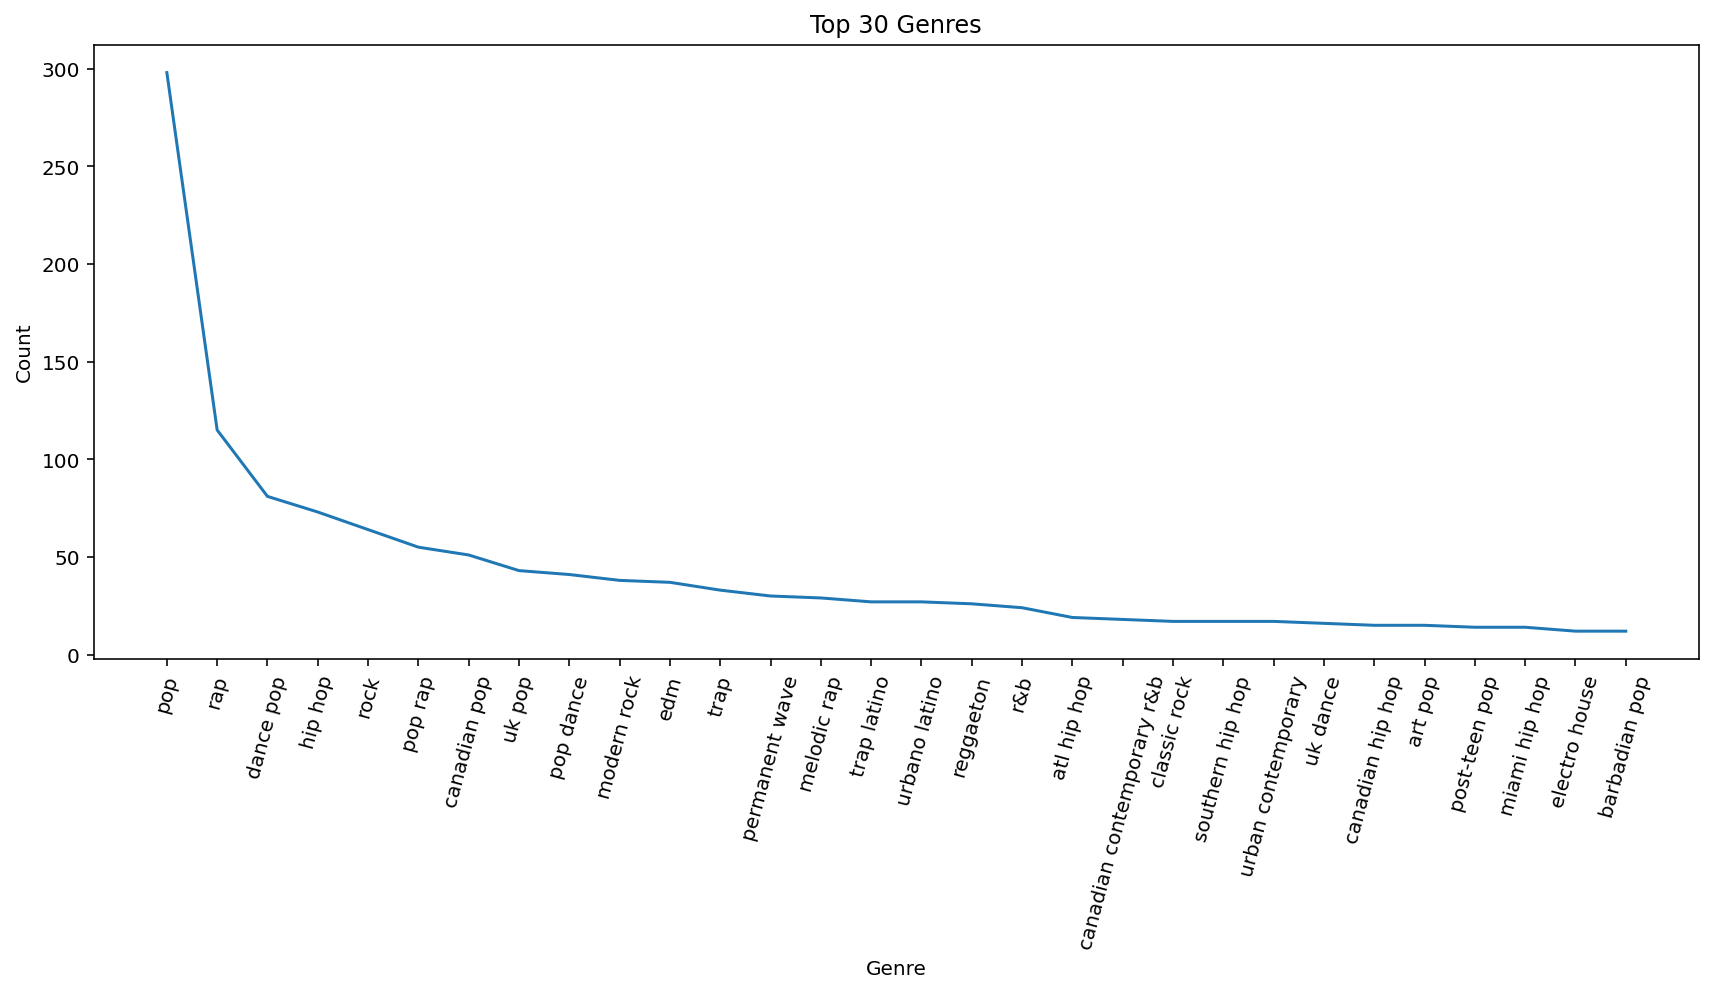

In [6]:
genre_mapping = {}

for index, row in artists_df.iterrows():
    artist_id = row['id']
    genres = row['genres']
    genre_mapping[artist_id] = genres

def map_genres_to_songs(row):
    song_artists = row['artists']
    song_genres = set() 

    for artist in song_artists:
        artist_id = artist['id']
        if artist_id in genre_mapping:
            song_genres.update(genre_mapping[artist_id])  

    return list(song_genres) 

df['genre'] = df.apply(map_genres_to_songs, axis=1)

all_genres = [genre for sublist in df['genre'] for genre in sublist]

genre_counts = Counter(all_genres)

genre_counts_df = pd.DataFrame(list(genre_counts.items()), columns=['Genre', 'Count'])
genre_counts_df = genre_counts_df.sort_values(by='Count', ascending=False).reset_index()
plt.plot(genre_counts_df.head(30).Genre, genre_counts_df.head(30).Count)
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Top 30 Genres')
plt.xticks(rotation=75)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.savefig('Top30SpotifyGenres.png')

In [7]:
for index, genre in genre_counts_df.head(30).tail(10).iterrows():
    genre_matches = df[df['genre'].apply(lambda x: genre['Genre'] in x)]
    print(genre['Genre'].upper())
    for index, song in genre_matches.iterrows():
        print(song['name'], end = ', by: ')
        for artist in song['artists']:
            print(artist['name'], end = ', ')
        print()
    print()

CLASSIC ROCK
Every Breath You Take, by: The Police, 
Dreams - 2004 Remaster, by: Fleetwood Mac, 
Another One Bites The Dust - Remastered 2011, by: Queen, 
Under Pressure - Remastered 2011, by: Queen, David Bowie, 
We Will Rock You - Remastered 2011, by: Queen, 
Sultans of Swing, by: Dire Straits, 
Have You Ever Seen The Rain, by: Creedence Clearwater Revival, 
Bohemian Rhapsody - 2011 Remaster, by: Queen, 
FourFiveSeconds, by: Rihanna, Kanye West, Paul McCartney, 
Don't Stop Me Now - Remastered 2011, by: Queen, 
Fortunate Son, by: Creedence Clearwater Revival, 
Africa, by: TOTO, 
Here Comes The Sun - Remastered 2009, by: The Beatles, 
Don't Stop Believin', by: Journey, 
Hotel California - 2013 Remaster, by: Eagles, 
Paint It, Black, by: The Rolling Stones, 
Sweet Home Alabama, by: Lynyrd Skynyrd, 

SOUTHERN HIP HOP
Payphone, by: Maroon 5, Wiz Khalifa, 
Panda, by: Desiigner, 
Psycho (feat. Ty Dolla $ign), by: Post Malone, Ty Dolla $ign, 
Work from Home (feat. Ty Dolla $ign), by: Fifth H

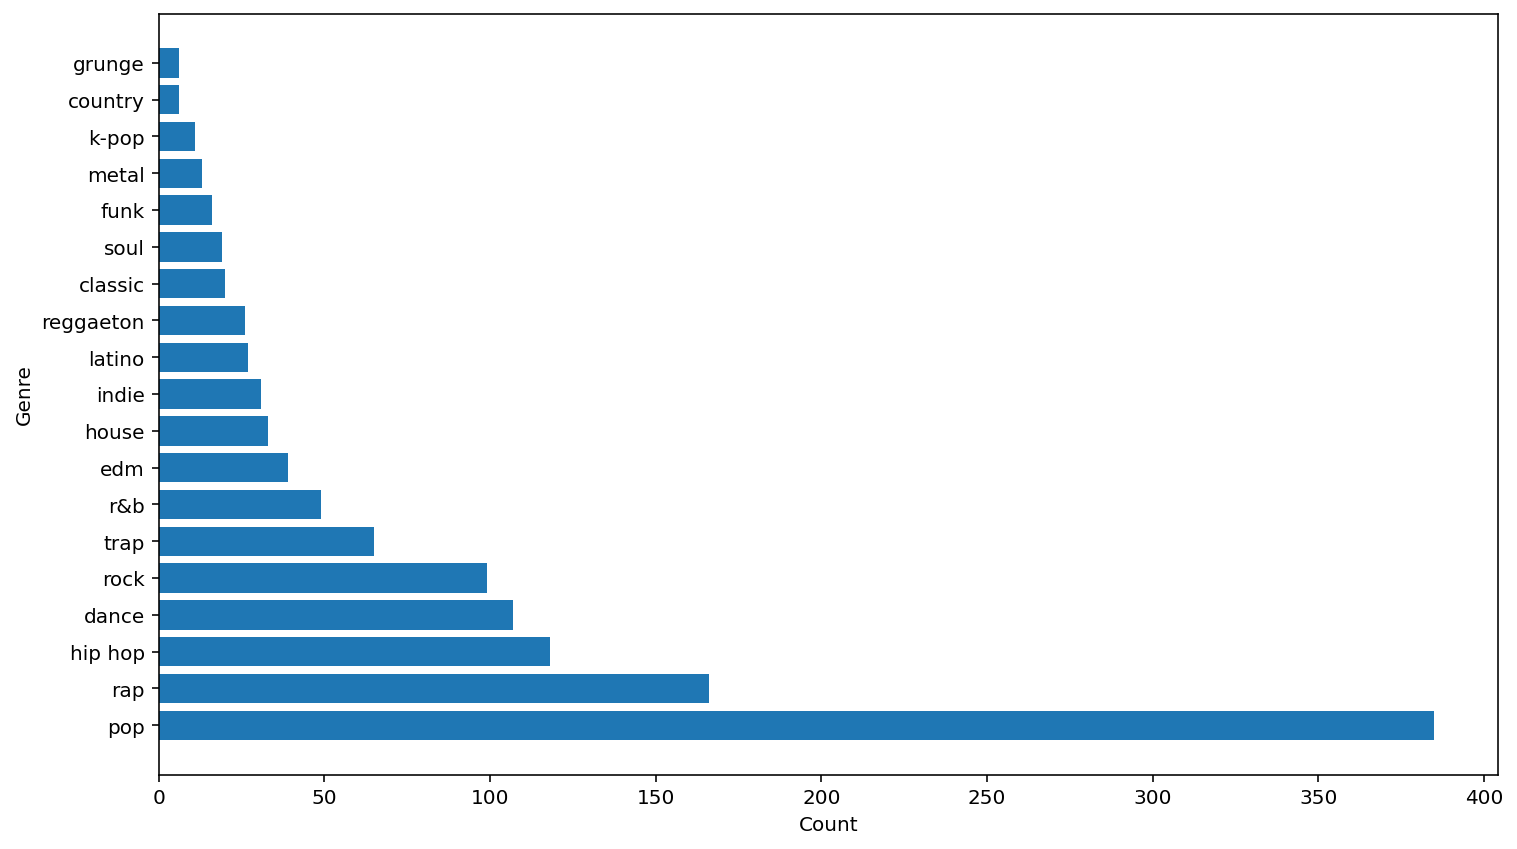

In [8]:
search_strings = ['pop', 'rap', 'hip hop', 'rock', 'trap', 'edm', 'dance', 'house', 'r&b', 'reggaeton', 'indie', 'soul', 'latino', 'k-pop', 'funk', 'metal', 'soul', 'country', 'grunge', 'classic']
substring_counts = {substring: df['genre'].apply(lambda arr: any(substring in element for element in arr)).sum() for substring in search_strings}
sorted_counts = sorted(substring_counts.items(), key=lambda x: x[1], reverse=True)
genres, counts = zip(*sorted_counts)
plt.barh(genres, counts)
plt.xlabel('Count')
plt.ylabel('Genre')
plt.savefig('TopMainGenres.png')
plt.show()

In [9]:
sorted_counts

[('pop', 385),
 ('rap', 166),
 ('hip hop', 118),
 ('dance', 107),
 ('rock', 99),
 ('trap', 65),
 ('r&b', 49),
 ('edm', 39),
 ('house', 33),
 ('indie', 31),
 ('latino', 27),
 ('reggaeton', 26),
 ('classic', 20),
 ('soul', 19),
 ('funk', 16),
 ('metal', 13),
 ('k-pop', 11),
 ('country', 6),
 ('grunge', 6)]

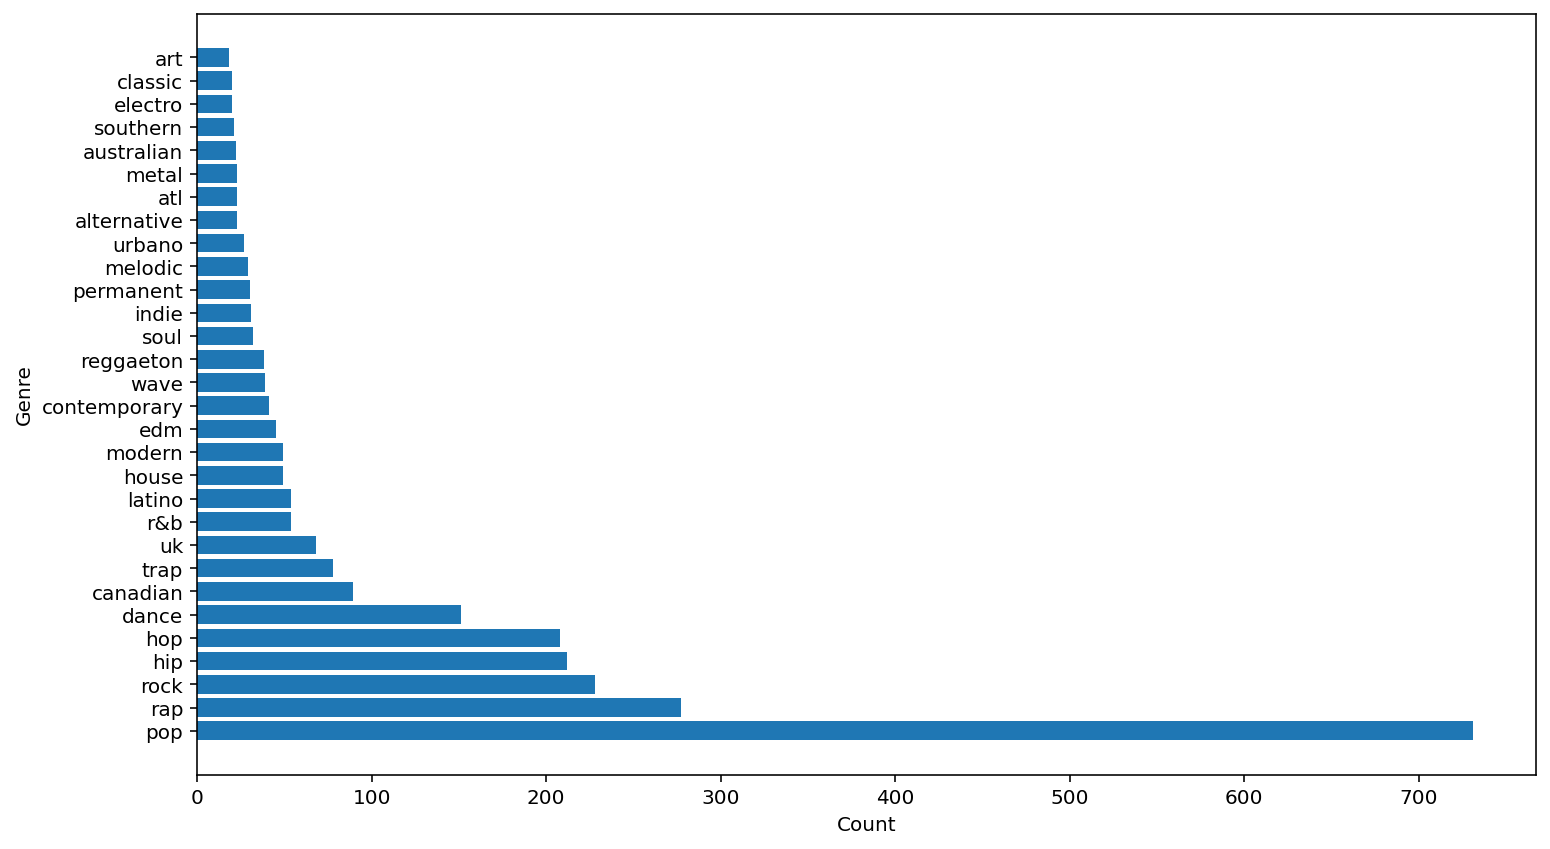

In [10]:
word_counts = Counter()

for gen in df['genre']:
    for genre in gen:
        genres = genre.split()
        word_counts.update(genres)

most_common_words = word_counts.most_common(30)

genres, count = zip(*most_common_words)
plt.barh(genres, count)
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

Which artists are the most present? —how popular are they now? 



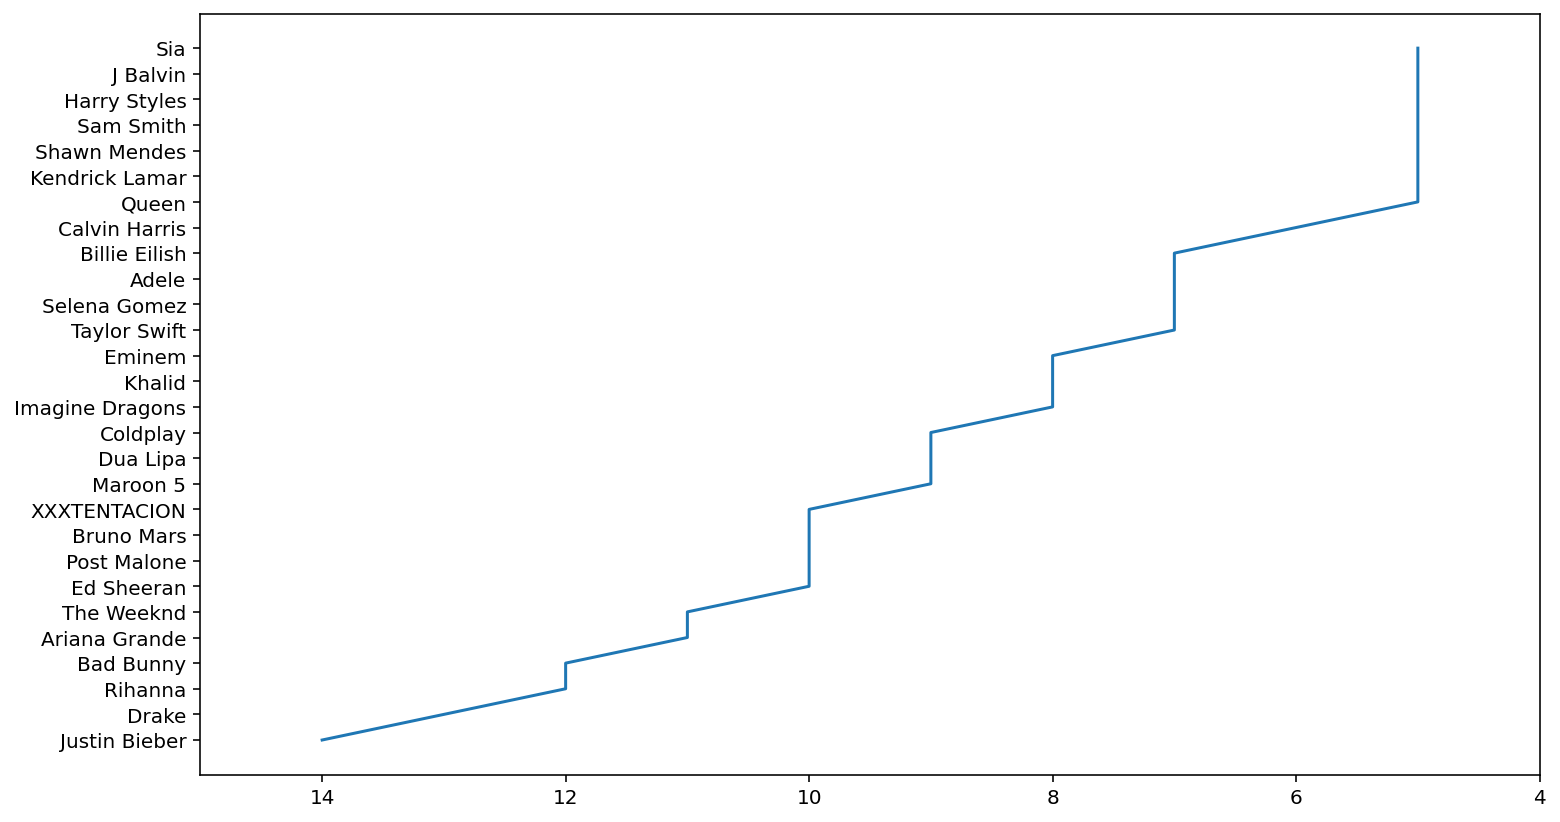

<Figure size 720x504 with 0 Axes>

In [11]:
df_exploded = df.explode('artists')
artist_info = df_exploded['artists'].apply(lambda x: {'artist_id': x['id'], 'artist_name': x['name']}).value_counts()

artist_occurrences = pd.DataFrame(artist_info).reset_index()
artist_occurrences.columns = ['artist_info', 'occurrences']

artist_occurrences[['artist_id', 'artist_name']] = pd.DataFrame(artist_occurrences['artist_info'].tolist())
artist_occurrences = artist_occurrences.drop('artist_info', axis=1)

artist_occurrences_more_than_5 = artist_occurrences[artist_occurrences['occurrences'] > 4]

plt.plot(artist_occurrences_more_than_5.occurrences, artist_occurrences_more_than_5.artist_name)
plt.xlim(max(artist_occurrences_more_than_5.occurrences) + 1, min(artist_occurrences_more_than_5.occurrences) - 1)
plt.figure().set_figwidth(10)
plt.savefig('TopArtists.png')
plt.show()

In [12]:
print(artist_occurrences_more_than_5)

    occurrences               artist_id      artist_name
0            14  1uNFoZAHBGtllmzznpCI3s    Justin Bieber
1            13  3TVXtAsR1Inumwj472S9r4            Drake
2            12  5pKCCKE2ajJHZ9KAiaK11H          Rihanna
3            12  4q3ewBCX7sLwd24euuV69X        Bad Bunny
4            11  66CXWjxzNUsdJxJ2JdwvnR    Ariana Grande
5            11  1Xyo4u8uXC1ZmMpatF05PJ       The Weeknd
6            10  6eUKZXaKkcviH0Ku9w2n3V       Ed Sheeran
7            10  246dkjvS1zLTtiykXe5h60      Post Malone
8            10  0du5cEVh5yTK9QJze8zA0C       Bruno Mars
9            10  15UsOTVnJzReFVN1VCnxy4     XXXTENTACION
10            9  04gDigrS5kc9YWfZHwBETP         Maroon 5
11            9  6M2wZ9GZgrQXHCFfjv46we         Dua Lipa
12            9  4gzpq5DPGxSnKTe4SA8HAU         Coldplay
13            8  53XhwfbYqKCa1cC15pYq2q  Imagine Dragons
14            8  6LuN9FCkKOj5PcnpouEgny           Khalid
15            8  7dGJo4pcD2V6oG8kP0tJRR           Eminem
16            7  06HL4z0CvFAxyc

How many songs have multiple artist on the song?<span style='color:#e91e63'> How popular are they compared to the one's with only one? </span>


Songs with multiple artists: 170
Songs with one artist: 339


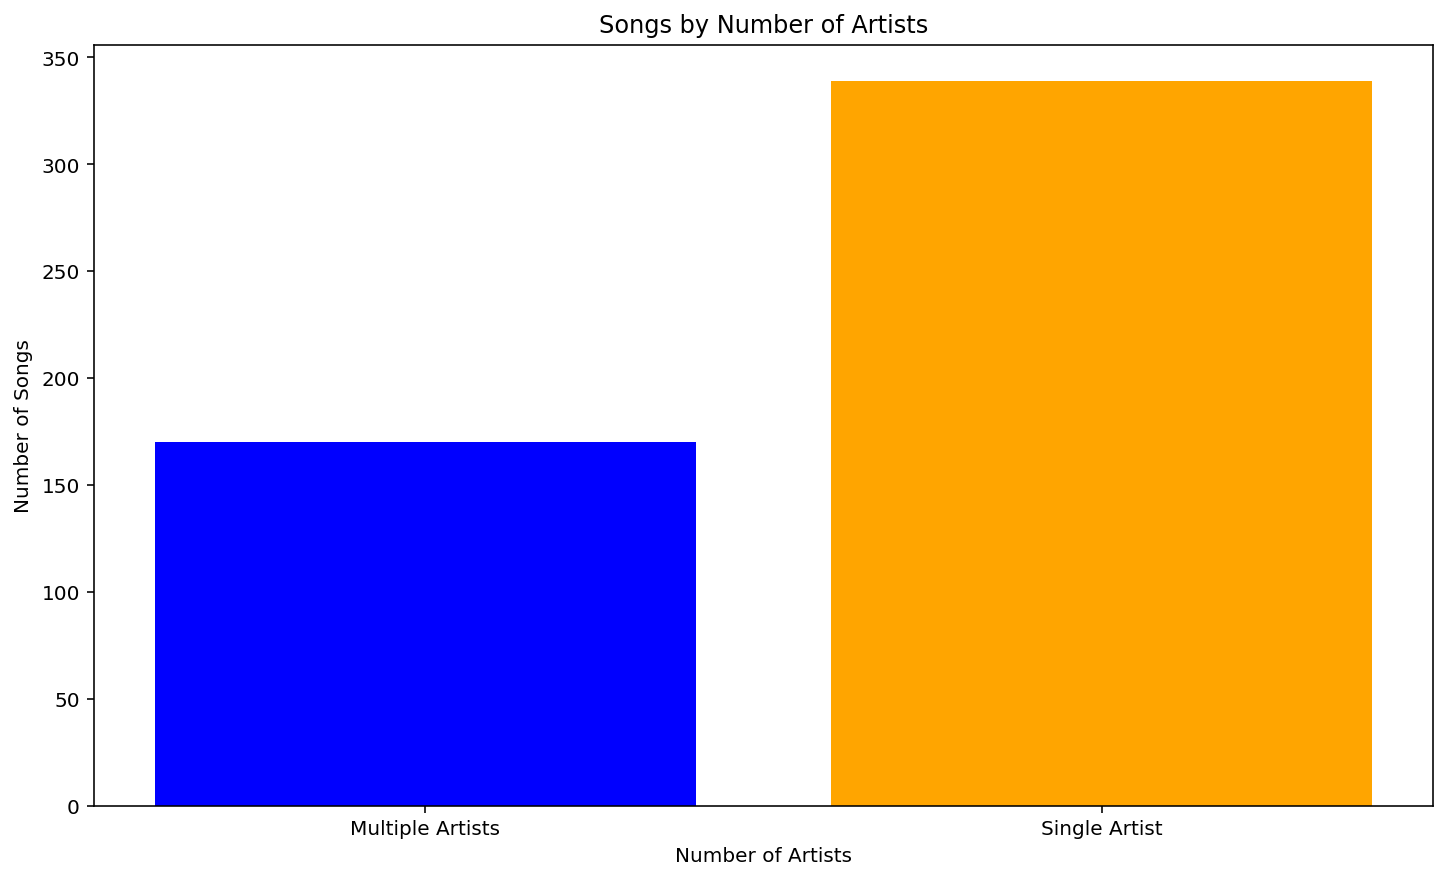

In [13]:
songs_with_multiple_artists = df[df['artists'].apply(lambda x: len(x) > 1)]
songs_with_multiple_artists = pd.DataFrame(songs_with_multiple_artists).reset_index()
print("Songs with multiple artists:", len(songs_with_multiple_artists))

songs_with_one_artist = df[df['artists'].apply(lambda x: len(x) == 1)]
songs_with_one_artist = pd.DataFrame(songs_with_one_artist).reset_index()
print("Songs with one artist:", len(songs_with_one_artist))

plt.bar(['Multiple Artists', 'Single Artist'], [len(songs_with_multiple_artists), len(songs_with_one_artist)], color=['blue', 'orange'])
plt.xlabel('Number of Artists')
plt.ylabel('Number of Songs')
plt.title('Songs by Number of Artists')
plt.savefig('SongsByNumberOfArtists.png')
plt.show()

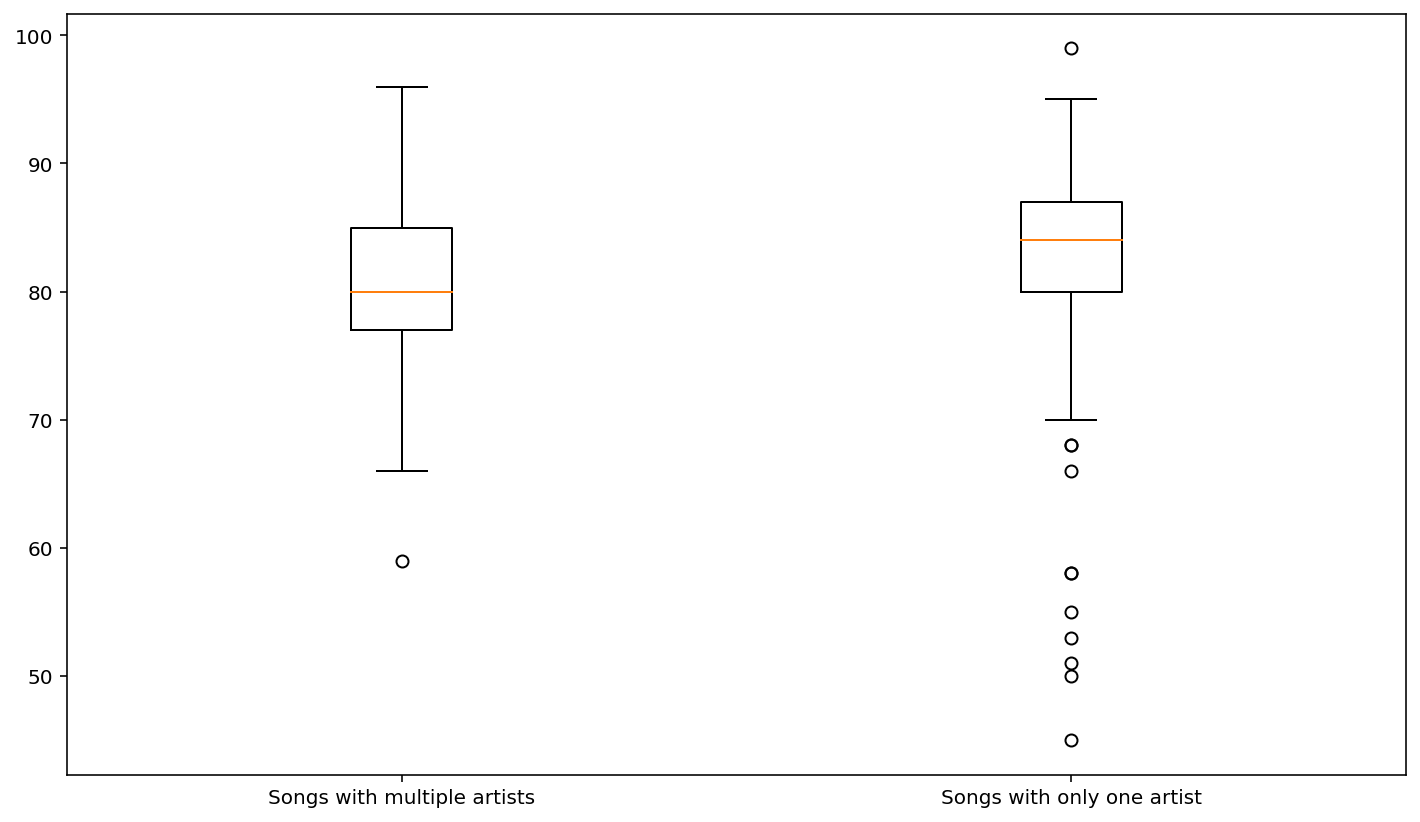

count    170.000000
mean      80.176471
std        6.044561
min       59.000000
25%       77.000000
50%       80.000000
75%       85.000000
max       96.000000
Name: popularity, dtype: float64
count    339.000000
mean      82.587021
std        6.778879
min       45.000000
25%       80.000000
50%       84.000000
75%       87.000000
max       99.000000
Name: popularity, dtype: float64


In [14]:
plt.boxplot([songs_with_multiple_artists['popularity'], songs_with_one_artist['popularity']], labels=['Songs with multiple artists', 'Songs with only one artist'])
plt.savefig('BoxPlotsMultipleVsOne.png')
plt.show()
print(songs_with_multiple_artists['popularity'].describe()) 
print(songs_with_one_artist['popularity'].describe())



DURATION_MS



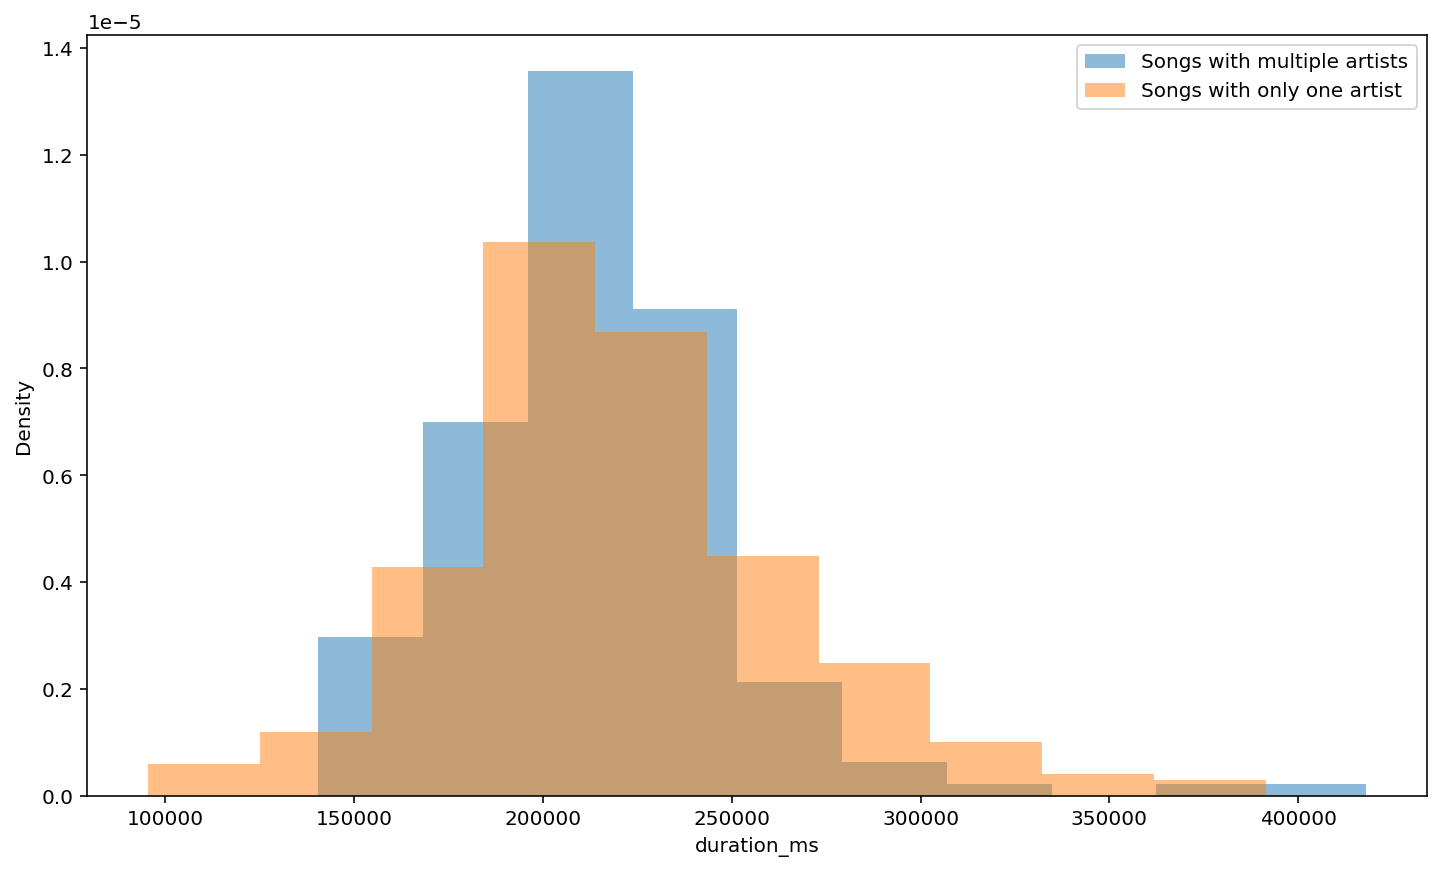

H0: There is no difference in the distribution of duration_ms between songs with multiple artists and songs with only one artist.
H1: There is a significant difference in the distribution of duration_ms between songs with multiple artists and songs with only one artist.

Mann-Whitney U test statistic: 26847.5
P-value: 0.20880566653315646

Fail to reject the null hypothesis. There is no difference in the distribution of duration_ms between songs with multiple artists and songs with only one artist.


POPULARITY



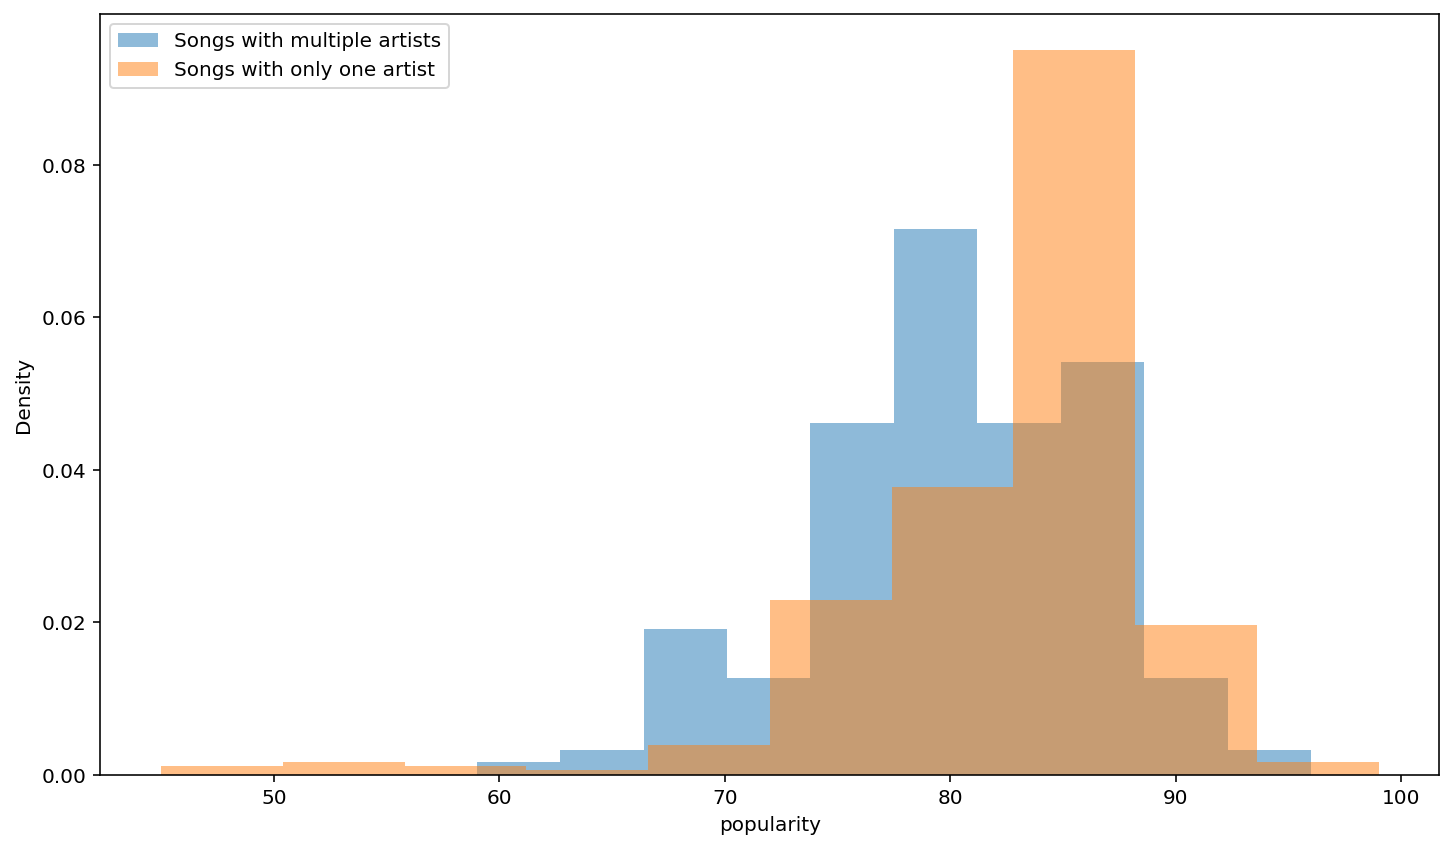

H0: There is no difference in the distribution of popularity between songs with multiple artists and songs with only one artist.
H1: There is a significant difference in the distribution of popularity between songs with multiple artists and songs with only one artist.

Mann-Whitney U test statistic: 20490.0
P-value: 9.894683328598988e-08

Reject the null hypothesis. There is a significant difference in the distribution of popularity between songs with multiple artists and songs with only one artist.


DANCEABILITY



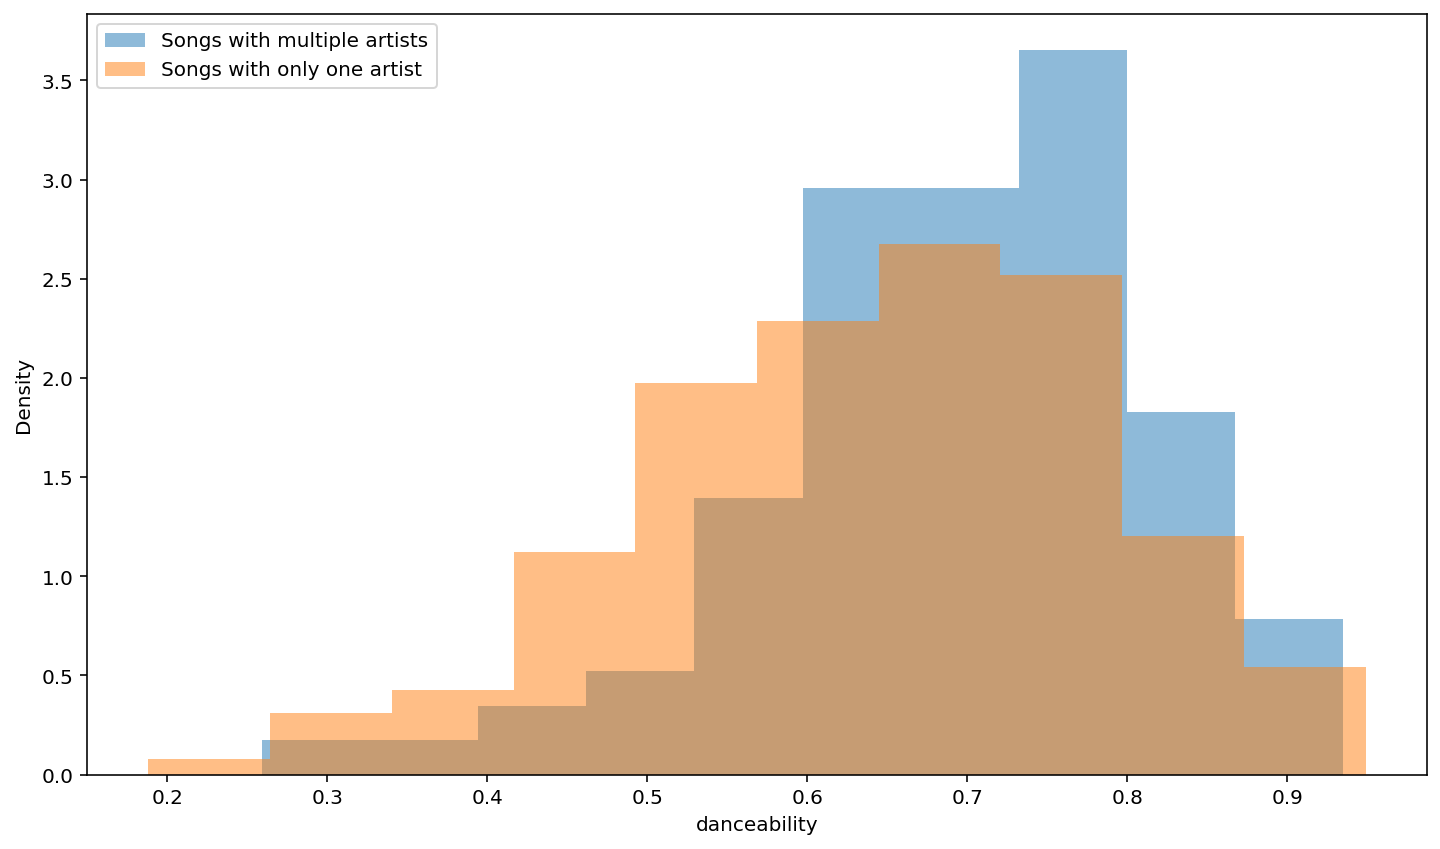

H0: There is no difference in the distribution of danceability between songs with multiple artists and songs with only one artist.
H1: There is a significant difference in the distribution of danceability between songs with multiple artists and songs with only one artist.

Mann-Whitney U test statistic: 35433.0
P-value: 2.3532729066626936e-05

Reject the null hypothesis. There is a significant difference in the distribution of danceability between songs with multiple artists and songs with only one artist.


ENERGY



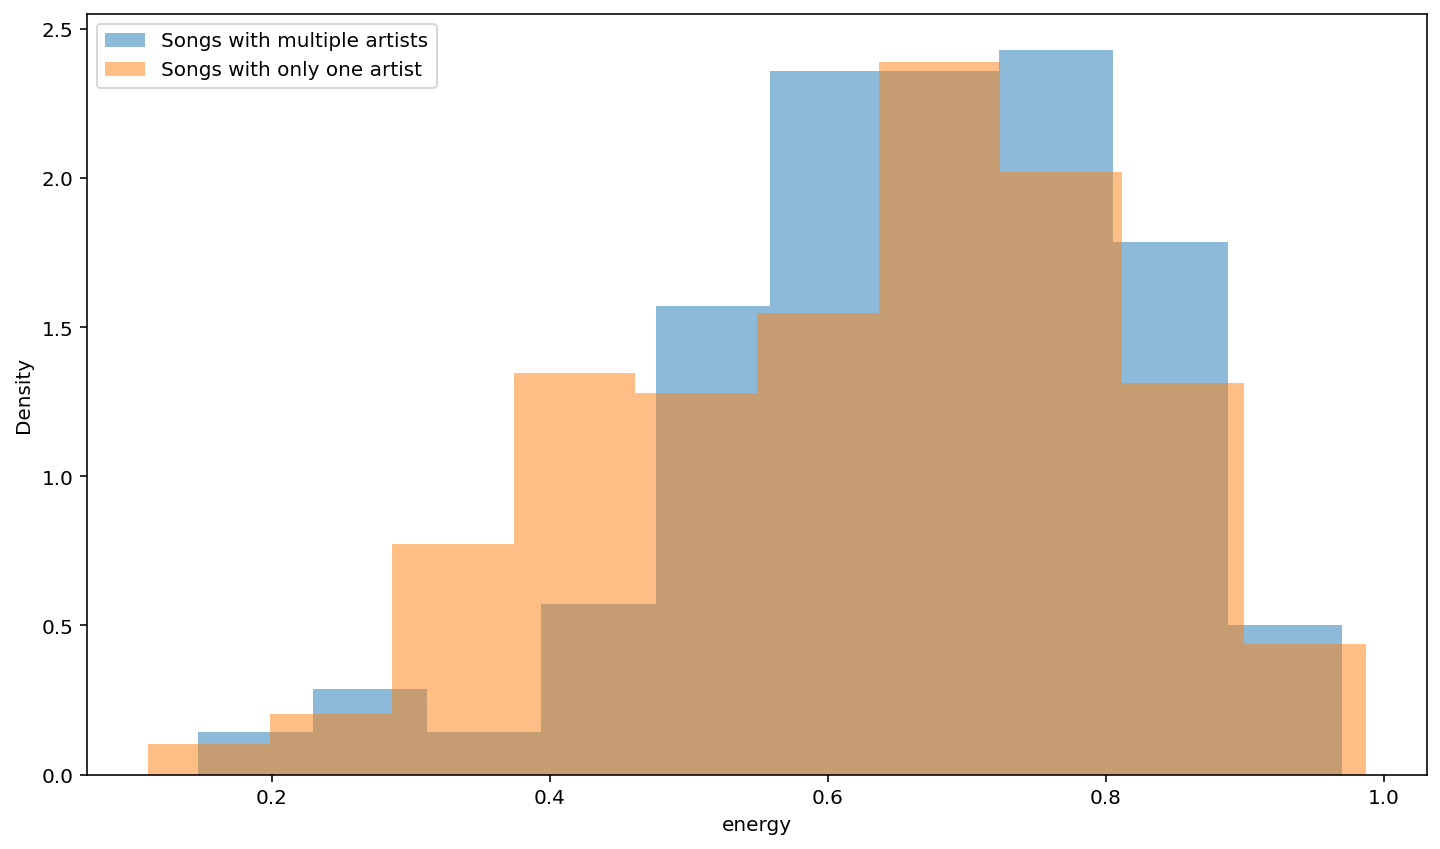

H0: There is no difference in the distribution of energy between songs with multiple artists and songs with only one artist.
H1: There is a significant difference in the distribution of energy between songs with multiple artists and songs with only one artist.

Mann-Whitney U test statistic: 32684.5
P-value: 0.013428669453595147

Reject the null hypothesis. There is a significant difference in the distribution of energy between songs with multiple artists and songs with only one artist.


KEY



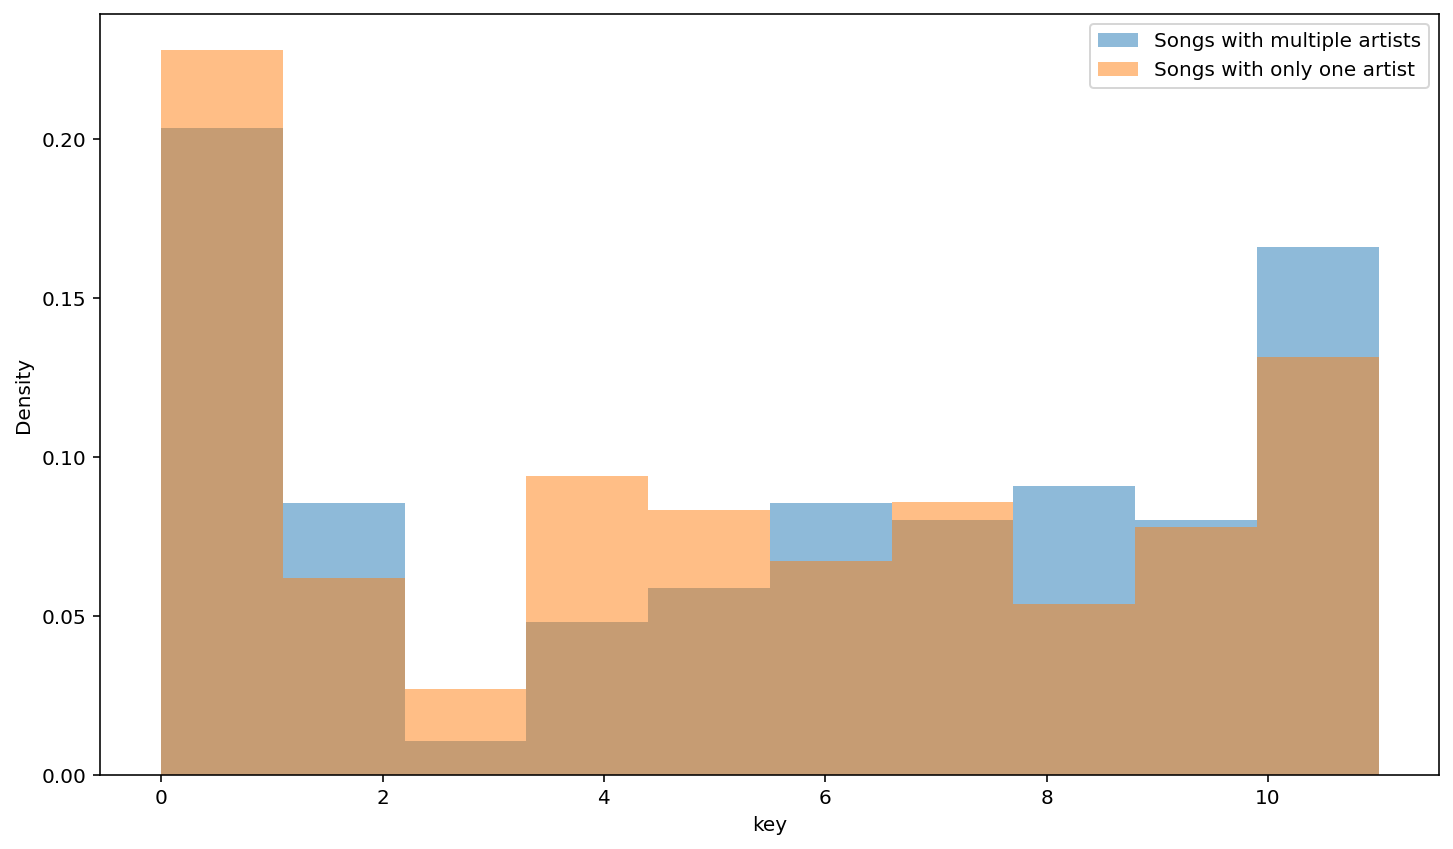

H0: There is no difference in the distribution of key between songs with multiple artists and songs with only one artist.
H1: There is a significant difference in the distribution of key between songs with multiple artists and songs with only one artist.

Mann-Whitney U test statistic: 31078.5
P-value: 0.14641445423972363

Fail to reject the null hypothesis. There is no difference in the distribution of key between songs with multiple artists and songs with only one artist.


LOUDNESS



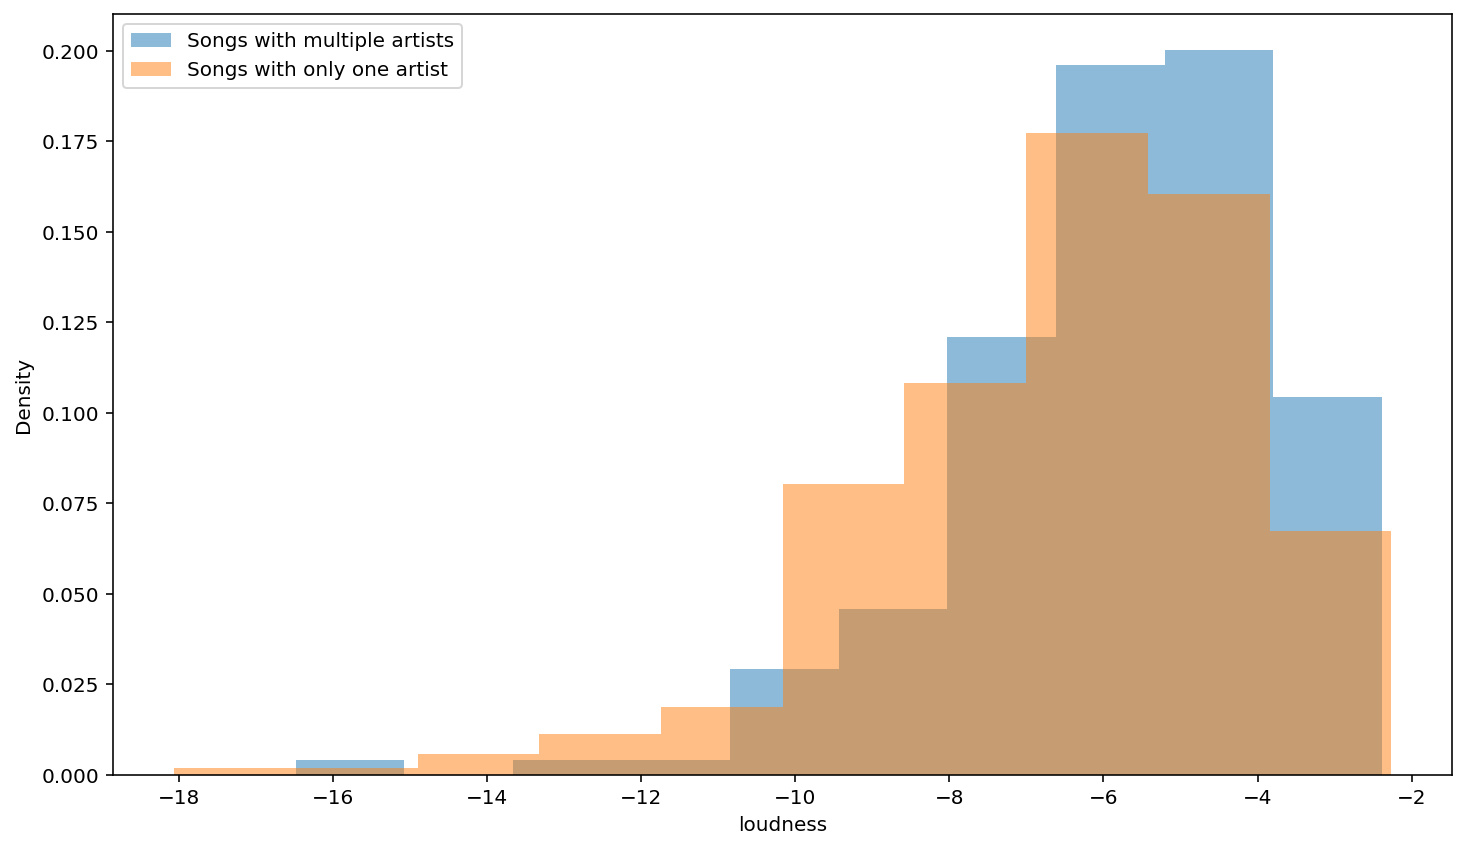

H0: There is no difference in the distribution of loudness between songs with multiple artists and songs with only one artist.
H1: There is a significant difference in the distribution of loudness between songs with multiple artists and songs with only one artist.

Mann-Whitney U test statistic: 33519.5
P-value: 0.002649520935349674

Reject the null hypothesis. There is a significant difference in the distribution of loudness between songs with multiple artists and songs with only one artist.


MODE



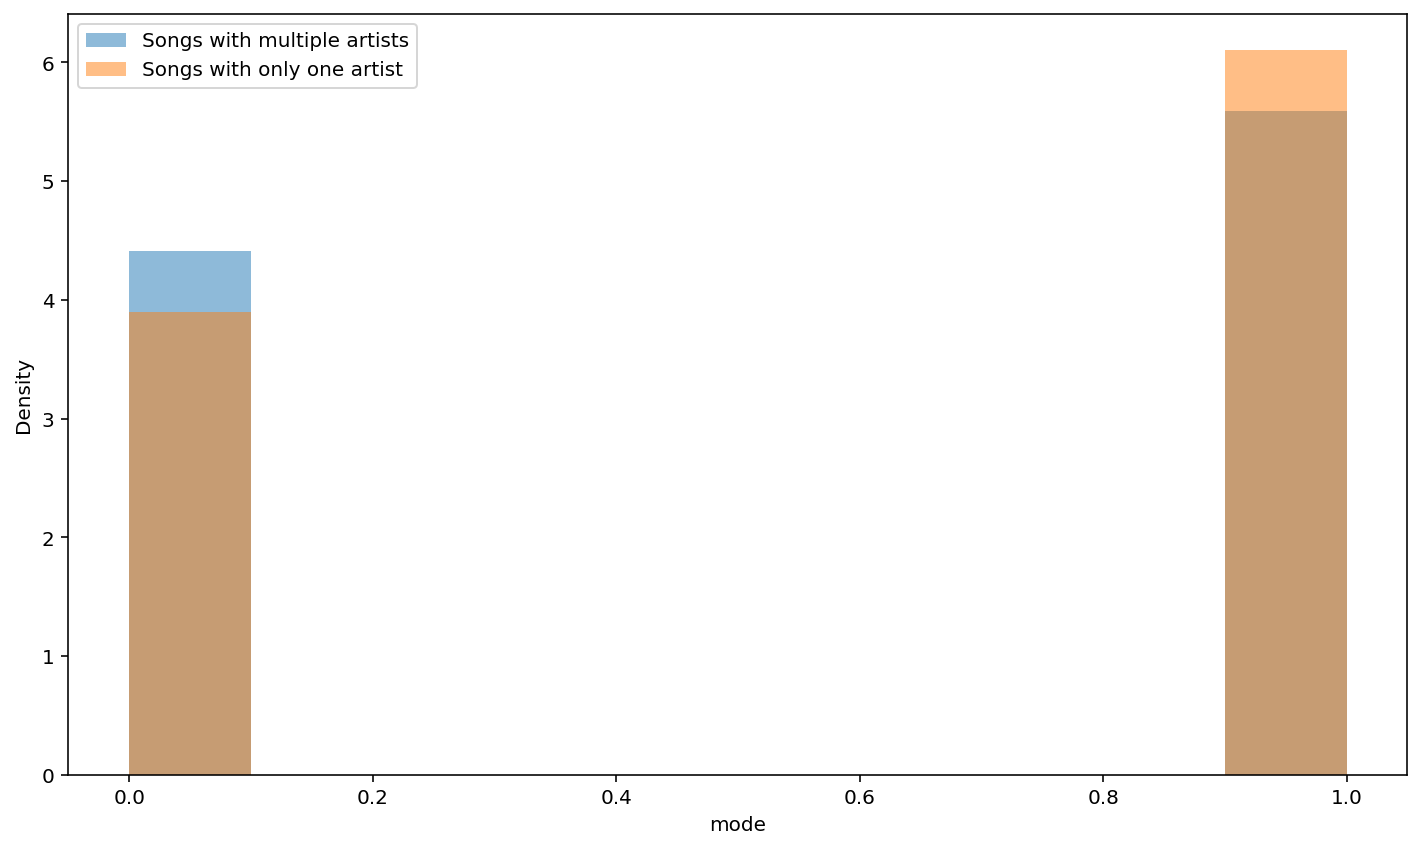

H0: There is no difference in the distribution of mode between songs with multiple artists and songs with only one artist.
H1: There is a significant difference in the distribution of mode between songs with multiple artists and songs with only one artist.

Mann-Whitney U test statistic: 27322.5
P-value: 0.2624943133175738

Fail to reject the null hypothesis. There is no difference in the distribution of mode between songs with multiple artists and songs with only one artist.


SPEECHINESS



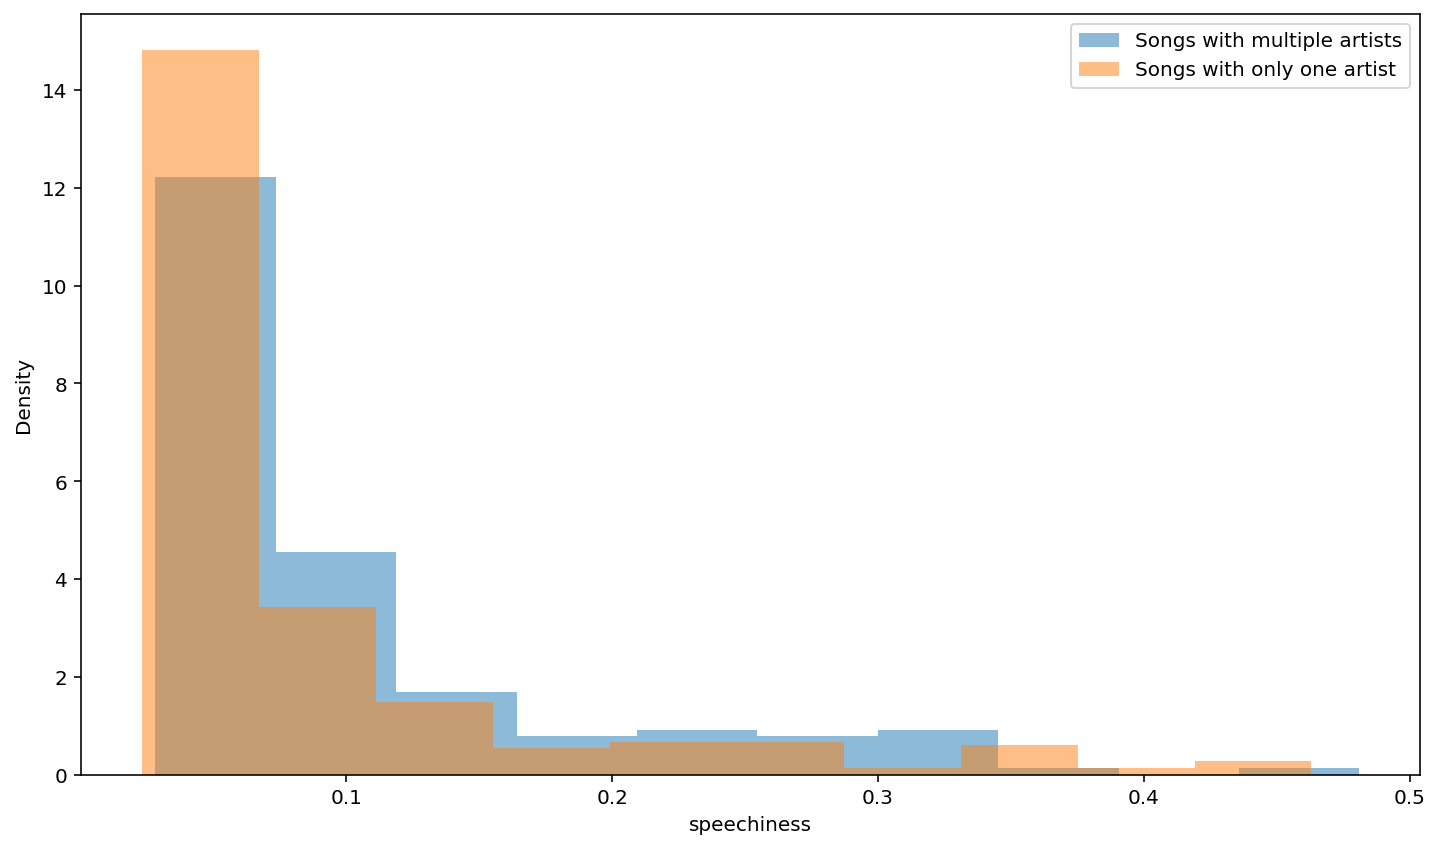

H0: There is no difference in the distribution of speechiness between songs with multiple artists and songs with only one artist.
H1: There is a significant difference in the distribution of speechiness between songs with multiple artists and songs with only one artist.

Mann-Whitney U test statistic: 35040.0
P-value: 6.970450080692318e-05

Reject the null hypothesis. There is a significant difference in the distribution of speechiness between songs with multiple artists and songs with only one artist.


ACOUSTICNESS



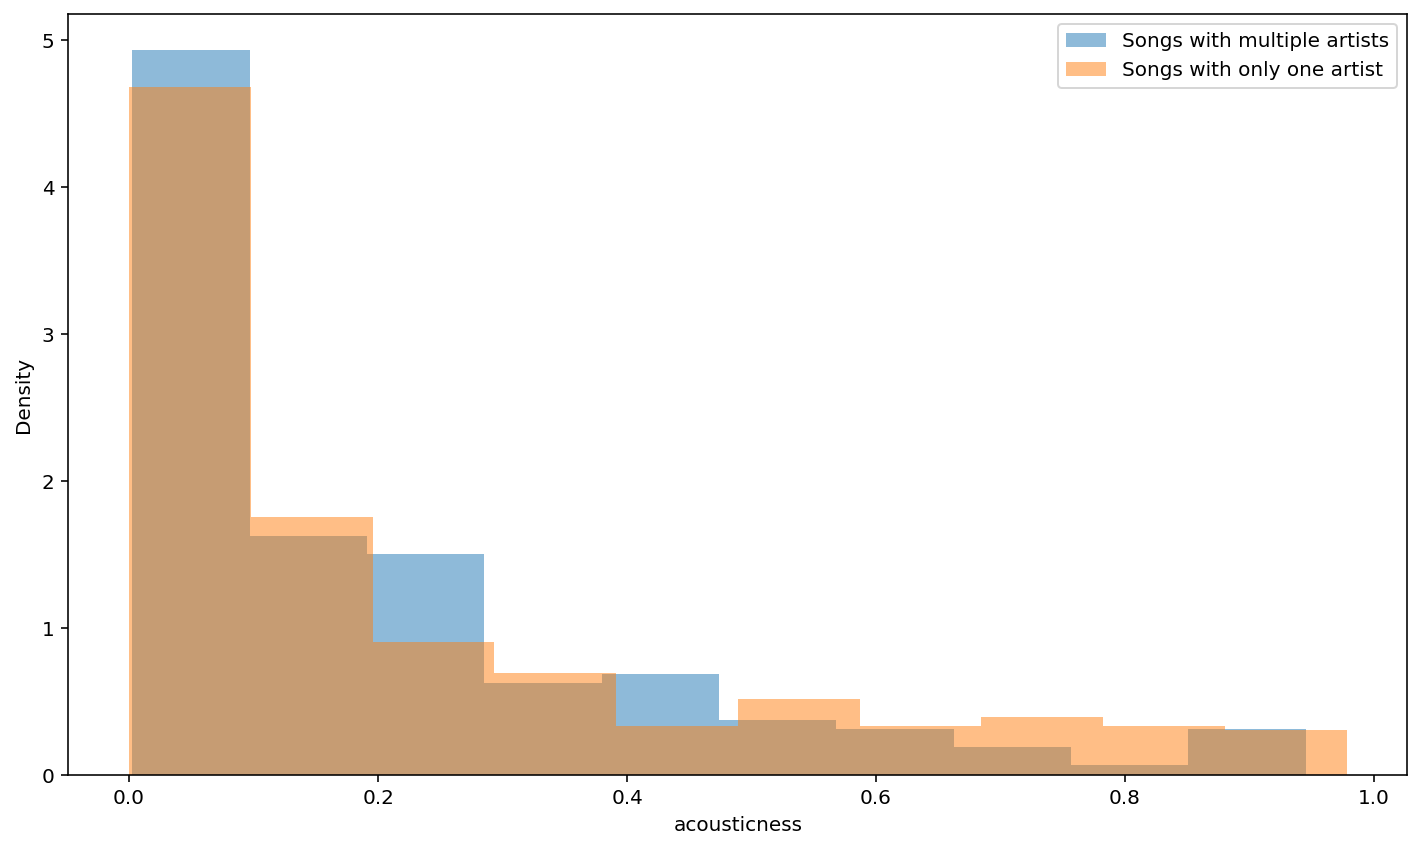

H0: There is no difference in the distribution of acousticness between songs with multiple artists and songs with only one artist.
H1: There is a significant difference in the distribution of acousticness between songs with multiple artists and songs with only one artist.

Mann-Whitney U test statistic: 29304.0
P-value: 0.7549356270182065

Fail to reject the null hypothesis. There is no difference in the distribution of acousticness between songs with multiple artists and songs with only one artist.


INSTRUMENTALNESS



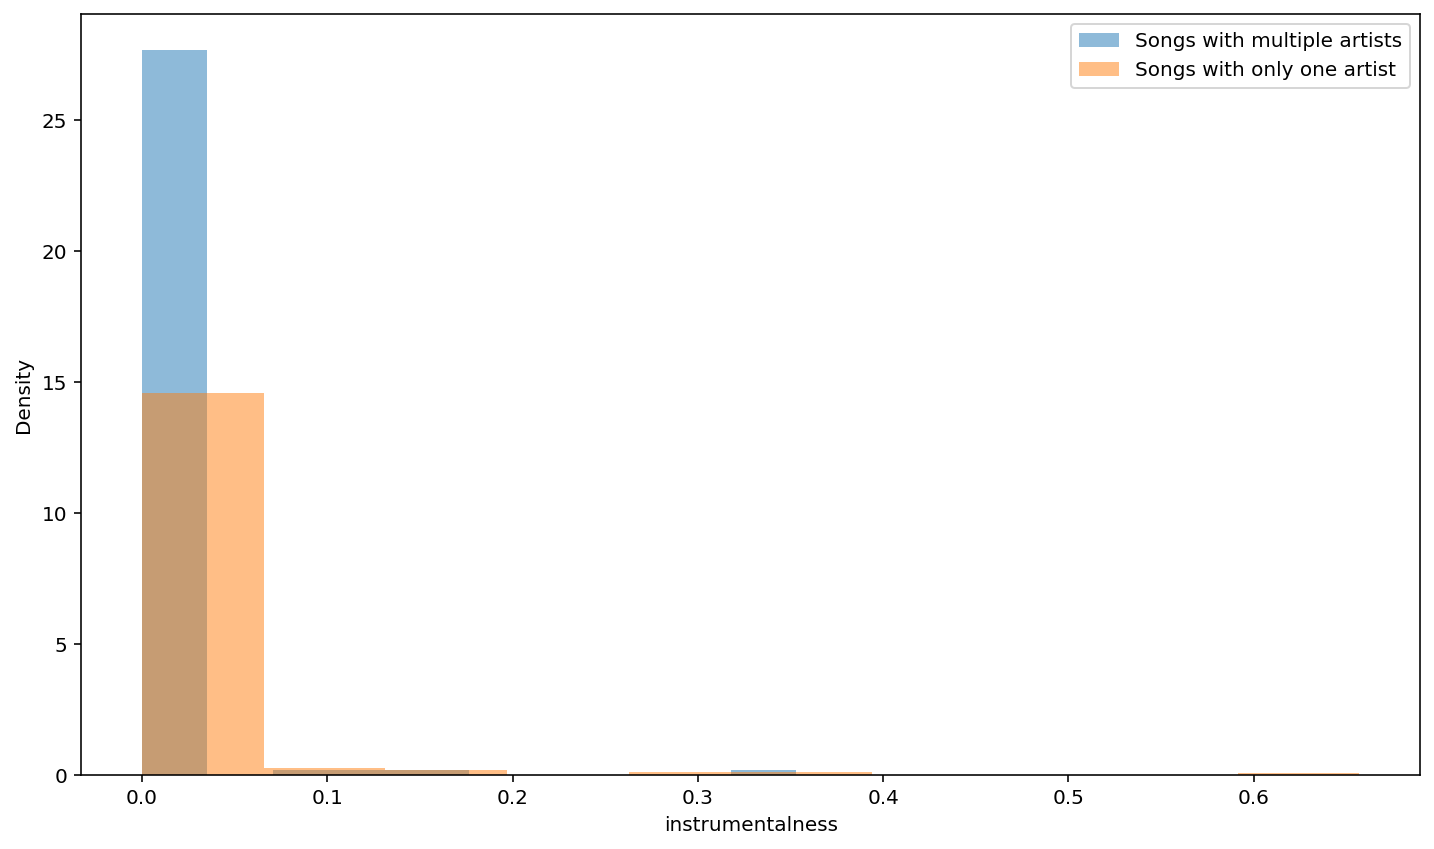

H0: There is no difference in the distribution of instrumentalness between songs with multiple artists and songs with only one artist.
H1: There is a significant difference in the distribution of instrumentalness between songs with multiple artists and songs with only one artist.

Mann-Whitney U test statistic: 24197.5
P-value: 0.0015156216782844403

Reject the null hypothesis. There is a significant difference in the distribution of instrumentalness between songs with multiple artists and songs with only one artist.


LIVENESS



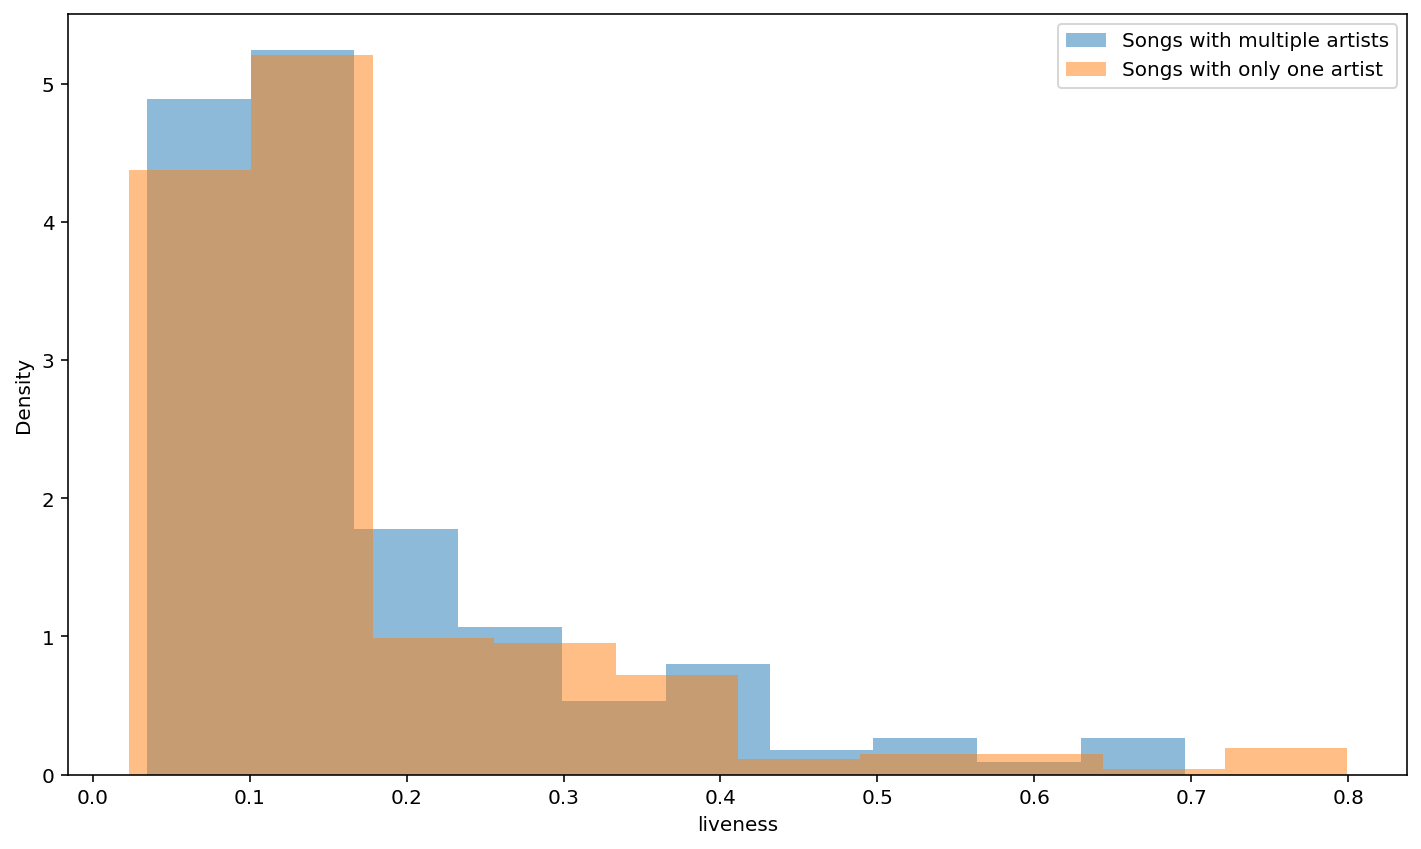

H0: There is no difference in the distribution of liveness between songs with multiple artists and songs with only one artist.
H1: There is a significant difference in the distribution of liveness between songs with multiple artists and songs with only one artist.

Mann-Whitney U test statistic: 30015.0
P-value: 0.4434017565288386

Fail to reject the null hypothesis. There is no difference in the distribution of liveness between songs with multiple artists and songs with only one artist.


VALENCE



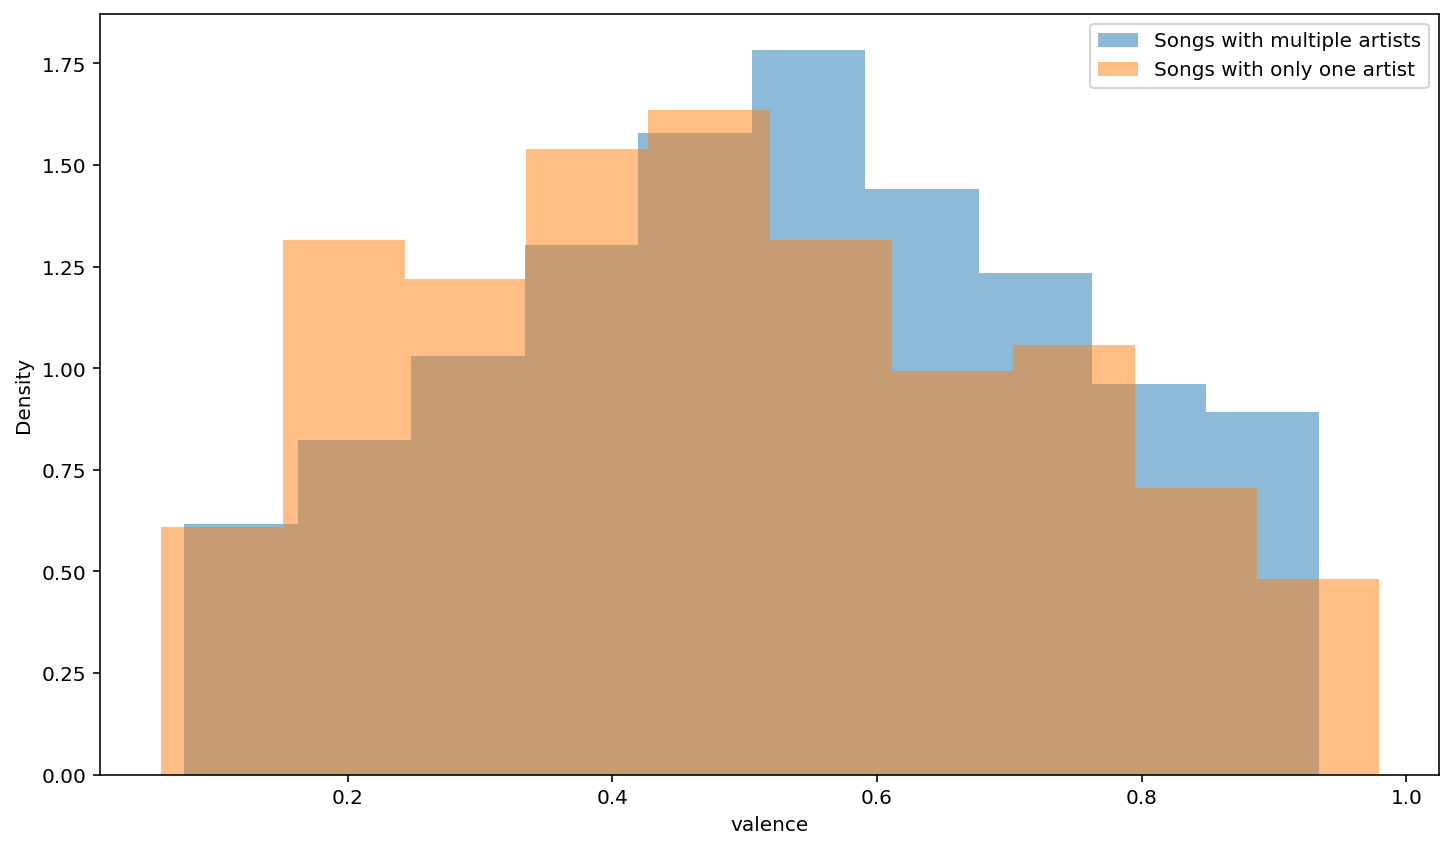

H0: There is no difference in the distribution of valence between songs with multiple artists and songs with only one artist.
H1: There is a significant difference in the distribution of valence between songs with multiple artists and songs with only one artist.

Mann-Whitney U test statistic: 31794.0
P-value: 0.05701658082901534

Fail to reject the null hypothesis. There is no difference in the distribution of valence between songs with multiple artists and songs with only one artist.


TEMPO



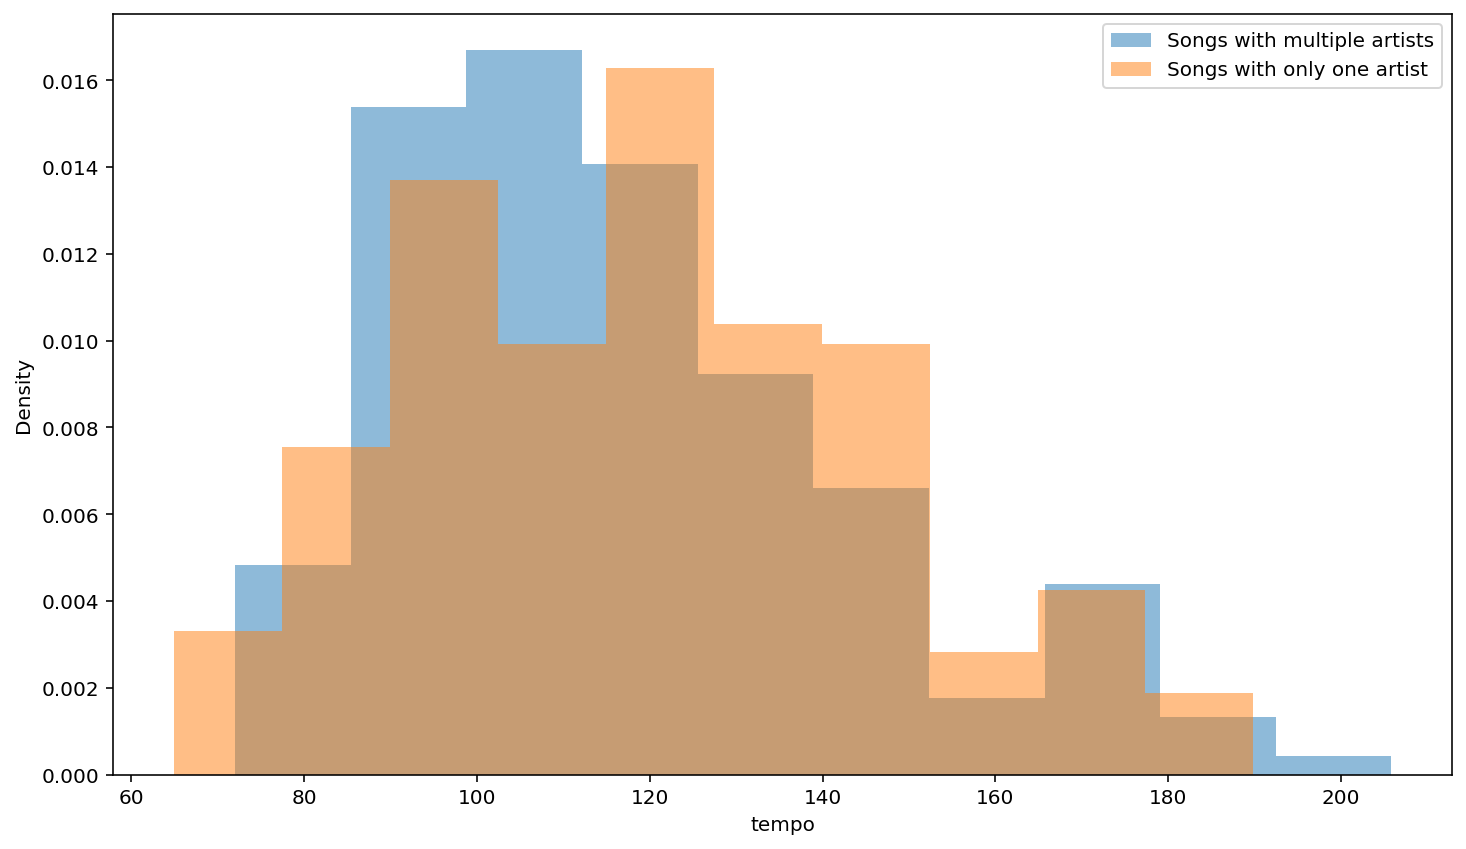

H0: There is no difference in the distribution of tempo between songs with multiple artists and songs with only one artist.
H1: There is a significant difference in the distribution of tempo between songs with multiple artists and songs with only one artist.

Mann-Whitney U test statistic: 26909.0
P-value: 0.22339136593348186

Fail to reject the null hypothesis. There is no difference in the distribution of tempo between songs with multiple artists and songs with only one artist.


TIME_SIGNATURE



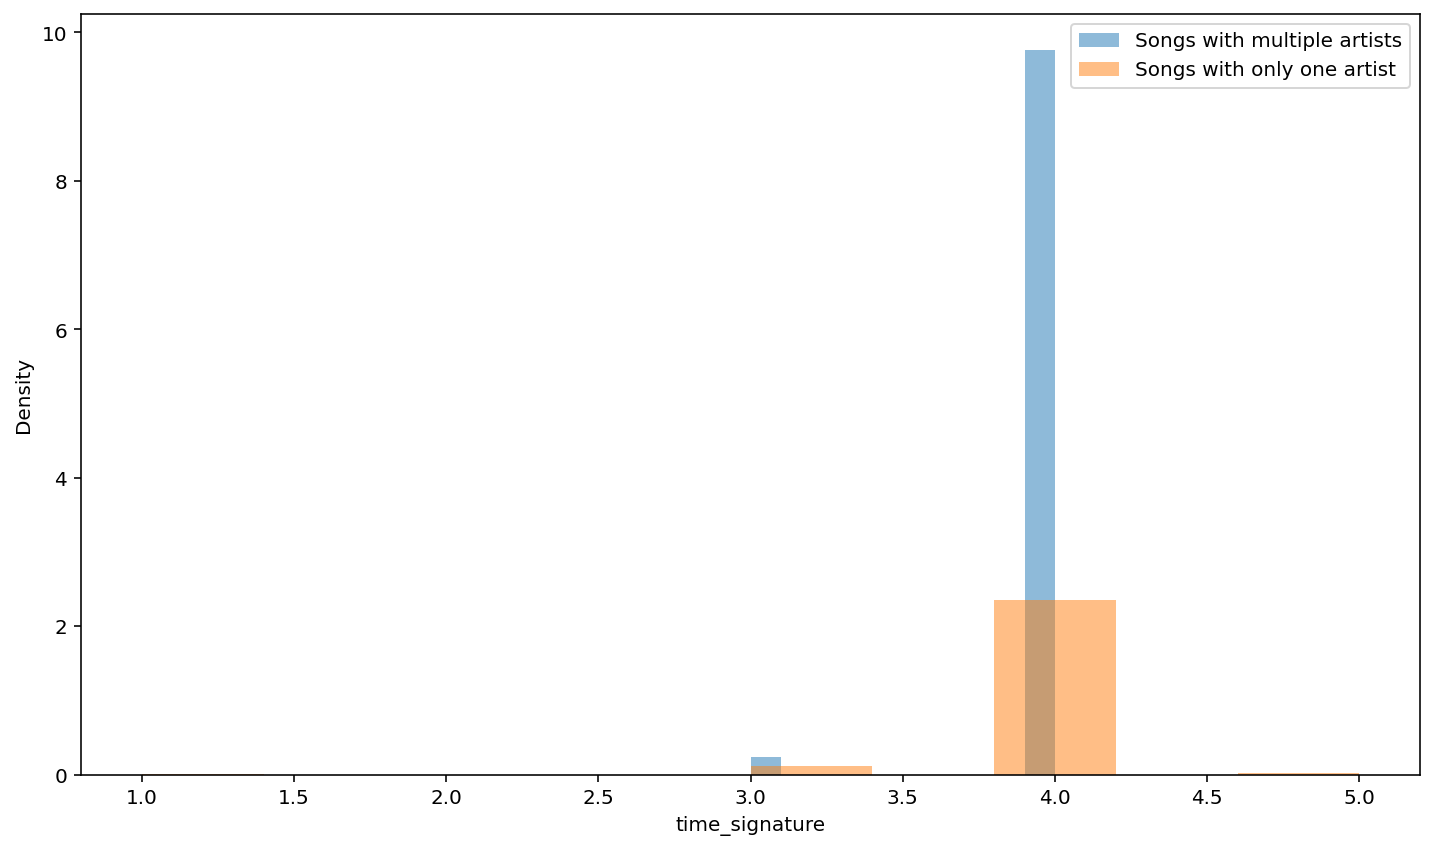

H0: There is no difference in the distribution of time_signature between songs with multiple artists and songs with only one artist.
H1: There is a significant difference in the distribution of time_signature between songs with multiple artists and songs with only one artist.

Mann-Whitney U test statistic: 29335.0
P-value: 0.3659872607664161

Fail to reject the null hypothesis. There is no difference in the distribution of time_signature between songs with multiple artists and songs with only one artist.


In [15]:
import math
from scipy.stats import mannwhitneyu

# Mann-Whitney U test
for numerical in numery:
    print('\n\n' + numerical.upper() + '\n')
    
    plt.hist(songs_with_multiple_artists[numerical], alpha=0.5, label='Songs with multiple artists', density=True)
    plt.hist(songs_with_one_artist[numerical], alpha=0.5, label='Songs with only one artist', density=True)
    
    plt.xlabel(numerical)  # Add x-axis label
    plt.ylabel('Density')  # Add y-axis label
    
    plt.legend()
    plt.savefig('graph' + numerical + '.png')
    plt.show()
    
    # Define null hypothesis (H0) and alternative hypothesis (H1)
    H0 = f"There is no difference in the distribution of {numerical} between songs with multiple artists and songs with only one artist."
    H1 = f"There is a significant difference in the distribution of {numerical} between songs with multiple artists and songs with only one artist."
    print('H0:', H0)
    print('H1:', H1)
    
    statistic, p_value = mannwhitneyu(songs_with_multiple_artists[numerical], songs_with_one_artist[numerical])

    print(f"\nMann-Whitney U test statistic: {statistic}")
    print(f"P-value: {p_value}")

    # Check if the p-value is below your significance level (e.g., 0.05) to reject the null hypothesis
    if p_value < 0.05:
        print(f"\nReject the null hypothesis. {H1}")
    else:
        print(f"\nFail to reject the null hypothesis. {H0}")


Difference in mean popularity for 2005: 3.5
Difference in mean popularity for 2006: 3.0
Difference in mean popularity for 2007: 4.0
Difference in mean popularity for 2008: nan
Difference in mean popularity for 2009: nan
Difference in mean popularity for 2010: -4.333333333333329
Difference in mean popularity for 2011: -4.599999999999994
Difference in mean popularity for 2012: -1.6262626262626299
Difference in mean popularity for 2013: -3.86666666666666
Difference in mean popularity for 2014: -4.321428571428569
Difference in mean popularity for 2015: -3.280000000000001
Difference in mean popularity for 2016: -1.3478260869565304
Difference in mean popularity for 2017: -4.278508771929836
Difference in mean popularity for 2018: 0.31493506493507084
Difference in mean popularity for 2019: -7.003968253968253
Difference in mean popularity for 2020: -2.0283400809716596
Difference in mean popularity for 2021: -2.431818181818187
Difference in mean popularity for 2022: 0.0


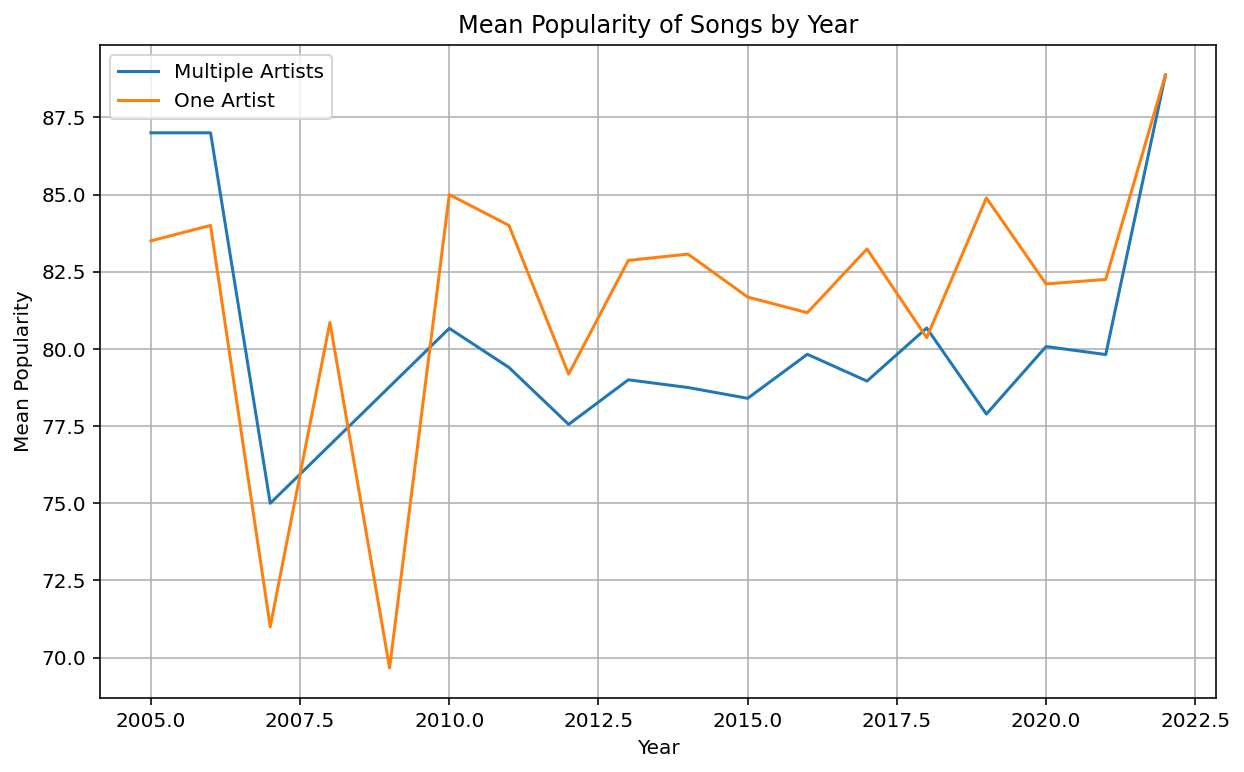

In [16]:
songs_with_multiple_artists['year'] = pd.to_datetime(songs_with_multiple_artists['album_release_date']).dt.year
songs_with_one_artist['year'] = pd.to_datetime(songs_with_one_artist['album_release_date']).dt.year

songs_with_multiple_artists = songs_with_multiple_artists[(songs_with_multiple_artists['year'] >= 2005) & (songs_with_multiple_artists['year'] < 2023)]
songs_with_one_artist = songs_with_one_artist[(songs_with_one_artist['year'] >= 2005) & (songs_with_one_artist['year'] < 2023)]

mean_popularity_multiple = songs_with_multiple_artists.groupby('year')['popularity'].mean()
mean_popularity_one = songs_with_one_artist.groupby('year')['popularity'].mean()

popularity_difference = mean_popularity_multiple - mean_popularity_one

for year, diff in zip(popularity_difference.index, popularity_difference):
    print(f'Difference in mean popularity for {year}: {diff}')

plt.figure(figsize=(10, 6))
plt.plot(mean_popularity_multiple.index, mean_popularity_multiple, label='Multiple Artists')
plt.plot(mean_popularity_one.index, mean_popularity_one, label='One Artist')
plt.xlabel('Year')
plt.ylabel('Mean Popularity')
plt.title('Mean Popularity of Songs by Year')
plt.legend()
plt.grid(True)
plt.savefig('MeanPopularityByYear.png')
plt.show()


How popular are the songs right now? 



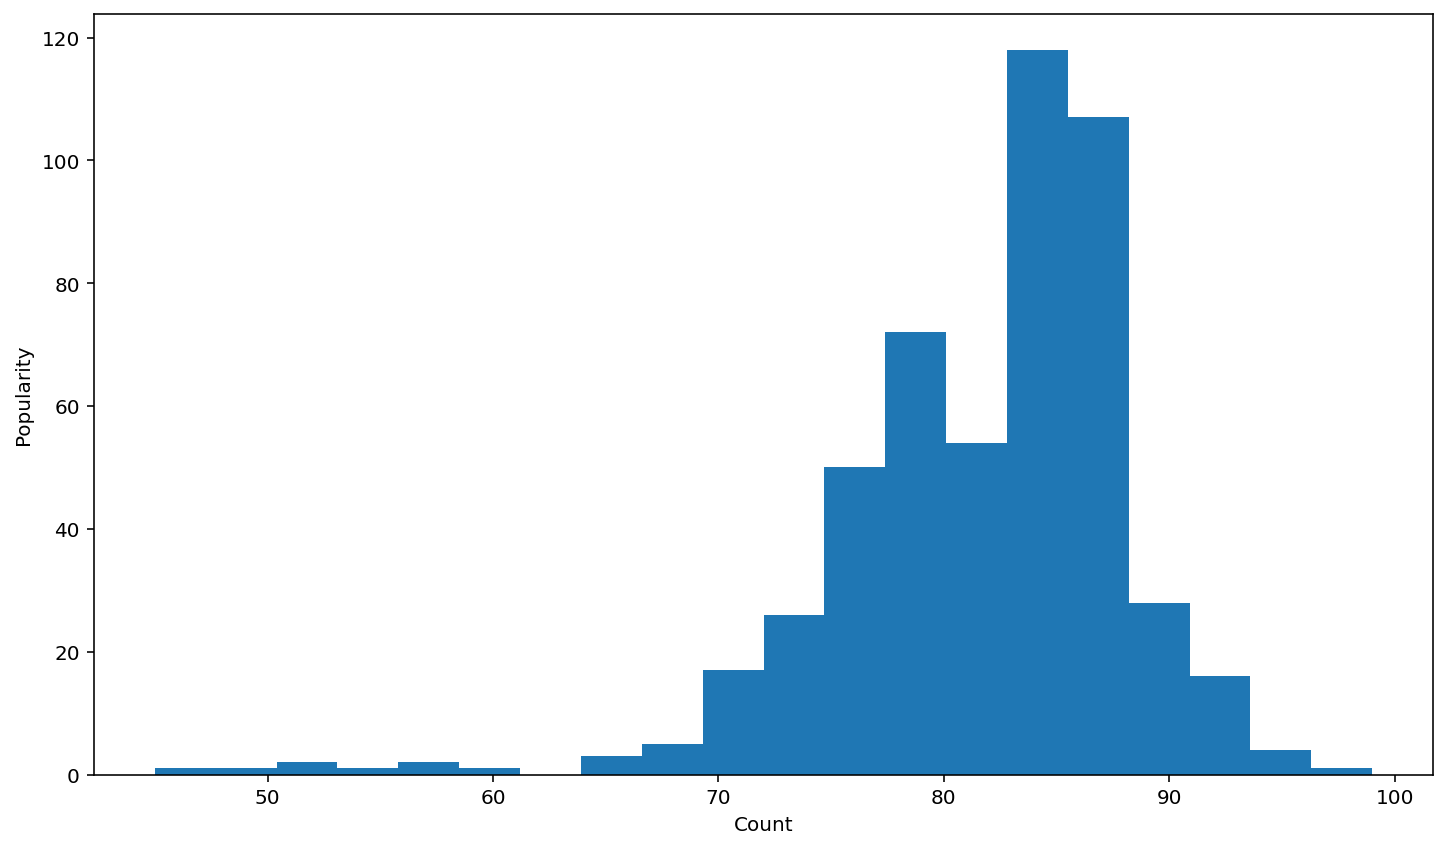

In [17]:
plt.hist(df['popularity'], bins = 20)
plt.xlabel('Count')
plt.ylabel('Popularity')
plt.savefig('PopularityOfSongs.png')
plt.show()

Distribution the songs through time that got onto the list



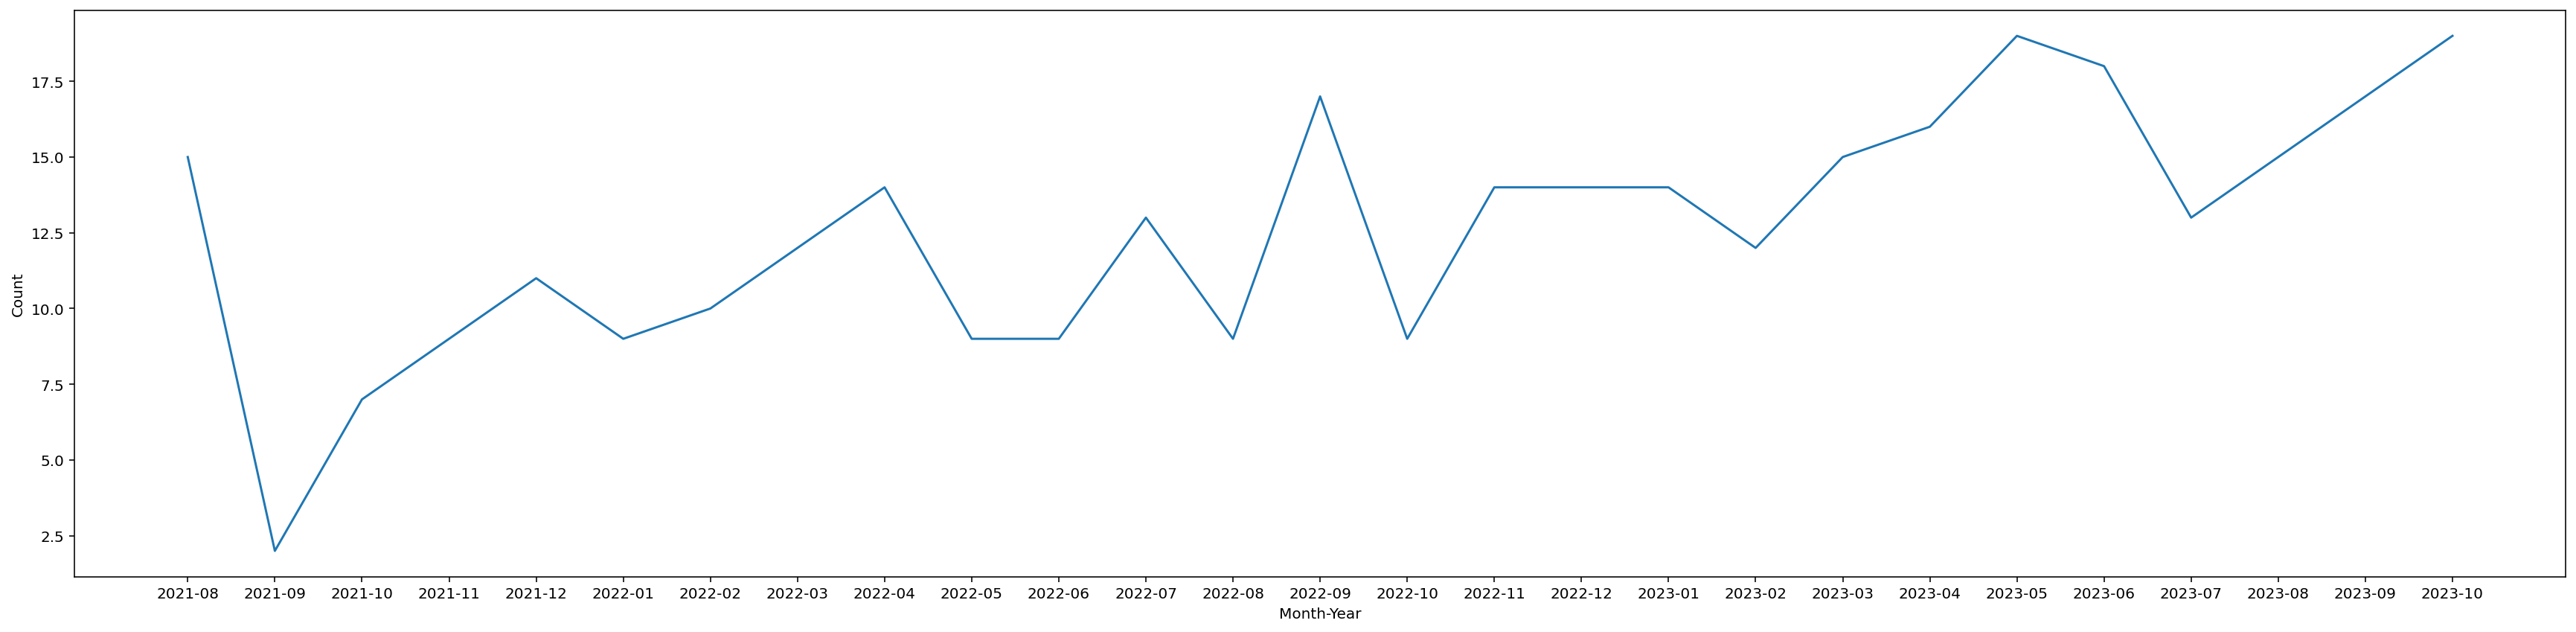

In [18]:
added_at_distribution = df.copy()
added_at_distribution['added_at'] = pd.to_datetime(added_at_distribution['added_at'])
added_at_distribution = added_at_distribution[added_at_distribution['added_at'].dt.date > pd.to_datetime('2021-08-01').date()]
added_at_distribution = added_at_distribution[added_at_distribution['added_at'].dt.date < pd.to_datetime('2023-11-01').date()]
added_at_distribution = added_at_distribution.reset_index()
added_at_distribution['Month_as_String'] = added_at_distribution['added_at'].dt.month.apply(lambda x: str(x).zfill(2))
added_at_distribution['Year'] = added_at_distribution['added_at'].dt.year
added_at_distribution['Month'] = added_at_distribution['added_at'].dt.month
added_at_distribution['Month_Year'] = added_at_distribution['added_at'].dt.year.astype(str) + '-' + added_at_distribution['Month_as_String']
added_at_distribution = added_at_distribution.sort_values(by=['Year', 'Month'], ascending=[False, False])
daily_counts = added_at_distribution['Month_Year'].value_counts().sort_index()
plt.figure().set_figwidth(30)
plt.plot(daily_counts)
plt.ylabel('Count')
plt.xlabel('Month-Year')
plt.savefig('NumOfSongsAdded.png')
plt.show()

How long it took from the release date of the album to get to the billion? 



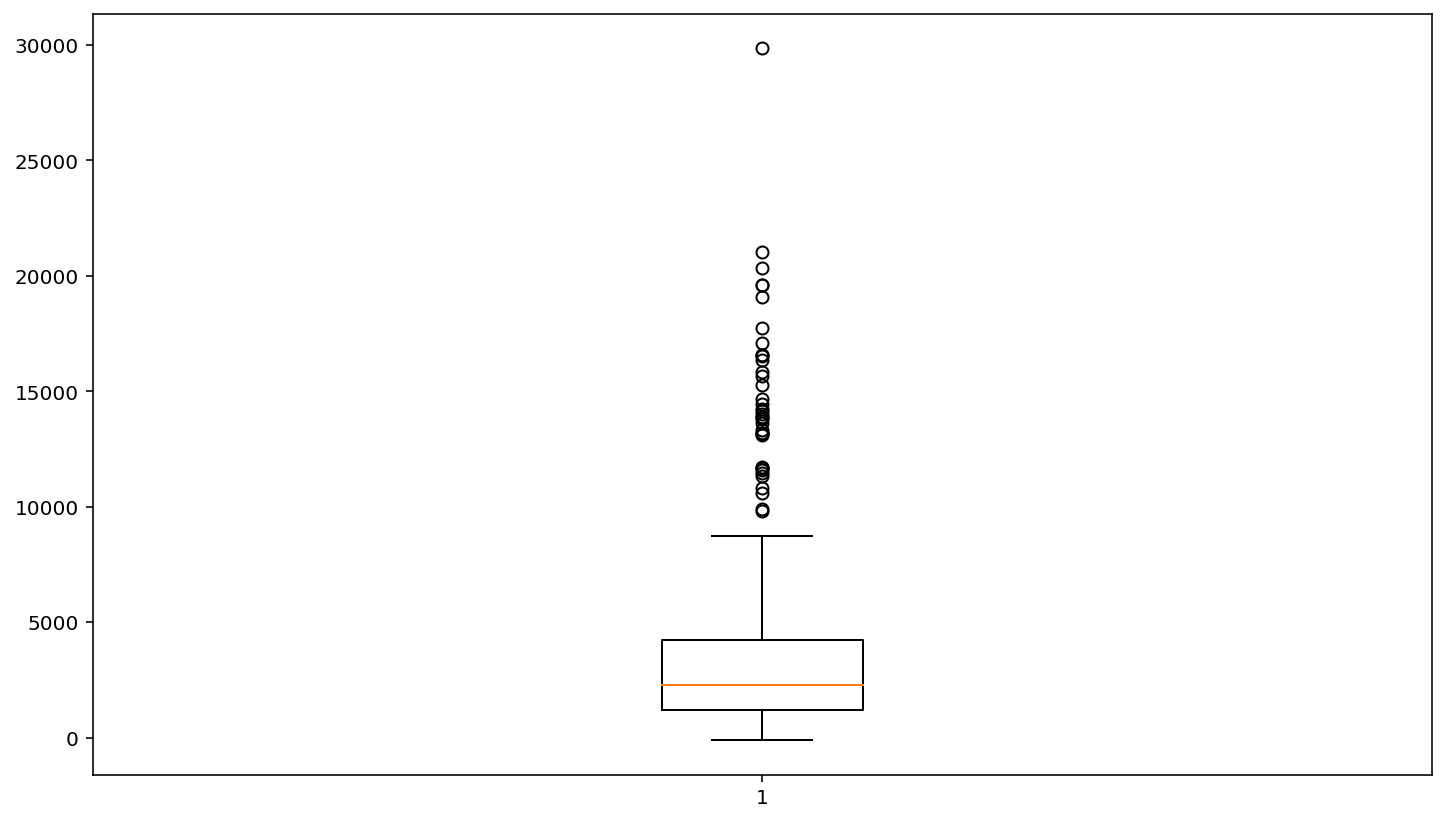

count      349.000000
mean      3913.994269
std       4496.741079
min       -106.000000
25%       1214.000000
50%       2268.000000
75%       4227.000000
max      29854.000000
Name: days_difference, dtype: float64


In [19]:
df['added_at'] = pd.to_datetime(df['added_at']).dt.tz_localize(None)
df['album_release_date'] = pd.to_datetime(df['album_release_date']).dt.tz_localize(None)
df_with_waittime = df.copy()
df_with_waittime = df_with_waittime[df_with_waittime['added_at'].dt.date != pd.to_datetime('2021-07-21').date()]
df_with_waittime['days_difference'] = (df_with_waittime['added_at'] - df_with_waittime['album_release_date']).dt.days
plt.boxplot(df_with_waittime['days_difference'])
plt.savefig('BoxPlotsDaysToBillion.png')
plt.show()
print(df_with_waittime['days_difference'].describe())
df_with_waittime = df_with_waittime.sort_values(by=['days_difference']).reset_index()

In [20]:
for index, song in df_with_waittime.head(10).iterrows():
    print(song['name'], end = ', ')
    for artist in song['artists']:
        print(artist['name'], end = ', ')
    print('added_at: ', song['added_at'], ', album_release_date: ', song['album_release_date'], ', days difference', song['days_difference'])

Flowers, Miley Cyrus, added_at:  2023-05-04 21:41:23 , album_release_date:  2023-08-18 00:00:00 , days difference -106
MONTERO (Call Me By Your Name), Lil Nas X, added_at:  2021-10-04 19:24:22 , album_release_date:  2021-09-17 00:00:00 , days difference 17
As It Was, Harry Styles, added_at:  2022-07-28 22:29:21 , album_release_date:  2022-05-20 00:00:00 , days difference 69
drivers license, Olivia Rodrigo, added_at:  2021-08-11 15:17:08 , album_release_date:  2021-05-21 00:00:00 , days difference 82
Seven (feat. Latto) (Explicit Ver.), Jung Kook, Latto, added_at:  2023-10-30 17:51:11 , album_release_date:  2023-07-14 00:00:00 , days difference 108
STAY (with Justin Bieber), The Kid LAROI, Justin Bieber, added_at:  2021-11-04 20:15:37 , album_release_date:  2021-07-09 00:00:00 , days difference 118
Bad Habits, Ed Sheeran, added_at:  2022-03-31 23:08:47 , album_release_date:  2021-10-29 00:00:00 , days difference 153
good 4 u, Olivia Rodrigo, added_at:  2021-10-26 15:23:08 , album_releas

In [21]:
for index, song in df_with_waittime.tail(10).iterrows():
    print(song['name'], end = ', ')
    for artist in song['artists']:
        print(artist['name'], end = ', ')
    print('added_at: ', song['added_at'], ', album_release_date: ', song['album_release_date'], ', days difference', song['days_difference'])

We Will Rock You - Remastered 2011, Queen, added_at:  2023-02-24 17:27:19 , album_release_date:  1977-10-28 00:00:00 , days difference 16555
Dreams - 2004 Remaster, Fleetwood Mac, added_at:  2022-06-27 03:26:21 , album_release_date:  1977-02-04 00:00:00 , days difference 16579
Dancing Queen, ABBA, added_at:  2023-07-11 19:57:40 , album_release_date:  1976-10-11 00:00:00 , days difference 17074
Sweet Home Alabama, Lynyrd Skynyrd, added_at:  2022-11-07 19:39:29 , album_release_date:  1974-04-15 00:00:00 , days difference 17738
Have You Ever Seen The Rain, Creedence Clearwater Revival, added_at:  2023-03-02 17:54:01 , album_release_date:  1970-12-07 00:00:00 , days difference 19078
Fortunate Son, Creedence Clearwater Revival, added_at:  2023-06-13 17:48:05 , album_release_date:  1969-11-02 00:00:00 , days difference 19581
Here Comes The Sun - Remastered 2009, The Beatles, added_at:  2023-05-09 17:33:50 , album_release_date:  1969-09-26 00:00:00 , days difference 19583
Ain't No Mountain Hi

How popular are the artists right now? 



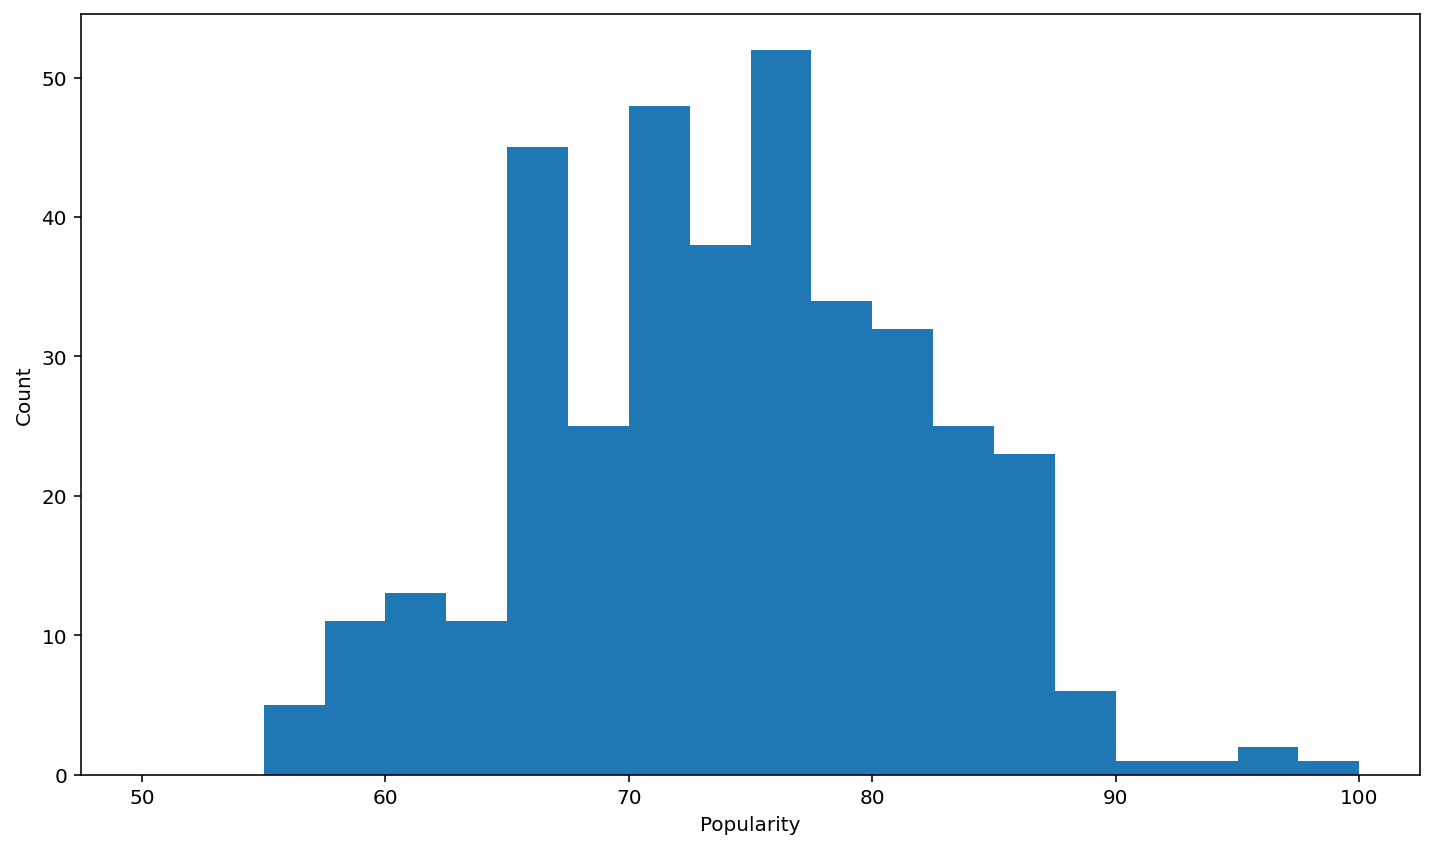

In [22]:
plt.hist(artists_df['popularity'], bins = [50, 52.5, 55, 57.5, 60, 62.5, 65, 67.5, 70, 72.5, 75, 77.5, 80, 82.5, 85, 87.5, 90, 92.5, 95, 97.5, 100])
plt.ylabel('Count')
plt.xlabel('Popularity')
plt.savefig('ArtistsPopularity.png')
plt.show()

In [23]:
df_sorted = artists_df.sort_values(by='popularity').reset_index()
df_sorted.head(10)

,index,followers,genres,id,name,popularity
0,162,1087354,"[edm, electro house, pop dance]",1HxJeLhIuegM3KgvPn8sTa,Jack Ü,56
1,336,82840,[gauze pop],0CjWKoS55T7DOt0HJuwF1H,Bipolar Sunshine,57
2,345,5032,[],4VZY0nxYMSNotbS7WjNVQy,Nyla,57
3,164,115779,[nz pop],56mfhUDKa1vec6rSLZV5Eg,Jawsh 685,57
4,325,21962,[modern alternative rock],4olE3I5QU0dvSR7LIpqTXc,WATT,57
5,318,111748,[australian pop],1rw8ZTLnDHd74TWDDukjVi,Conrad Sewell,58
6,368,82631,"[bboy, instrumental funk]",726MxZBpkxnnoKl6aN7mmj,Cookin' On 3 Burners,58
7,320,4024,[],1WsYCXdezMjn0KoIrLvMmC,Ed Sheeran & Justin Bieber,58
8,344,11412,[],2zzpznMuhKlKlqh1ma7Sms,Dakota,58
9,280,568499,"[neo mellow, piano rock, pop rock, viral pop]",5xKp3UyavIBUsGy3DQdXeF,A Great Big World,58


In [24]:
df_sorted.tail(10)

,index,followers,genres,id,name,popularity
363,104,42288431,"[reggaeton, reggaeton colombiano, trap latino,...",790FomKkXshlbRYZFtlgla,KAROL G,88
364,15,79420787,"[detroit hip hop, hip hop, rap]",7dGJo4pcD2V6oG8kP0tJRR,Eminem,88
365,111,30359431,"[art pop, pop]",00FQb4jTyendYWaN8pK0wa,Lana Del Rey,88
366,35,22438472,"[chicago rap, hip hop, rap]",5K4W6rqBFWDnAN6FQUkS6x,Kanye West,89
367,281,11632765,[k-pop],6HaGTQPmzraVmaVxvz6EUc,Jung Kook,89
368,32,25509883,"[hip hop, rap, slap house]",0Y5tJX1MQlPlqiwlOH1tJY,Travis Scott,90
369,5,75522658,"[canadian contemporary r&b, canadian pop, pop]",1Xyo4u8uXC1ZmMpatF05PJ,The Weeknd,93
370,3,77584176,"[reggaeton, trap latino, urbano latino]",4q3ewBCX7sLwd24euuV69X,Bad Bunny,95
371,1,82948910,"[canadian hip hop, canadian pop, hip hop, pop ...",3TVXtAsR1Inumwj472S9r4,Drake,95
372,16,95000579,[pop],06HL4z0CvFAxyc27GXpf02,Taylor Swift,100


In [25]:
artists_df['popularity'].describe()

count    373.000000
mean      73.951743
std        7.845472
min       56.000000
25%       68.000000
50%       74.000000
75%       79.000000
max      100.000000
Name: popularity, dtype: float64

How many of them are not available everywhere? 



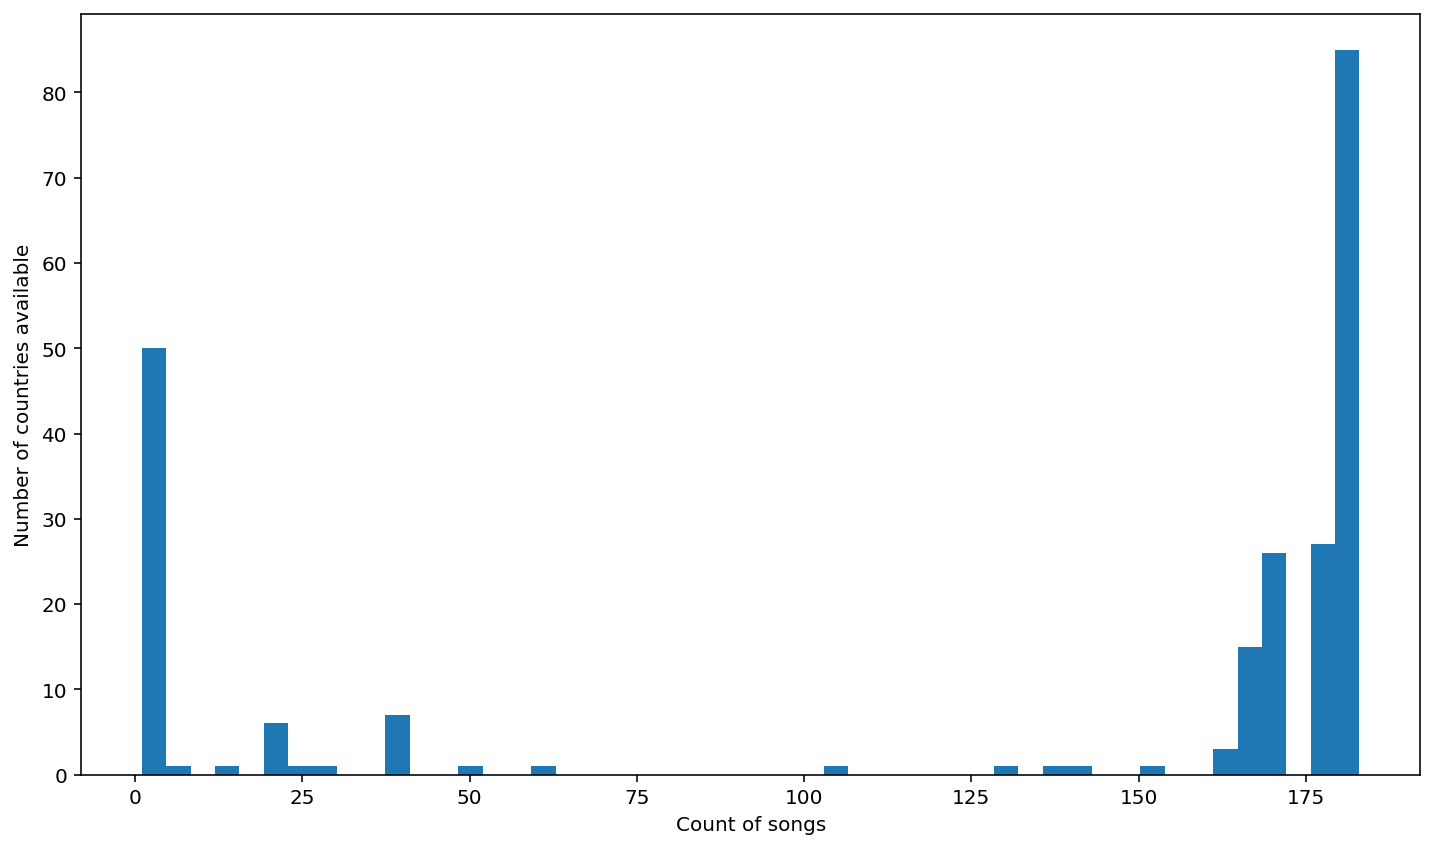

In [26]:
df_countries_exploded = df.explode('available_markets')
countries_num = len(pd.unique(df_countries_exploded['available_markets']))
df['num_available_markets'] = df['available_markets'].apply(len)
songs_not_in_all_markets = df[df['num_available_markets'] != countries_num]
sorted_df = songs_not_in_all_markets.sort_values(by='available_markets', key=lambda x: x.str.len()).reset_index()
plt.hist(songs_not_in_all_markets['num_available_markets'], 50)
plt.xlabel('Count of songs')
plt.ylabel('Number of countries available')
plt.savefig('CountriesAvailable.png')
plt.show()

In [27]:
all_countries = [item for sublist in df['available_markets'] for item in sublist]

# Count the occurrences of each element in the combined list
counts = Counter(all_countries)
counts = counts.most_common()
print(counts[:10])
print(counts[-10:])

[('US', 509), ('CA', 491), ('MX', 473), ('CR', 455), ('DO', 452), ('SV', 452), ('GT', 452), ('HN', 452), ('NI', 452), ('PA', 452)]
[('TV', 419), ('SB', 418), ('NP', 418), ('UZ', 418), ('SE', 418), ('PS', 417), ('VU', 414), ('BF', 409), ('BN', 409), ('BY', 393)]


How many of the songs on albums are in the first 1/3 of the album?



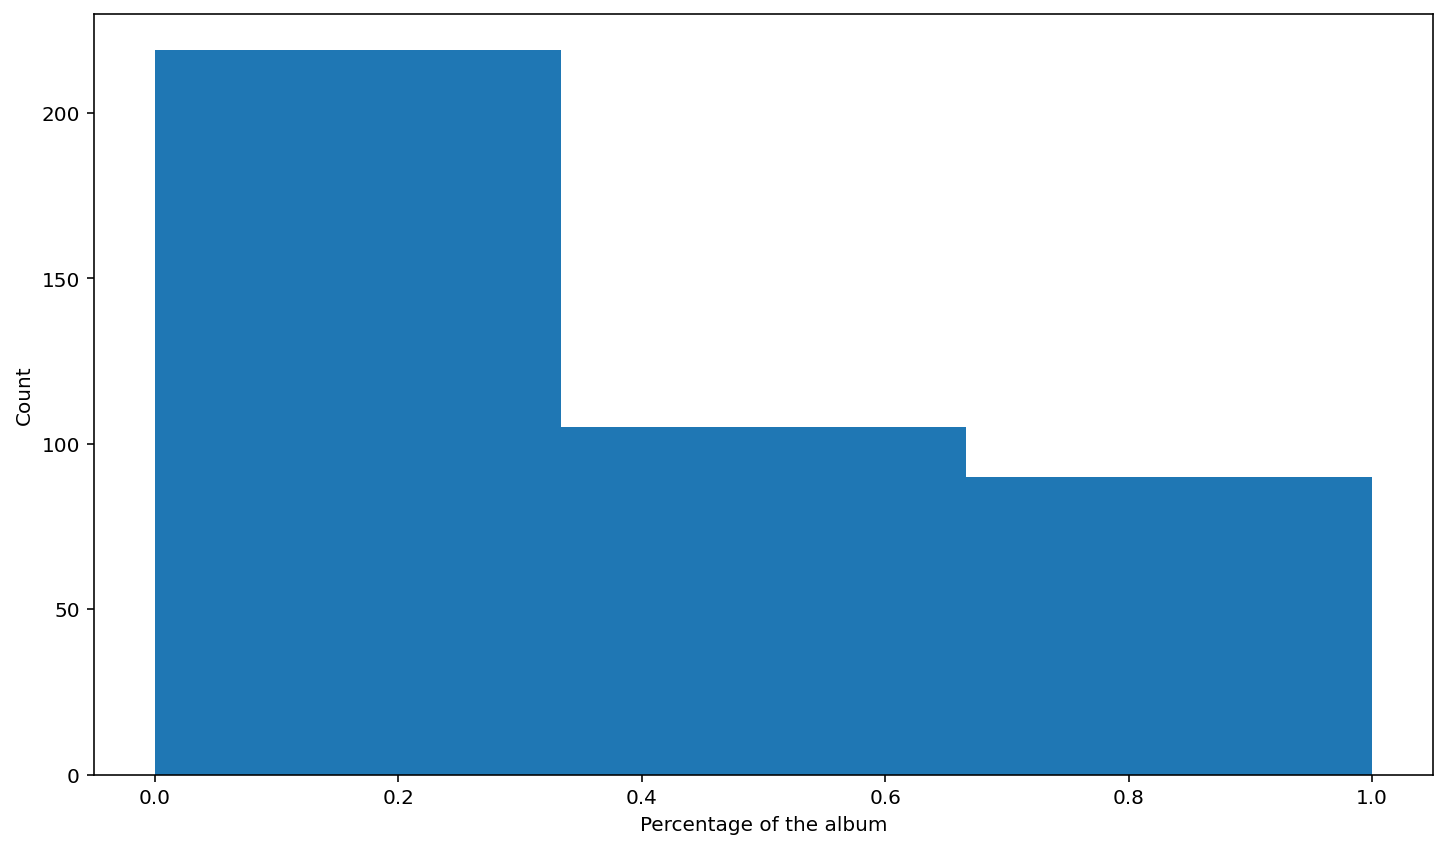

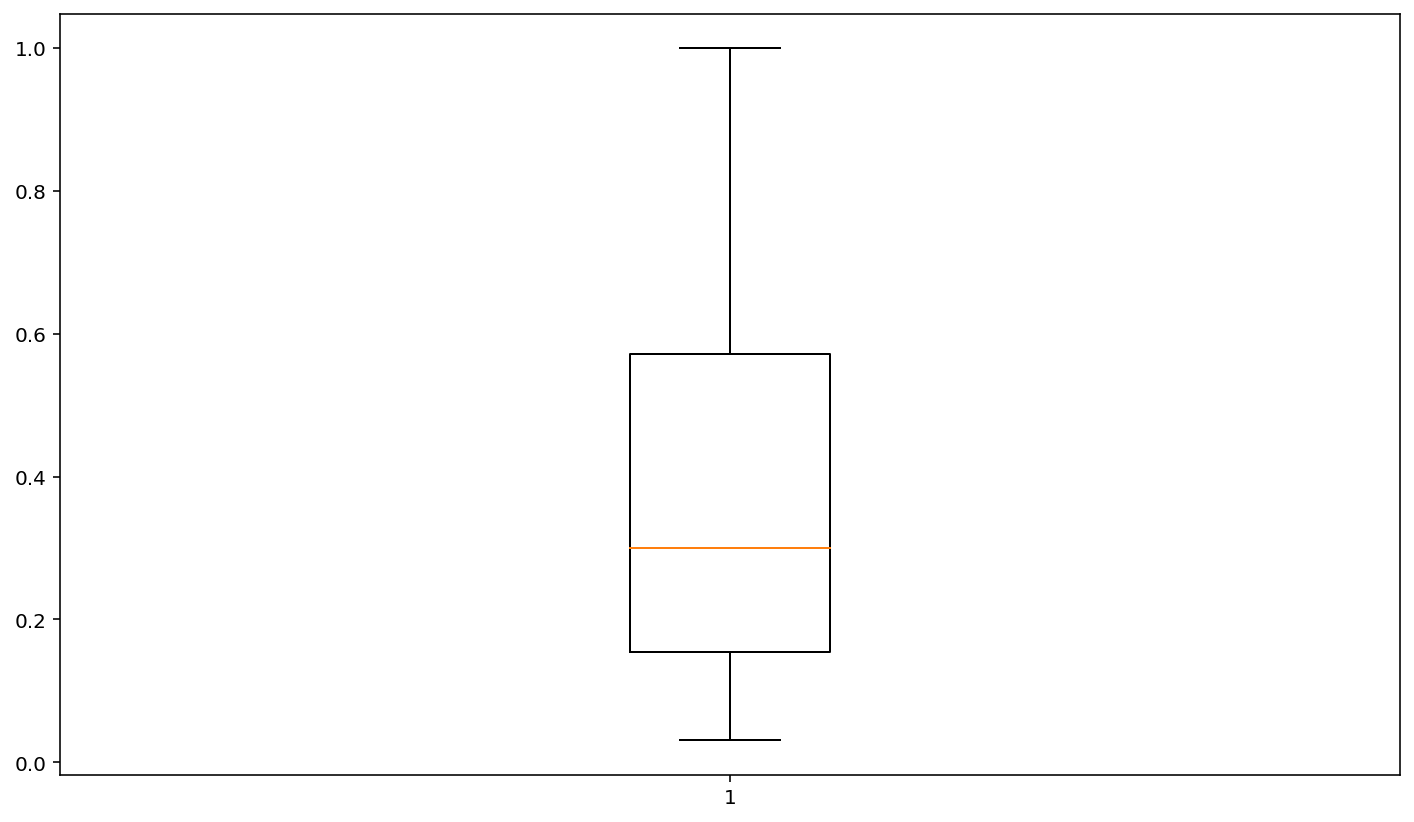

count    414.000000
mean       0.384456
std        0.289179
min        0.031250
25%        0.153846
50%        0.300000
75%        0.571429
max        1.000000
Name: track_ratio, dtype: float64

In [28]:
df_on_albums = df.copy()
df_on_albums = df_on_albums[df_on_albums['album_total_tracks'] > 1]
df_on_albums['track_ratio'] = df_on_albums['track_number'] / df_on_albums['album_total_tracks']
plt.hist(df_on_albums['track_ratio'], [0, 1/3, 2/3, 1])
plt.ylabel('Count')
plt.xlabel('Percentage of the album')
plt.savefig('WhereOnAlbum.png')
plt.show()
plt.boxplot(df_on_albums['track_ratio'])
plt.savefig('BoxPlotWhereOnAlbum.png')
plt.show()
df_on_albums['track_ratio'].describe()

In [29]:
from scipy.stats import ttest_1samp
result = ttest_1samp(df_on_albums['track_ratio'], 1/3)

print(result)
if result.pvalue < 0.05:
    print(f"Reject the null hypothesis. The average track ratio is significantly less than 1/3.")
else:
    print("Fail to reject the null hypothesis. There is not enough evidence to suggest a significant difference in the average track ratio.")

TtestResult(statistic=3.5970537235164386, pvalue=0.00036082338385779876, df=413)
Reject the null hypothesis. The average track ratio is significantly less than 1/3.


How are the durations of the songs depending on release date? 



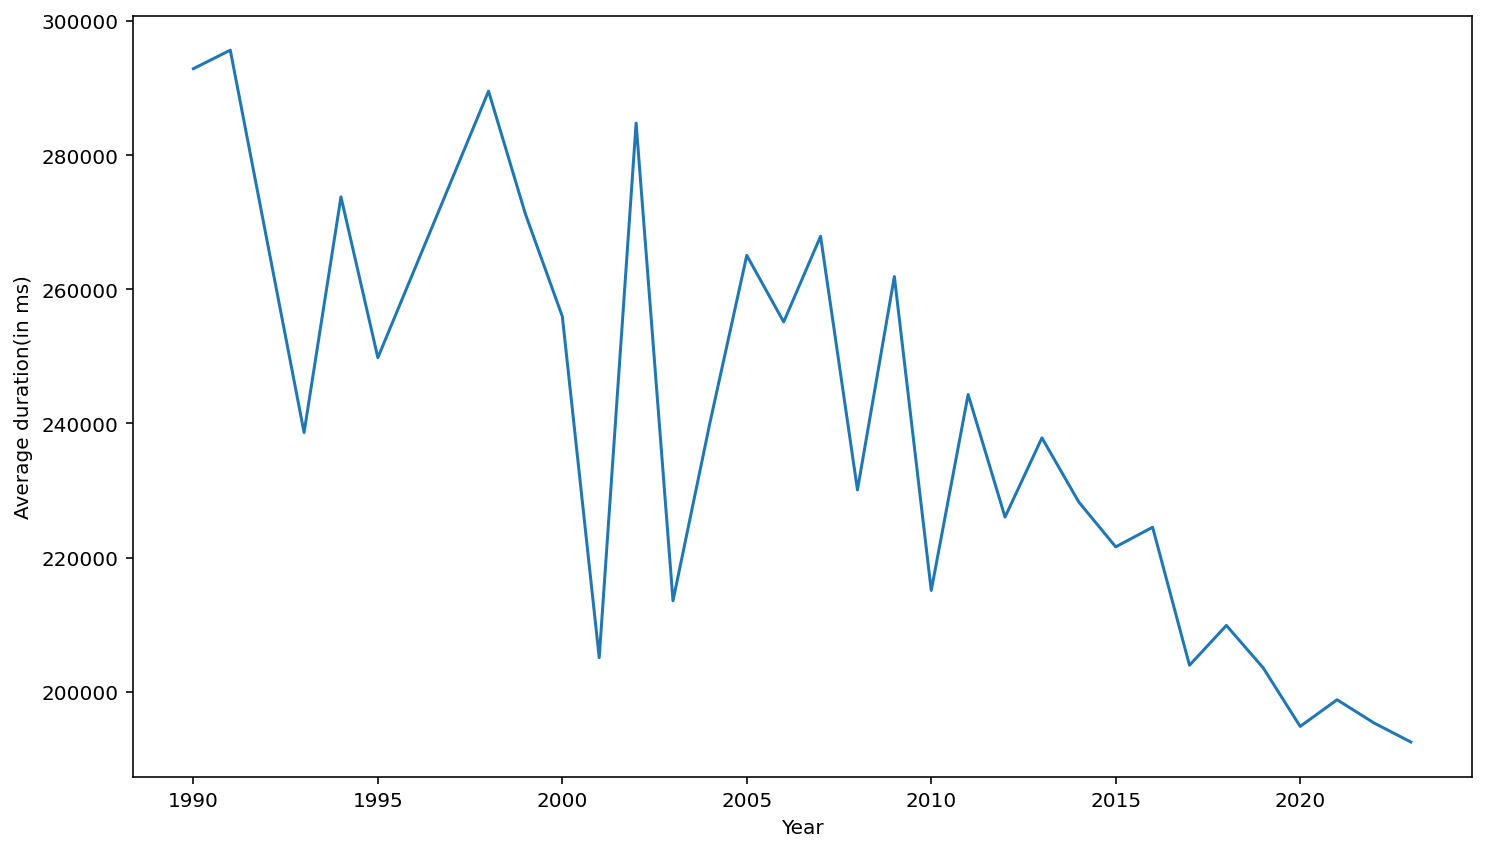

In [30]:
release_distribution = df.copy()
release_distribution['year'] = release_distribution['album_release_date'].dt.year
average_duration_per_year = release_distribution.groupby('year').agg({'duration_ms': 'mean', 'album_release_date': 'count'}).reset_index()
average_duration_per_year.columns = ['year', 'average_duration', 'number_of_songs']
average_duration_per_year = average_duration_per_year[average_duration_per_year['year'] >= 1990]
plt.plot(average_duration_per_year['year'], average_duration_per_year['average_duration'])
plt.ylabel('Average duration(in ms)')
plt.xlabel('Year')
plt.show()

[-2.57637442e+03  5.41066693e+06]


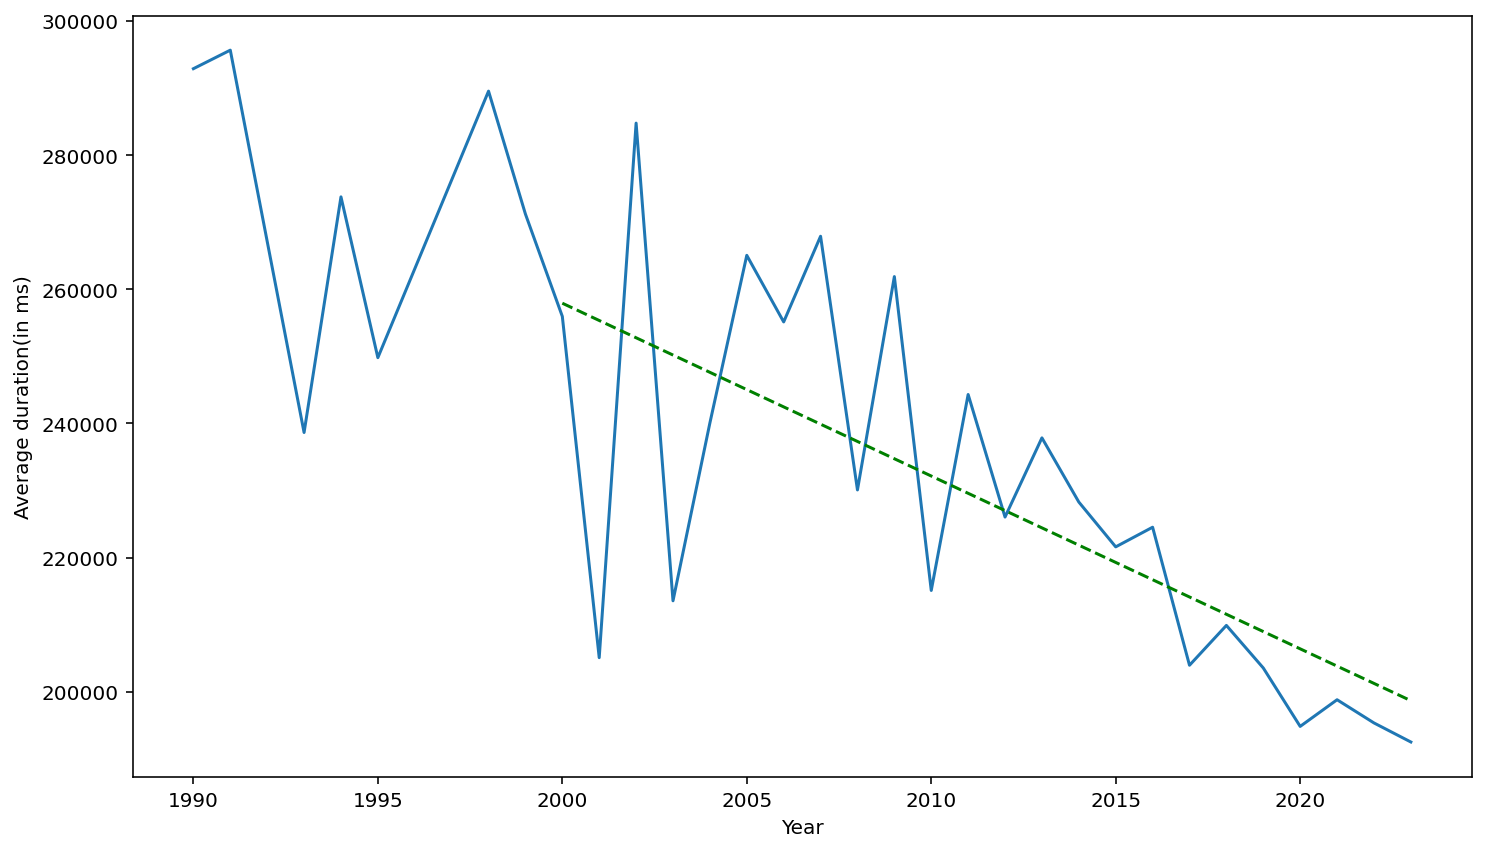

26464.39923139045
0.4875698741884431


In [55]:
reg = np.polyfit(average_duration_per_year['year'], average_duration_per_year['average_duration'], deg=1)
print(reg)
trend = np.polyval(reg, average_duration_per_year['year'][-24:])
std = average_duration_per_year['average_duration'][-24:].std()

plt.plot(average_duration_per_year['year'], average_duration_per_year['average_duration'], label='average duration of songs')
plt.plot(average_duration_per_year['year'][-24:], trend, 'g--')
plt.ylabel('Average duration(in ms)')
plt.xlabel('Year')
plt.savefig('LinearReggressionDuration.png')
plt.show()

r2_score_duration = r2_score(average_duration_per_year['average_duration'][-24:], trend)
print(r2_score_duration)

Other things over time

- interesting ones =&gt; energy? 



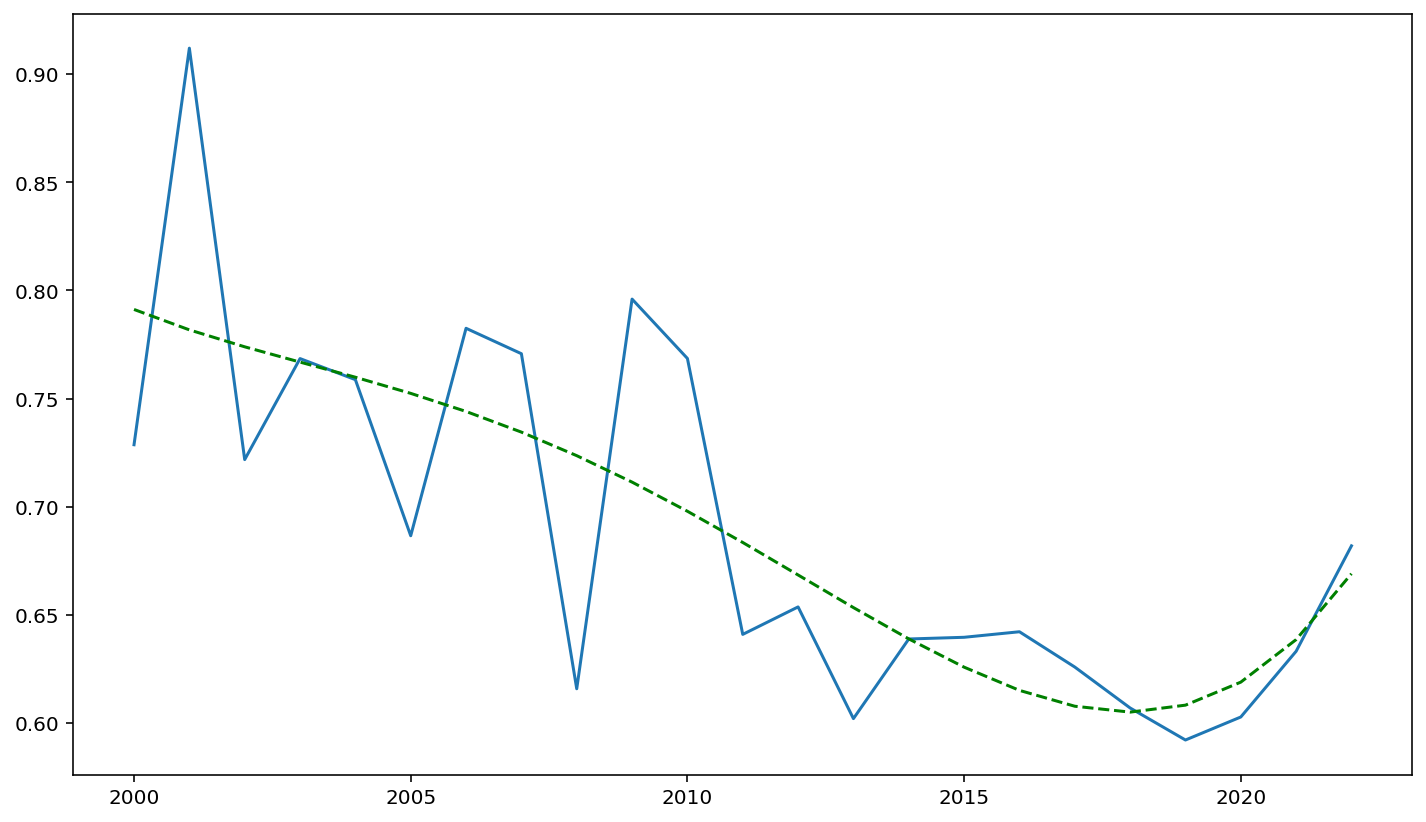

0.5953675352538798


In [32]:
average_energy_per_year = release_distribution.groupby('year').agg({'energy': 'mean', 'album_release_date': 'count'}).reset_index()
average_energy_per_year.columns = ['year', 'average_energy', 'number_of_songs']
average_energy_per_year = average_energy_per_year[average_energy_per_year['year'] >= 2000]
average_energy_per_year = average_energy_per_year[average_energy_per_year['year'] < 2023]

reg = np.polyfit(average_energy_per_year['year'], average_energy_per_year['average_energy'], deg=4)
trend = np.polyval(reg, average_energy_per_year['year'][-24:])
std = average_energy_per_year['average_energy'][-24:].std()

plt.plot(average_energy_per_year['year'], average_energy_per_year['average_energy'], label='average energy of songs')
plt.plot(average_energy_per_year['year'][-24:], trend, 'g--')
plt.show()

r2_score_energy = r2_score(average_energy_per_year['average_energy'][-24:], trend)
print(r2_score_energy)

In [33]:
min_index_regression = np.argmin(trend)
min_year_regression = average_energy_per_year['year'].iloc[min_index_regression]
min_energy_regression = trend[min_index_regression]
print('Lowest year and value for it', min_year_regression, min_energy_regression)

Lowest year and value for it 2018 0.6050645262002945


Are “one hit wonders” now less popular\(as artists\)? 



In [34]:
one_hit_wonders = artist_occurrences[artist_occurrences['occurrences'] == 1]
artists_df = artists_df.rename(columns = {'id' : 'artist_id'})
one_hit_wonders = one_hit_wonders.merge(artists_df, how='left', on='artist_id')

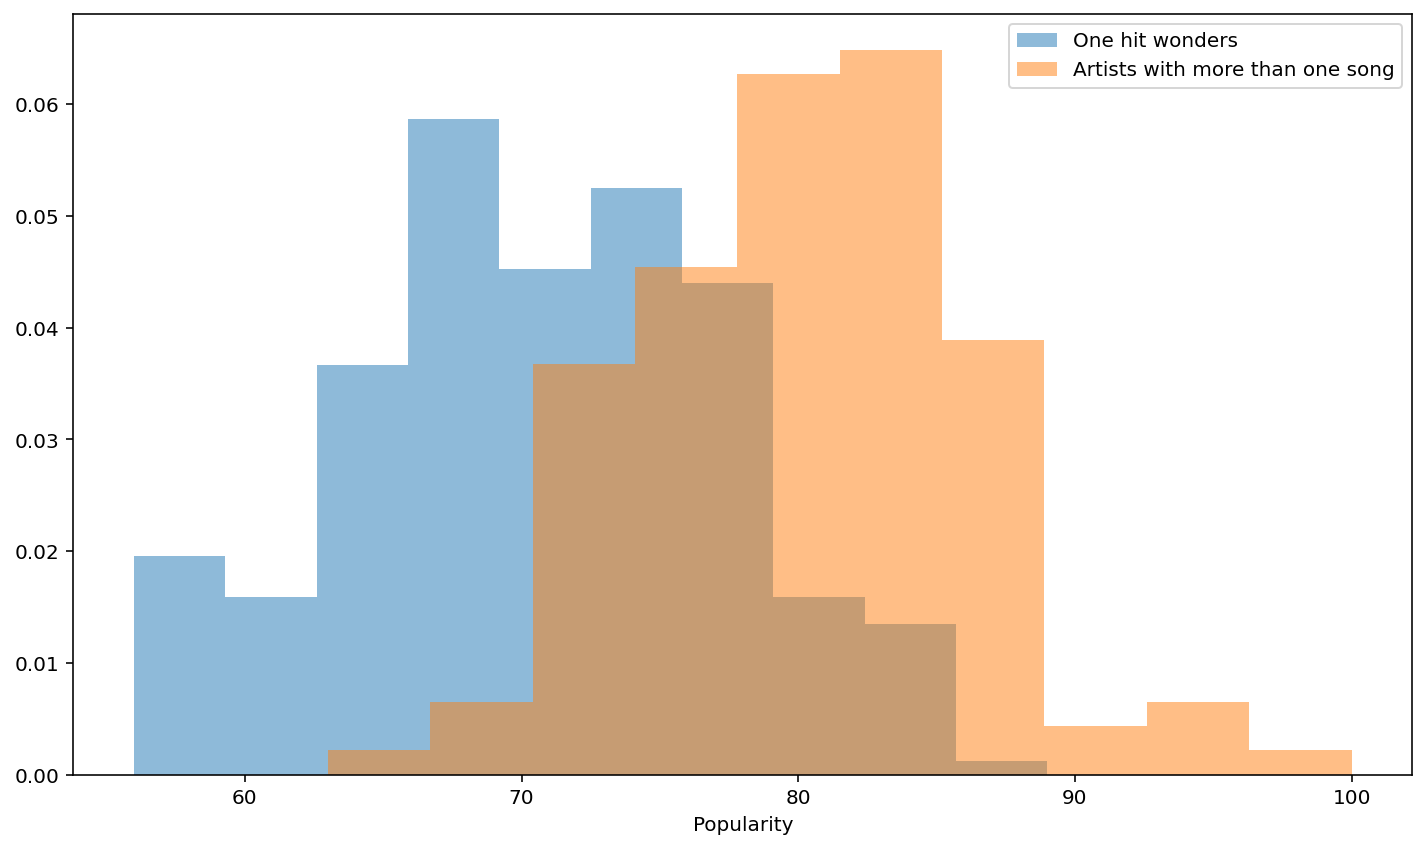

125
One hit
count    248.000000
mean      70.826613
std        6.724643
min       56.000000
25%       66.000000
50%       71.000000
75%       75.000000
max       89.000000
Name: popularity, dtype: float64
More than one
count    125.00000
mean      80.15200
std        6.02422
min       63.00000
25%       76.00000
50%       80.00000
75%       84.00000
max      100.00000
Name: popularity, dtype: float64


In [35]:
more_than_one_song = artist_occurrences[artist_occurrences['occurrences'] > 1]
artists_df = artists_df.rename(columns = {'id' : 'artist_id'})
more_than_one_song = more_than_one_song.merge(artists_df, how='left', on='artist_id')
plt.hist(one_hit_wonders['popularity'], alpha=0.5, label='One hit wonders', density=True)
plt.hist(more_than_one_song['popularity'], alpha=0.5, label='Artists with more than one song', density=True)
plt.legend()
plt.xlabel('Popularity')
plt.savefig('OneHitVsMoreThenOne.png')
plt.show()
print(len(more_than_one_song))
print('One hit')
print(one_hit_wonders['popularity'].describe())
print('More than one')
print(more_than_one_song['popularity'].describe())

Are explicit songs more popular nowadays? 



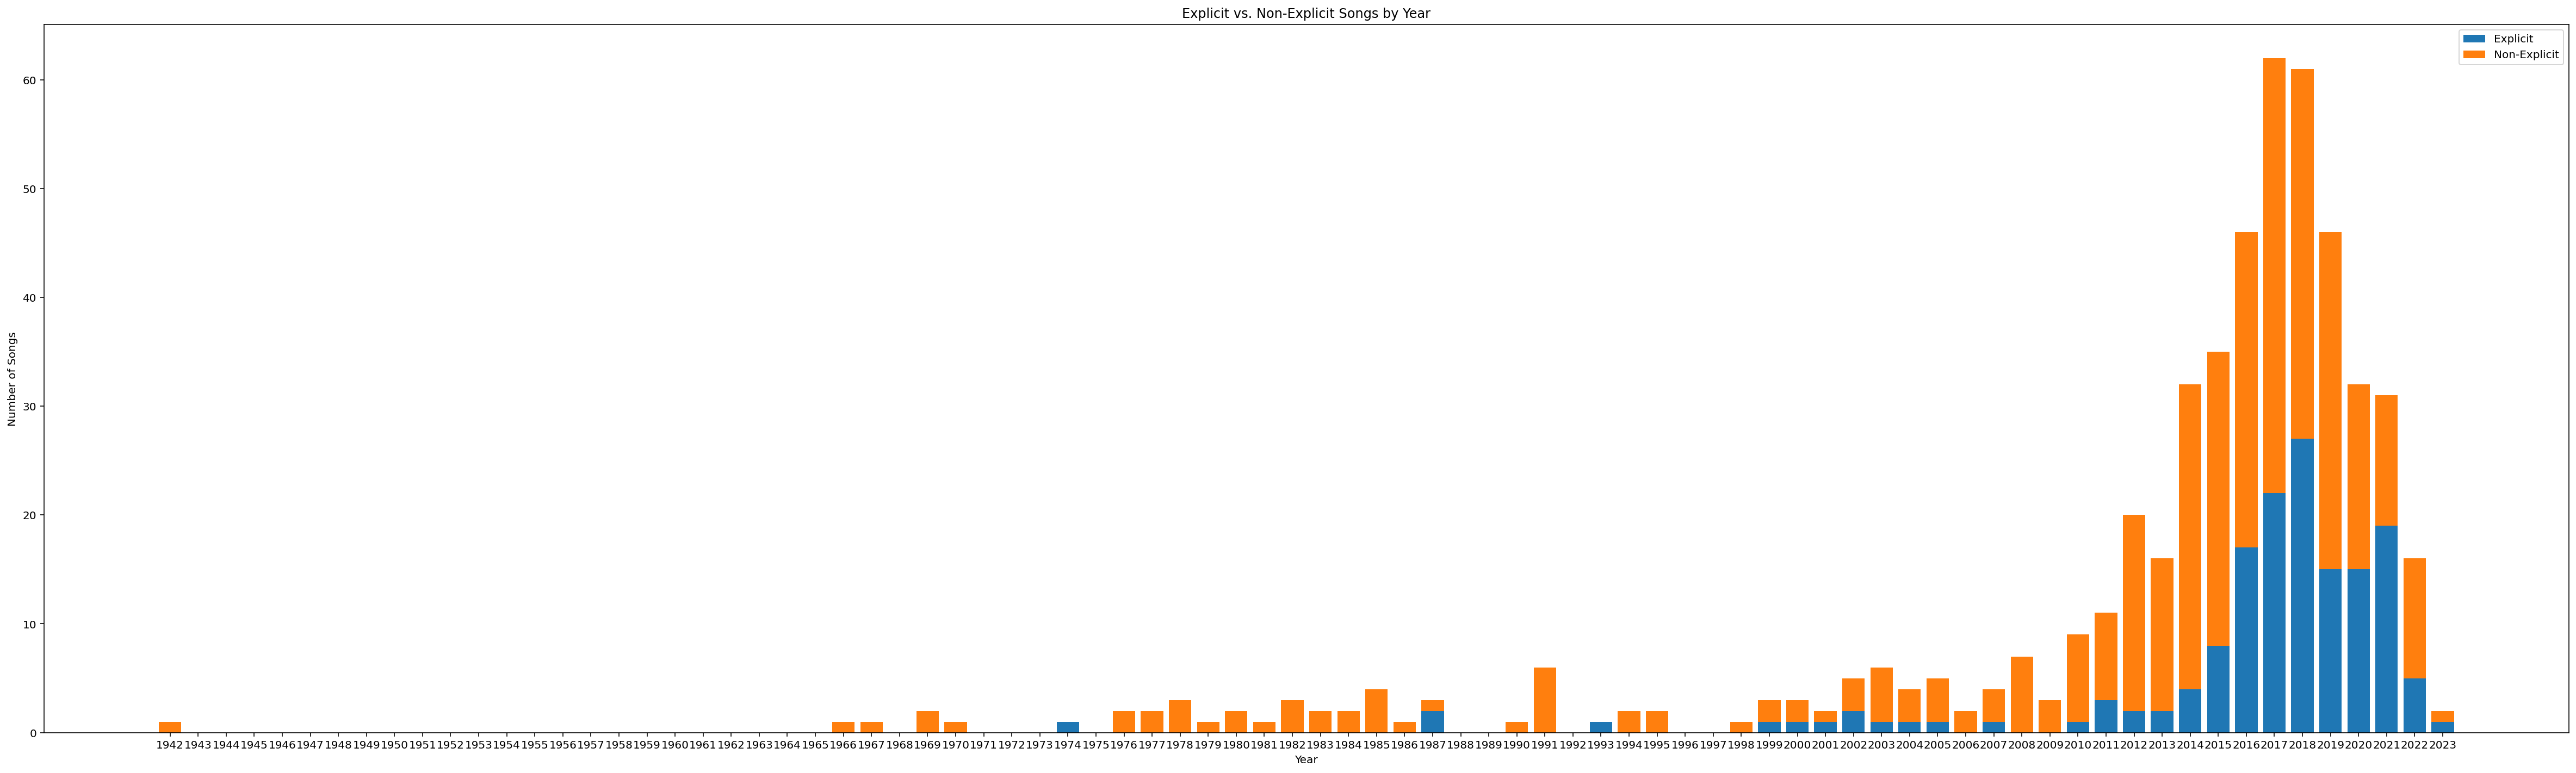

In [36]:
explicit_songs_by_year = release_distribution.groupby(['year', 'explictit']).count().reset_index()
explicit_songs_by_year = explicit_songs_by_year[['year', 'explictit', 'added_at']]
explicit_songs_by_year = explicit_songs_by_year.rename(columns = {'explictit' : 'explicit', 'added_at' : 'count'})
explicit = explicit_songs_by_year[explicit_songs_by_year['explicit'] == True]
non_explicit = explicit_songs_by_year[explicit_songs_by_year['explicit'] == False]

all_years = pd.DataFrame({'year': range(explicit_songs_by_year['year'].min(), explicit_songs_by_year['year'].max() + 1)})
merged_explicit = pd.merge(all_years, explicit, on='year', how='left').fillna(0)
merged_non_explicit = pd.merge(all_years, non_explicit, on='year', how='left').fillna(0)

plt.figure(figsize=(33, 10))

plt.bar(merged_explicit['year'], merged_explicit['count'], label='Explicit')

plt.bar(merged_non_explicit['year'], merged_non_explicit['count'], label='Non-Explicit', bottom=merged_explicit['count'])

plt.xlabel('Year')
plt.ylabel('Number of Songs')
plt.title('Explicit vs. Non-Explicit Songs by Year')
plt.savefig('CountExplicit.png')
plt.legend()
plt.xticks(merged_explicit['year'])  # Setting x-axis ticks to the years

plt.tight_layout()
plt.show()

year
2000    33.333333
2001    50.000000
2002    40.000000
2003    16.666667
2004    25.000000
2005    20.000000
2006     0.000000
2007    25.000000
2008     0.000000
2009     0.000000
2010    11.111111
2011    27.272727
2012    10.000000
2013    12.500000
2014    12.500000
2015    22.857143
2016    36.956522
2017    35.483871
2018    44.262295
2019    32.608696
2020    46.875000
2021    61.290323
2022    31.250000
2023    50.000000
Name: Explicit_Percentage, dtype: float64


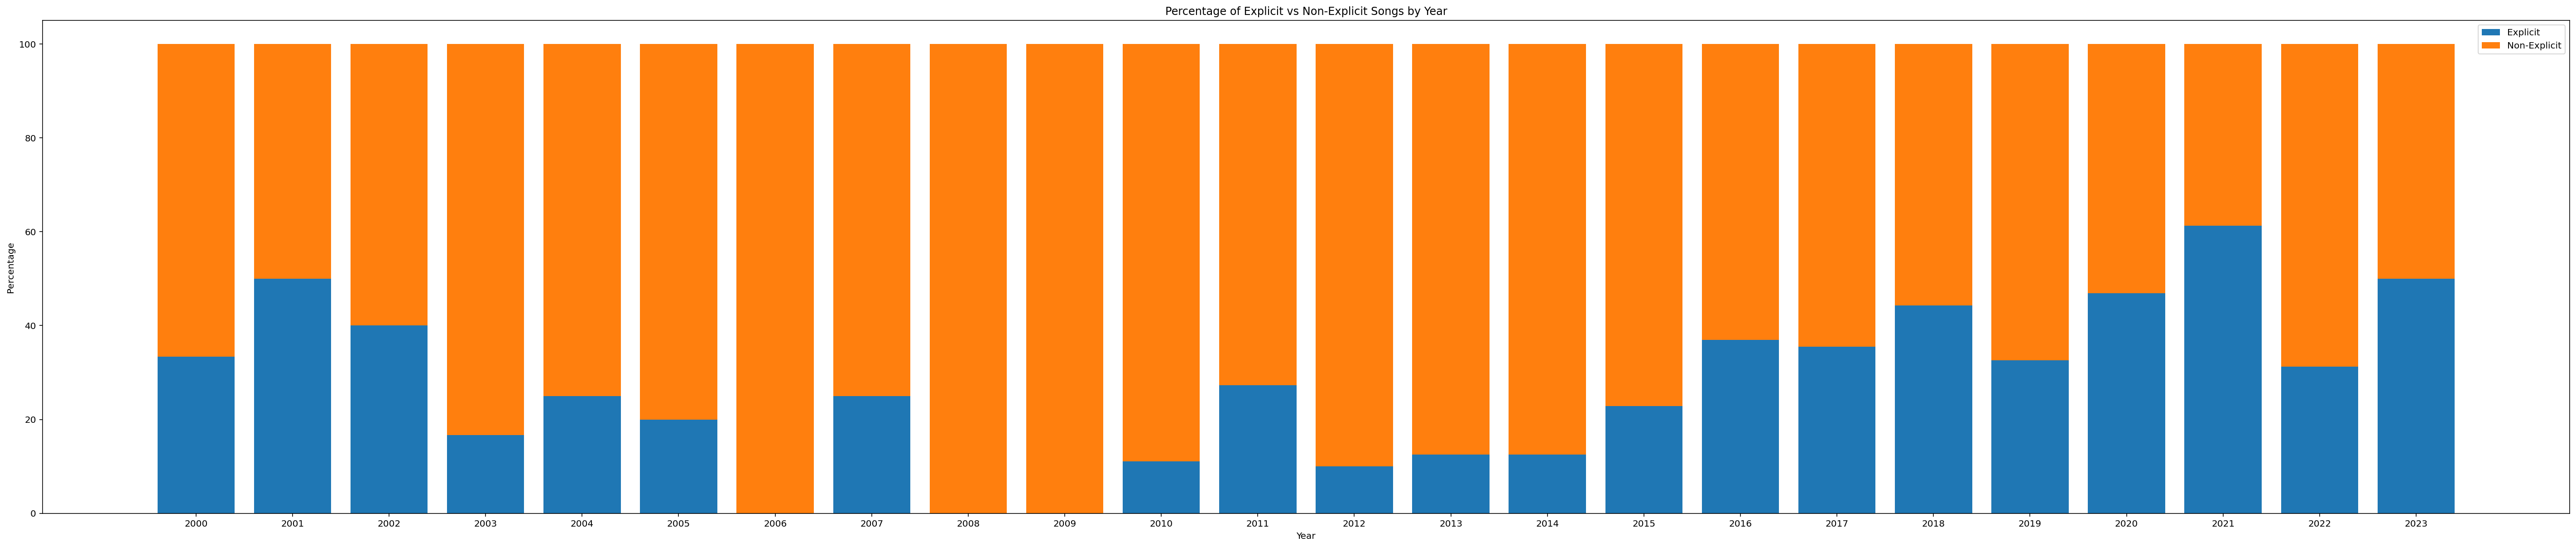

In [37]:
release_distribution = release_distribution[release_distribution['year'] >= 2000]
grouped = release_distribution.groupby('year')['explictit'].value_counts(normalize=True).unstack().fillna(0)
grouped['Explicit_Percentage'] = grouped[True] * 100
grouped['Non_Explicit_Percentage'] = grouped[False] * 100

years = grouped.index
explicit_percentage = grouped['Explicit_Percentage']
non_explicit_percentage = grouped['Non_Explicit_Percentage']
print(explicit_percentage)

plt.figure(figsize=(50, 10))

plt.bar(years, explicit_percentage, label='Explicit')
plt.bar(years, non_explicit_percentage, bottom=explicit_percentage, label='Non-Explicit')

plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title('Percentage of Explicit vs Non-Explicit Songs by Year')
plt.legend()
plt.savefig('PercentageExplicit.png')
plt.xticks(years)  # Show all years on the x-axis

plt.show()

Singles vs albums


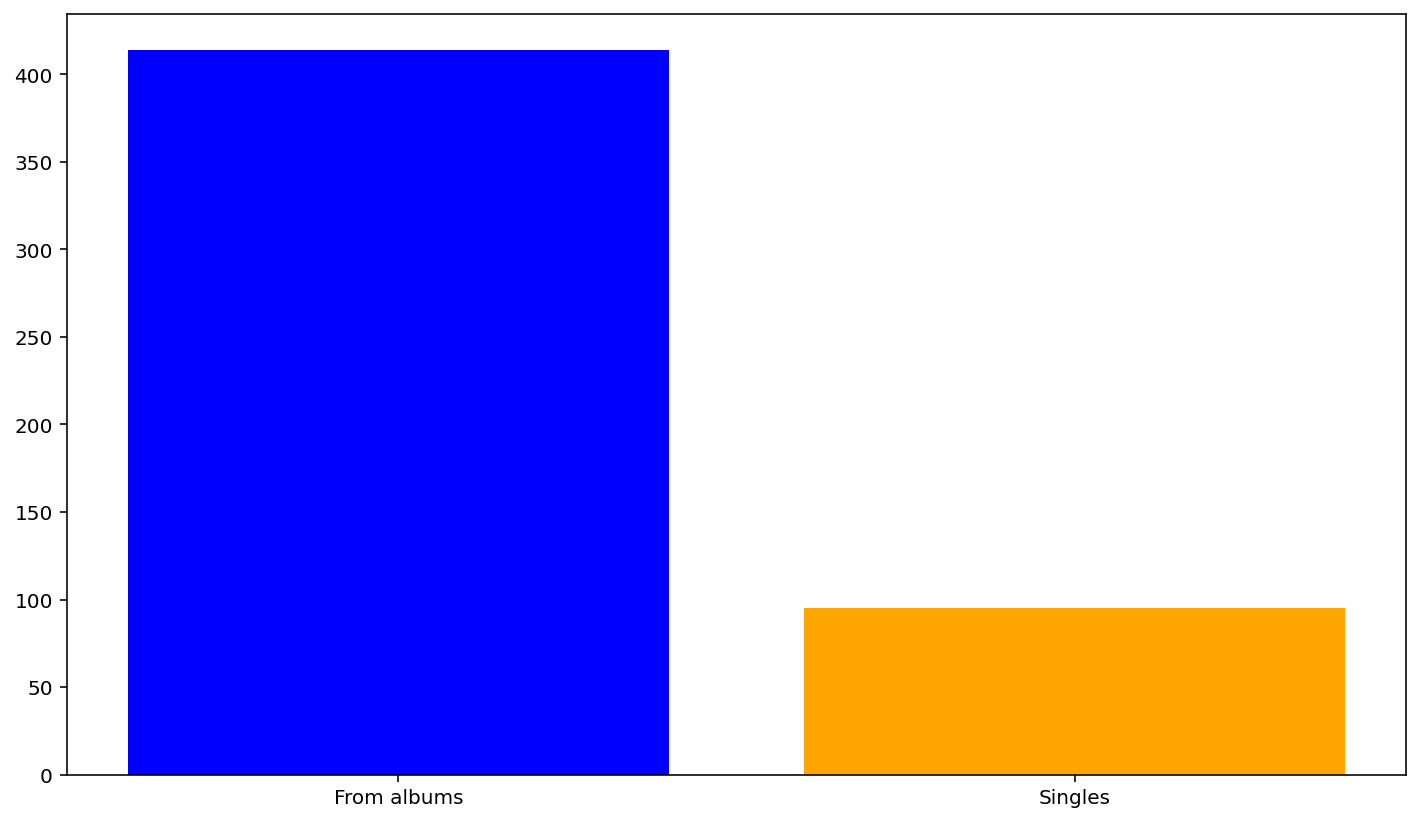

In [38]:
df_on_albums = df.copy()
df_on_albums = df_on_albums[df_on_albums['album_total_tracks'] > 1]

df_singles = df.copy()
df_singles = df_singles[df_singles['album_total_tracks'] == 1]
plt.bar(['From albums', 'Singles'], [len(df_on_albums), len(df_singles)], color=['blue', 'orange'])
plt.savefig('SinglesVsAlbums.png')
plt.show()

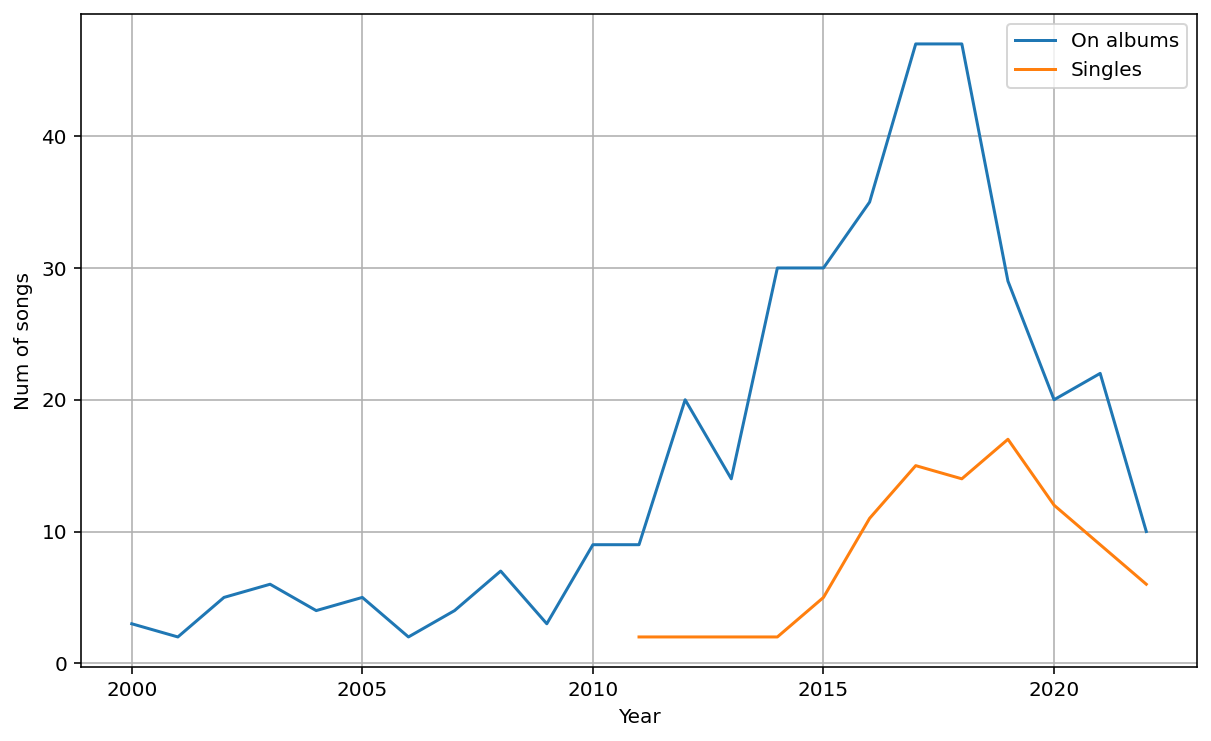

In [39]:
df_on_albums['year'] = pd.to_datetime(df_on_albums['album_release_date']).dt.year
df_singles['year'] = pd.to_datetime(df_singles['album_release_date']).dt.year

df_on_albums = df_on_albums[(df_on_albums['year'] >= 2000) & (df_on_albums['year'] < 2023)]
df_singles = df_singles[(df_singles['year'] >= 2000) & (df_singles['year'] < 2023)]

df_on_albums = df_on_albums.groupby('year')['id'].count()

df_singles = df_singles.groupby('year')['id'].count()

plt.figure(figsize=(10, 6))
plt.plot(df_on_albums.index, df_on_albums, label='On albums')
plt.plot(df_singles.index, df_singles, label='Singles')

plt.xlabel('Year')
plt.ylabel('Num of songs')
plt.legend()
plt.grid(True)
plt.savefig('AlbumsVsSinglesYears.png')
plt.show()

In [40]:
print('On albums')
print(df_on_albums)
print('Singles')
print(df_singles)

On albums
year
2000     3
2001     2
2002     5
2003     6
2004     4
2005     5
2006     2
2007     4
2008     7
2009     3
2010     9
2011     9
2012    20
2013    14
2014    30
2015    30
2016    35
2017    47
2018    47
2019    29
2020    20
2021    22
2022    10
Name: id, dtype: int64
Singles
year
2011     2
2013     2
2014     2
2015     5
2016    11
2017    15
2018    14
2019    17
2020    12
2021     9
2022     6
Name: id, dtype: int64


Most popular labels



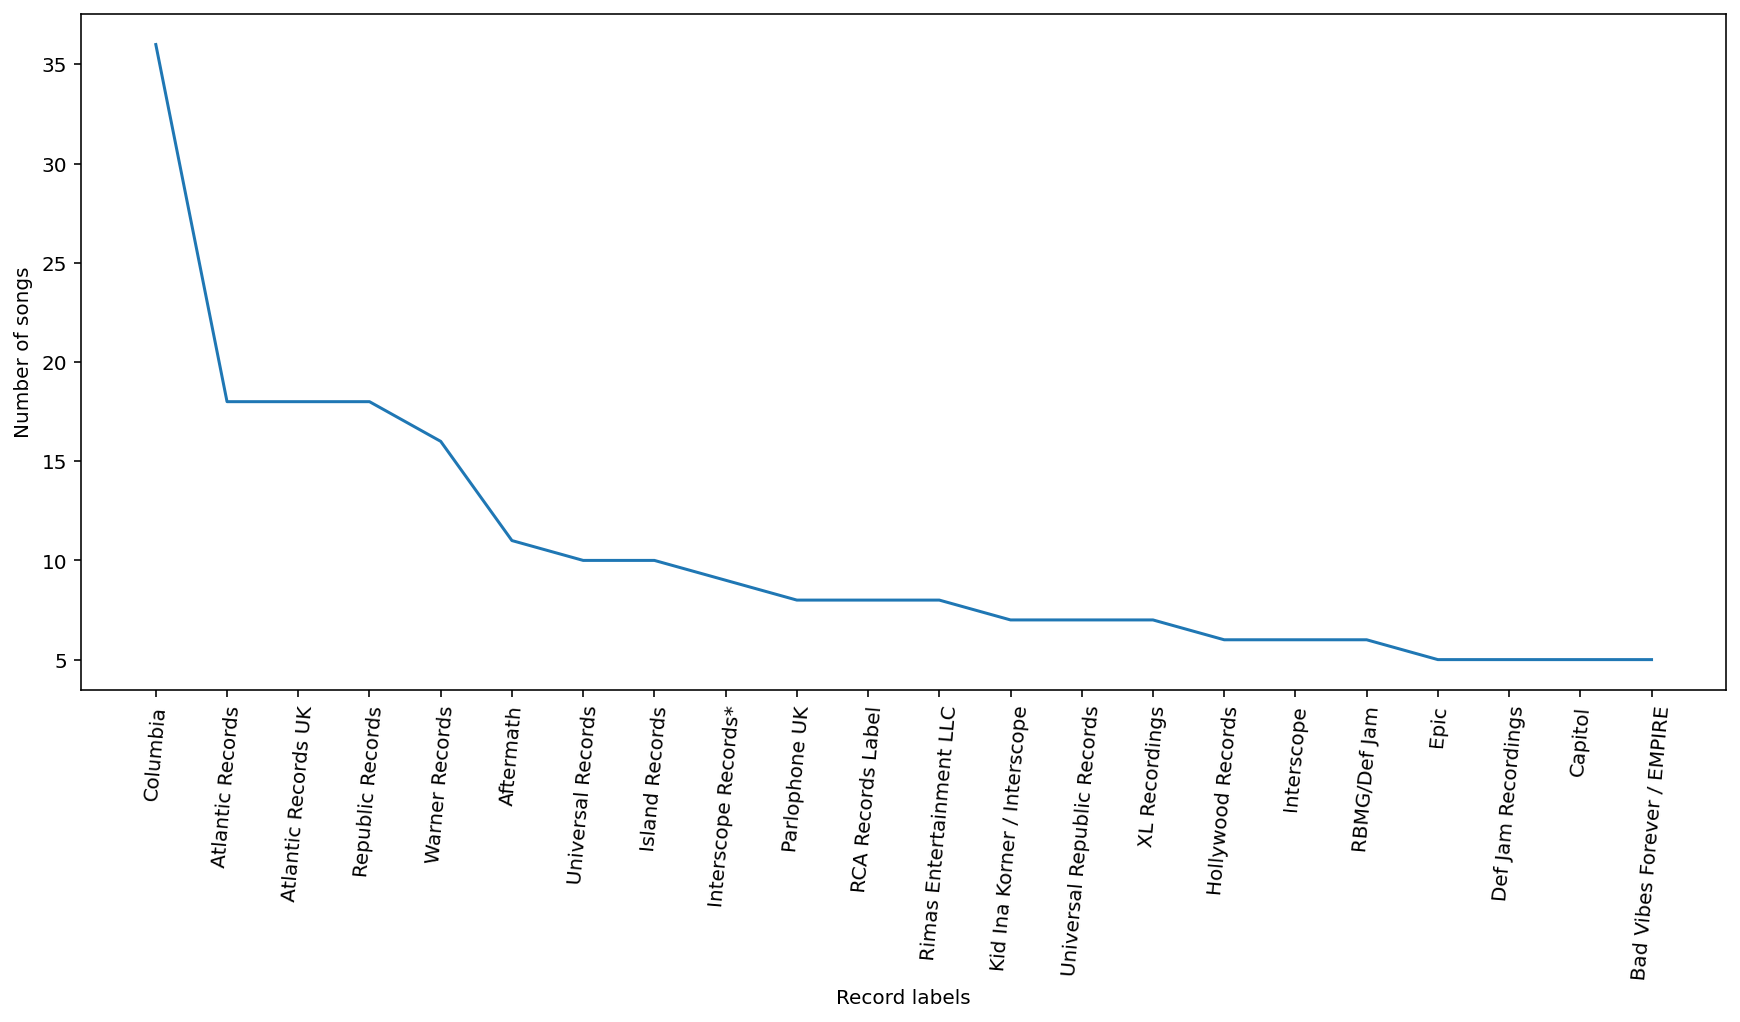

In [41]:
albums_df = albums_df.rename(columns = {'id' : 'album_id'})
songs_plus_albums = df.merge(albums_df, how='left', on='album_id')
labels_occ = songs_plus_albums.groupby('label').count().reset_index()
labels_occ = labels_occ[['label', 'added_at']]
labels_occ = labels_occ.rename(columns = {'added_at' : 'occurrences'})
labels_occ_more_than_5 = labels_occ[labels_occ['occurrences'] >= 5].reset_index().sort_values('occurrences', ascending=False)

plt.plot(labels_occ_more_than_5['label'], labels_occ_more_than_5['occurrences'])
plt.xticks(rotation=85)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.xlabel('Record labels')
plt.ylabel('Number of songs')
plt.savefig('RecordLabels.png')
plt.show()

Box plots for all of the data


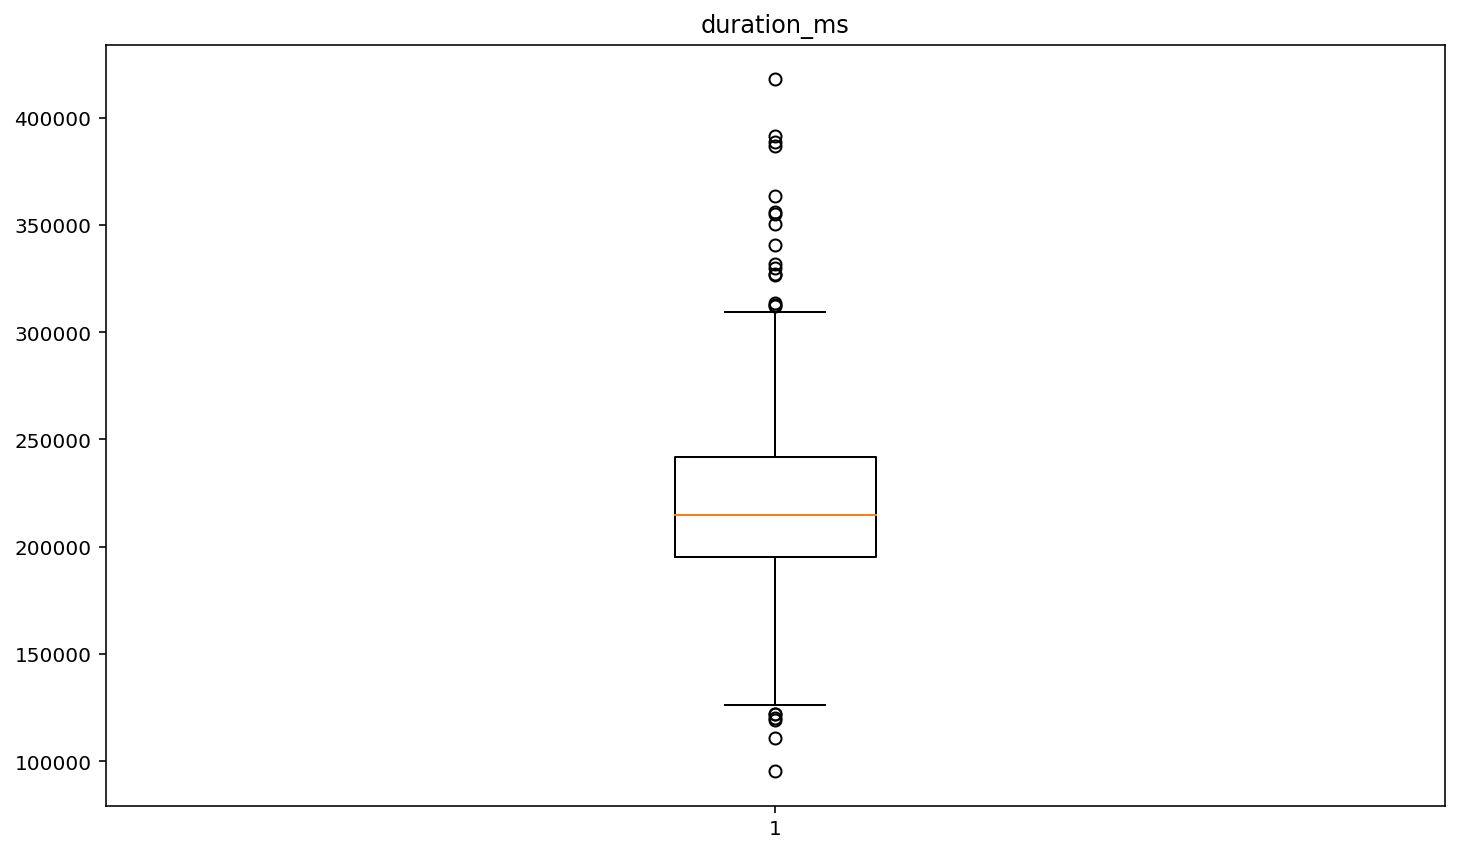

count       509.000000
mean     219344.306483
std       44098.259737
min       95466.000000
25%      195373.000000
50%      214653.000000
75%      241693.000000
max      417920.000000
Name: duration_ms, dtype: float64
3 Smallest Values:
95466,Everybody Dies In Their Nightmares, by: XXXTENTACION
110886,Hope, by: XXXTENTACION
119133,Jocelyn Flores, by: XXXTENTACION

3 Largest Values:
417920,Te Boté - Remix, by: Nio Garcia, Casper Magico, Bad Bunny, Darell, Ozuna, Nicky Jam
391376,Hotel California - 2013 Remaster, by: Eagles
388733,Nothing Else Matters (Remastered), by: Metallica


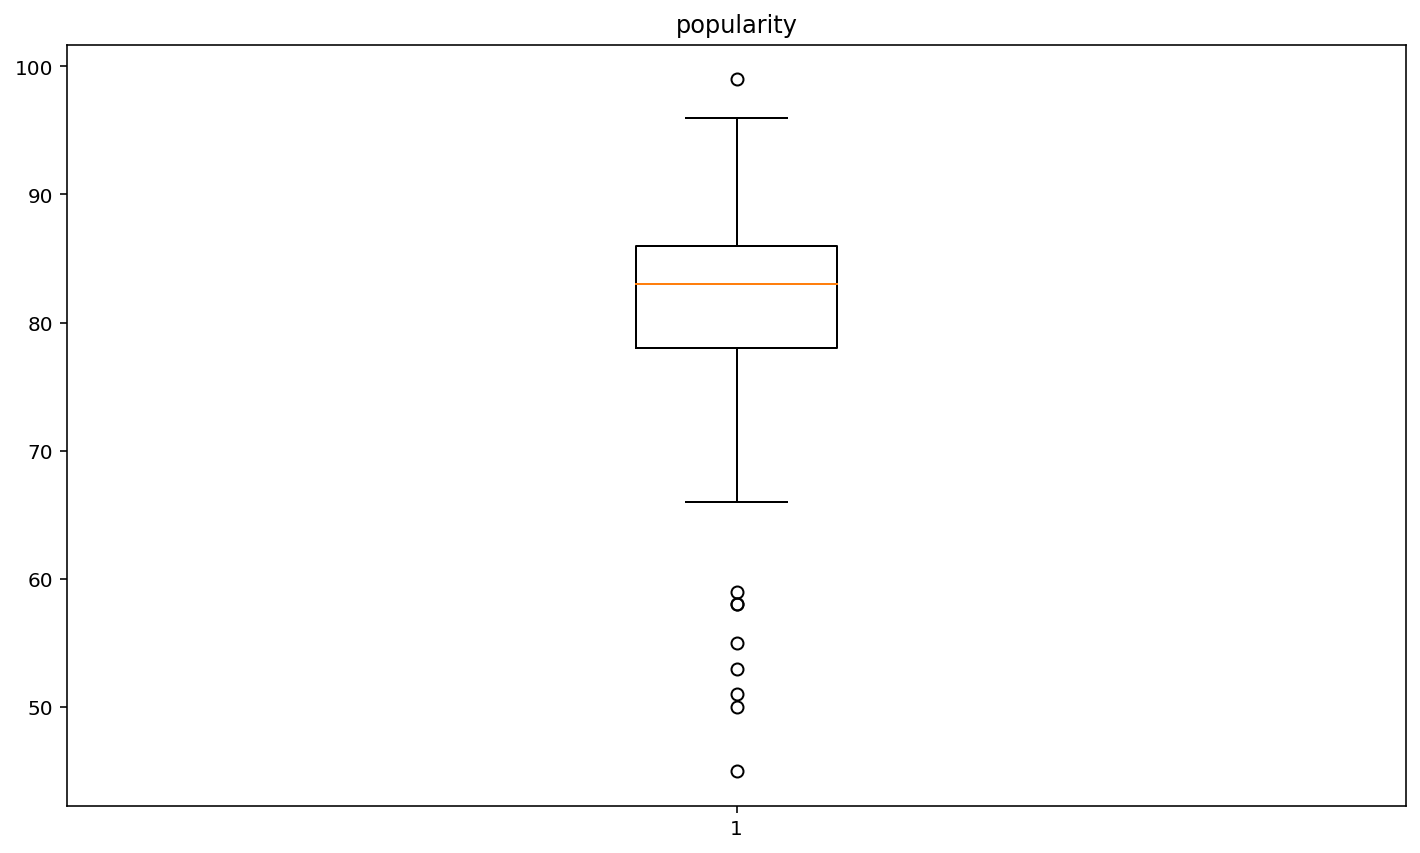

count    509.000000
mean      81.781925
std        6.635148
min       45.000000
25%       78.000000
50%       83.000000
75%       86.000000
max       99.000000
Name: popularity, dtype: float64
3 Smallest Values:
45,Bohemian Rhapsody - 2011 Remaster, by: Queen
50,Roar, by: Katy Perry
51,Bad Romance, by: Lady Gaga

3 Largest Values:
99,Cruel Summer, by: Taylor Swift
96,Seven (feat. Latto) (Explicit Ver.), by: Jung Kook, Latto
95,I Wanna Be Yours, by: Arctic Monkeys


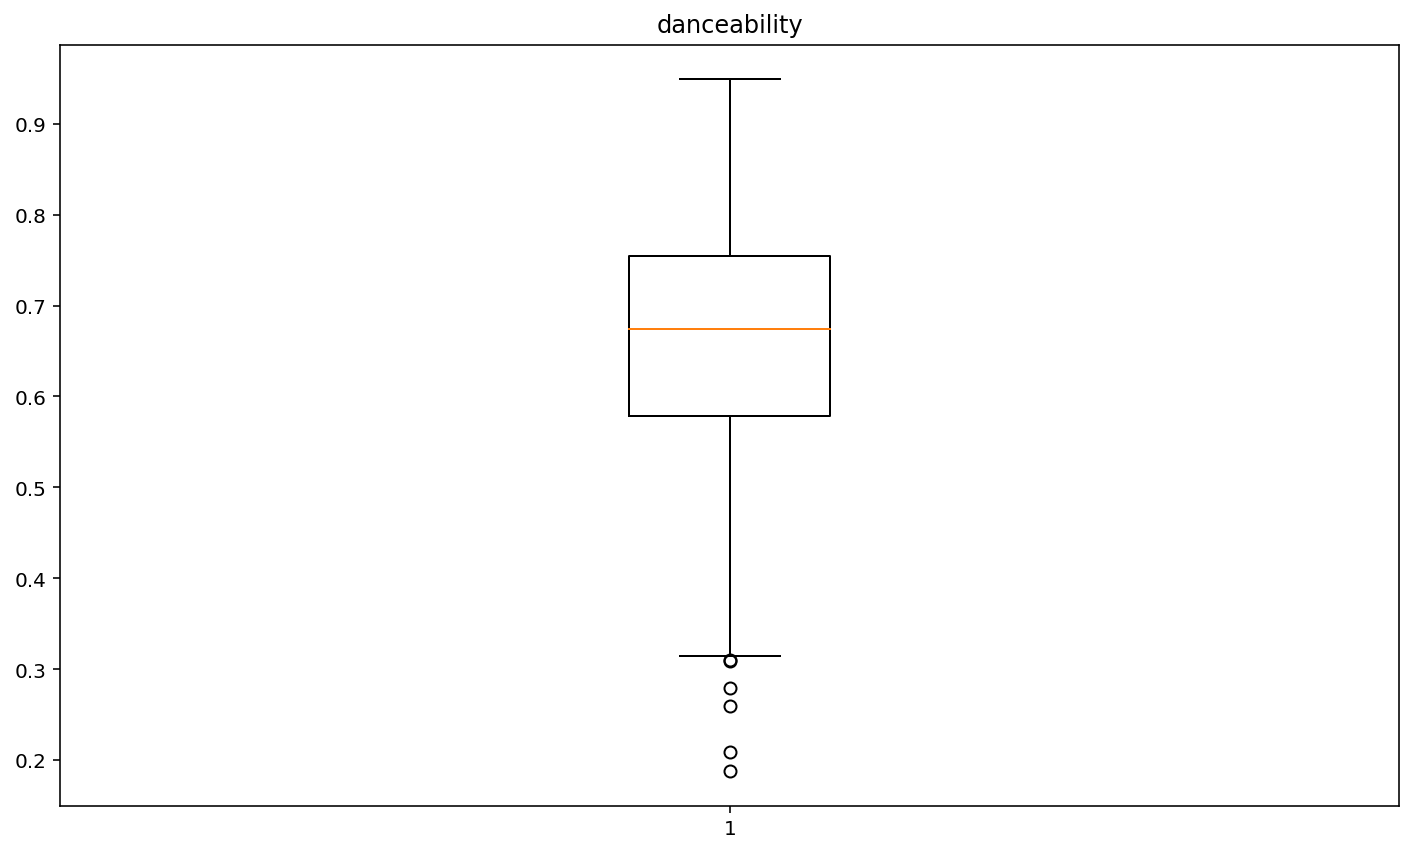

count    509.000000
mean       0.659949
std        0.137371
min        0.188000
25%        0.578000
50%        0.674000
75%        0.755000
max        0.949000
Name: danceability, dtype: float64
3 Smallest Values:
0.188,All I Want, by: Kodaline
0.209,Fix You, by: Coldplay
0.259,Dusk Till Dawn (feat. Sia) - Radio Edit, by: ZAYN, Sia

3 Largest Values:
0.9490000000000001,The Real Slim Shady, by: Eminem
0.935,WAP (feat. Megan Thee Stallion), by: Cardi B, Megan Thee Stallion
0.933,Another One Bites The Dust - Remastered 2011, by: Queen


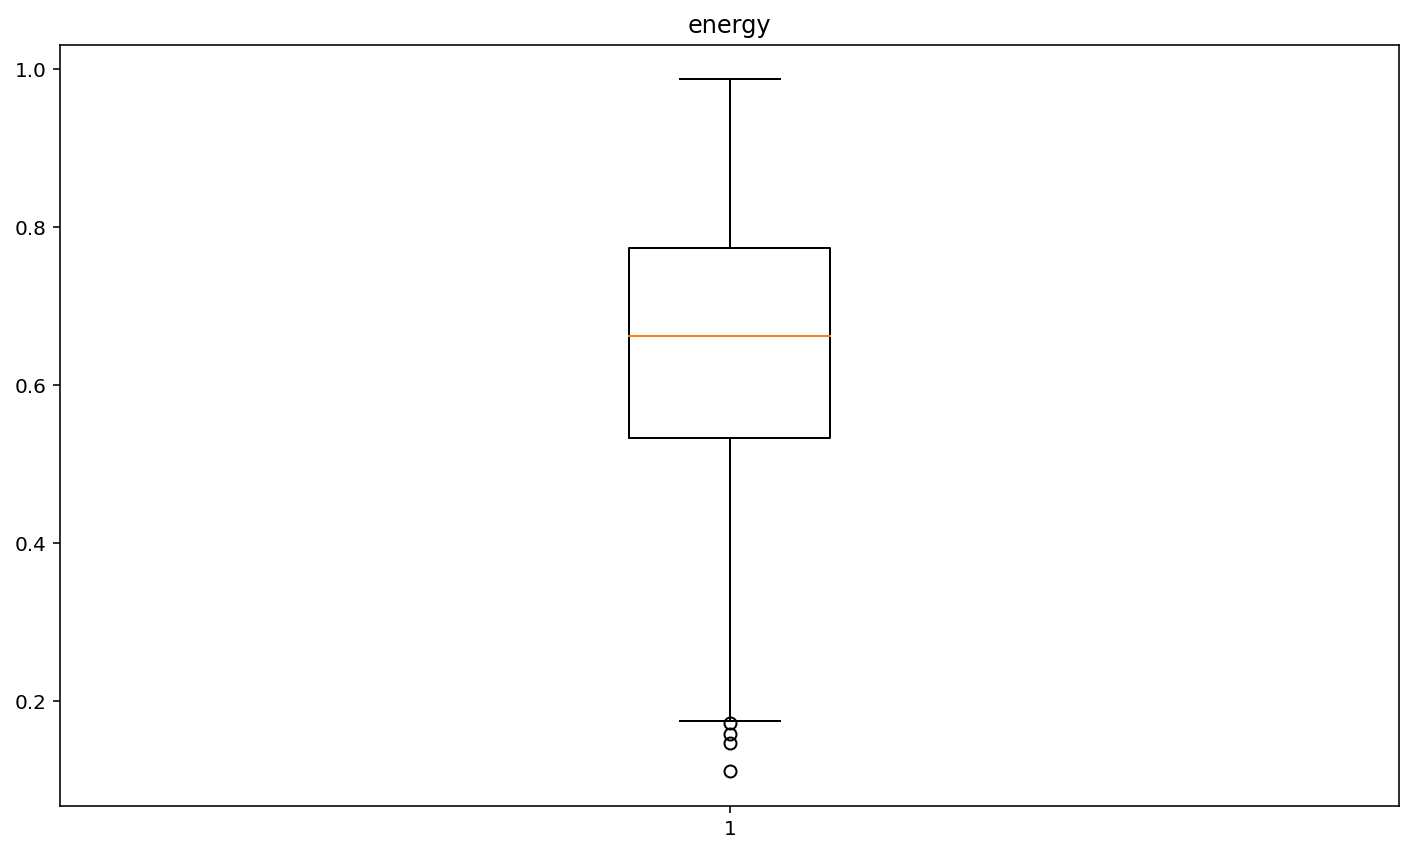

count    509.000000
mean       0.641959
std        0.169304
min        0.111000
25%        0.533000
50%        0.662000
75%        0.773000
max        0.987000
Name: energy, dtype: float64
3 Smallest Values:
0.111,when the party's over, by: Billie Eilish
0.147,Say Something, by: A Great Big World, Christina Aguilera
0.158,White Christmas - 1947 Version, by: Bing Crosby, Ken Darby Singers, John Scott Trotter & His Orchestra

3 Largest Values:
0.987,Welcome To The Jungle, by: Guns N' Roses
0.974,Hey Ya!, by: Outkast
0.97,Promiscuous, by: Nelly Furtado, Timbaland


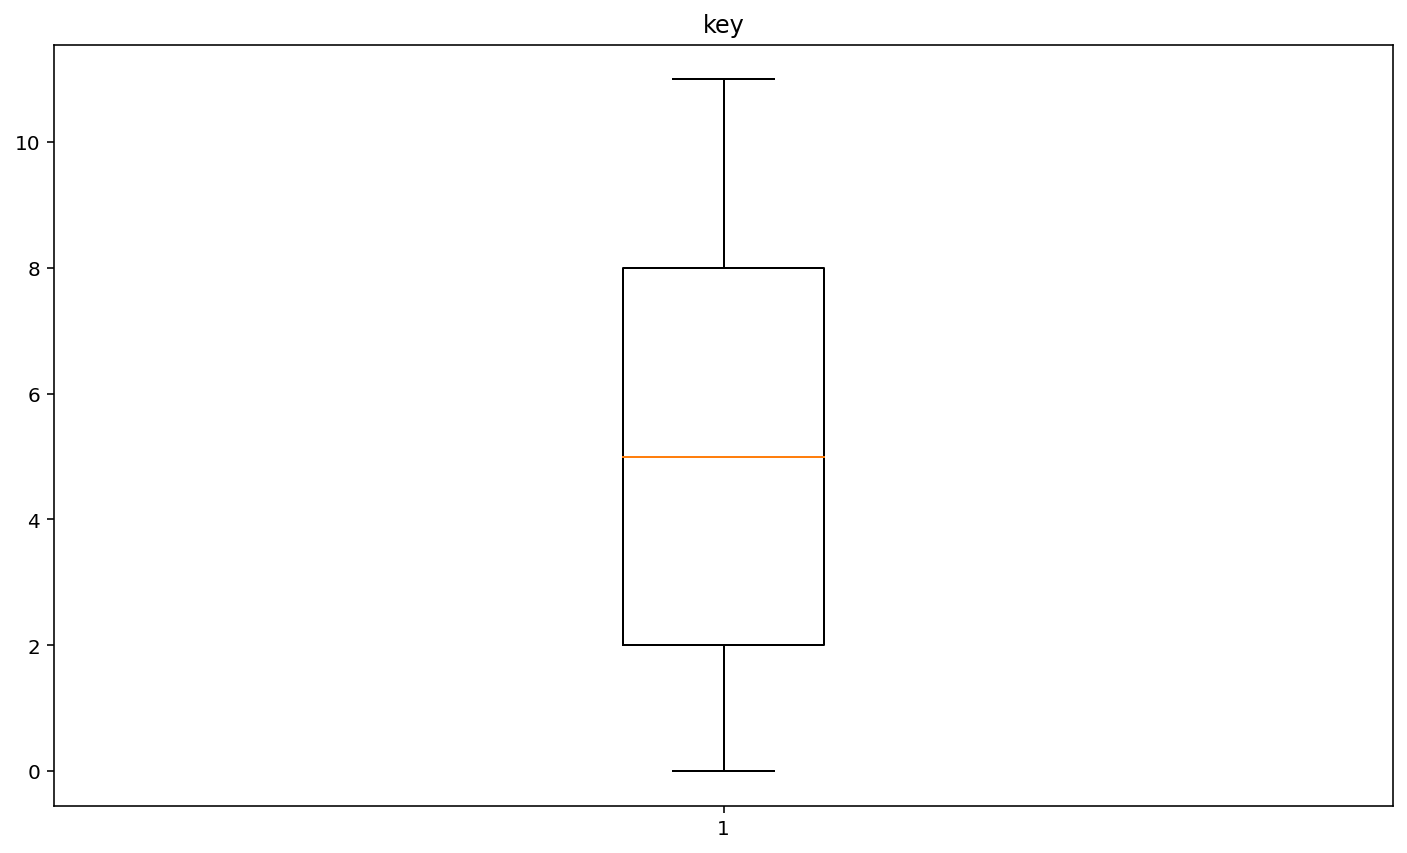

count    509.000000
mean       5.267191
std        3.632113
min        0.000000
25%        2.000000
50%        5.000000
75%        8.000000
max       11.000000
Name: key, dtype: float64
3 Smallest Values:
0,Girls Like You (feat. Cardi B) - Cardi B Version, by: Maroon 5, Cardi B
0,I Wanna Be Yours, by: Arctic Monkeys
0,Flowers, by: Miley Cyrus

3 Largest Values:
11,Diamonds, by: Rihanna
11,Seven (feat. Latto) (Explicit Ver.), by: Jung Kook, Latto
11,Yellow, by: Coldplay


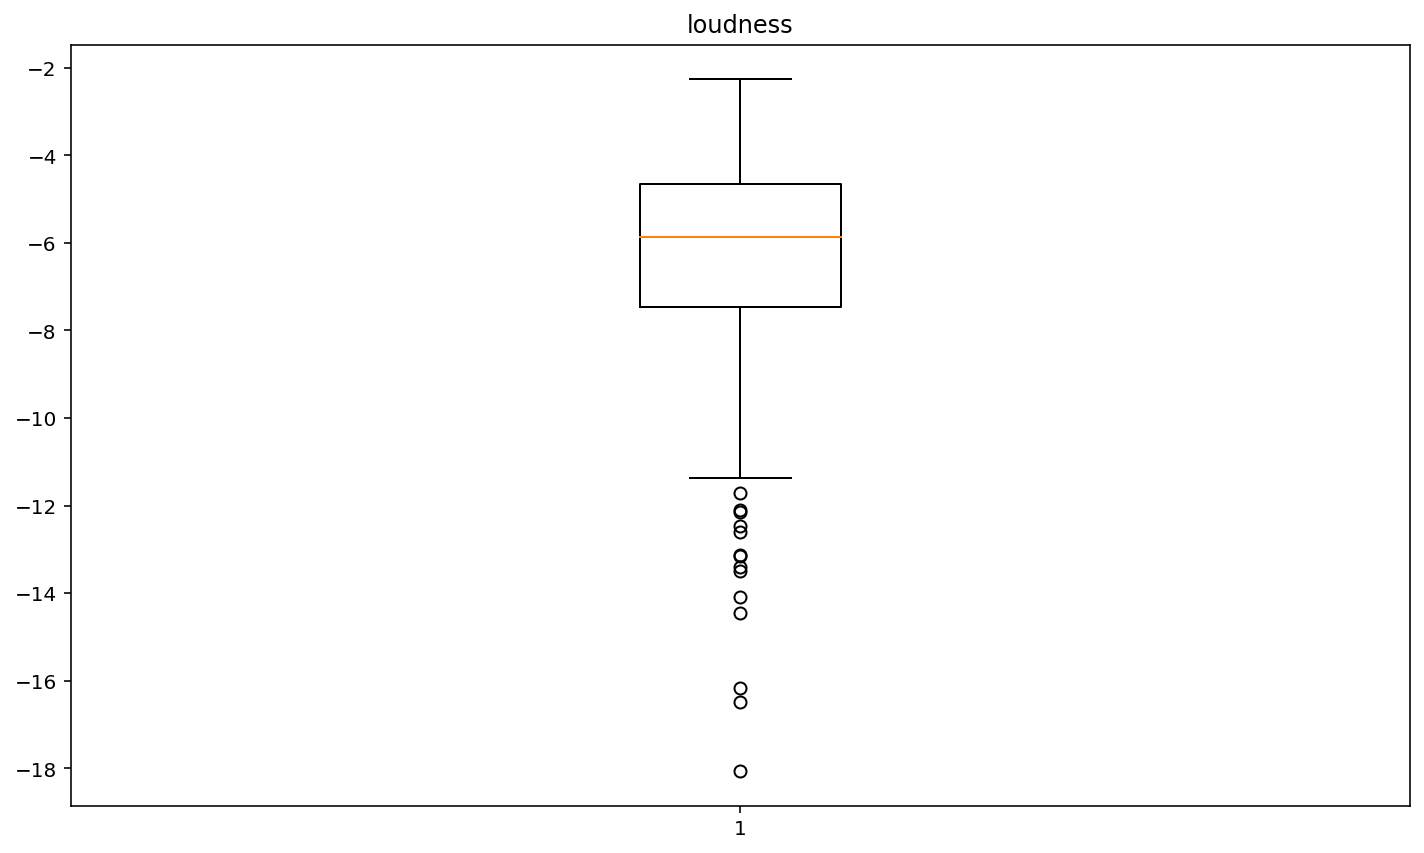

count    509.000000
mean      -6.282906
std        2.319390
min      -18.064000
25%       -7.463000
50%       -5.866000
75%       -4.662000
max       -2.261000
Name: loudness, dtype: float64
3 Smallest Values:
-18.064,Africa, by: TOTO
-16.485,White Christmas - 1947 Version, by: Bing Crosby, Ken Darby Singers, John Scott Trotter & His Orchestra
-16.169,Revenge, by: XXXTENTACION

3 Largest Values:
-2.261,Hey Ya!, by: Outkast
-2.384,FRIENDS, by: Marshmello, Anne-Marie
-2.4939999999999998,What Makes You Beautiful, by: One Direction


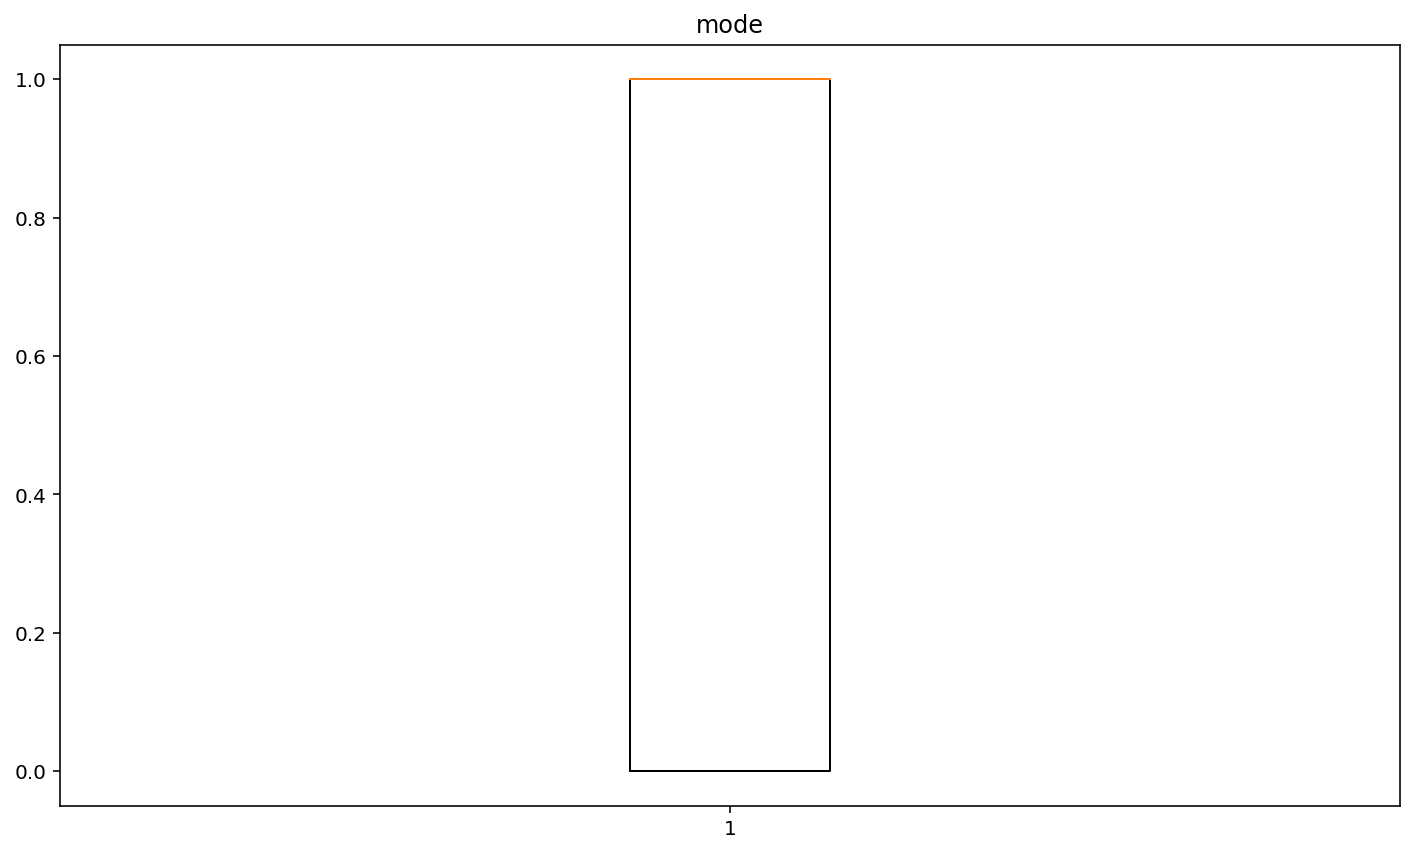

count    509.000000
mean       0.593320
std        0.491697
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: mode, dtype: float64
3 Smallest Values:
0,Side To Side, by: Ariana Grande, Nicki Minaj
0,Stay, by: Rihanna, Mikky Ekko
0,What Lovers Do (feat. SZA), by: Maroon 5, SZA

3 Largest Values:
1,Payphone, by: Maroon 5, Wiz Khalifa
1,Into You, by: Ariana Grande
1,Girls Like You (feat. Cardi B) - Cardi B Version, by: Maroon 5, Cardi B


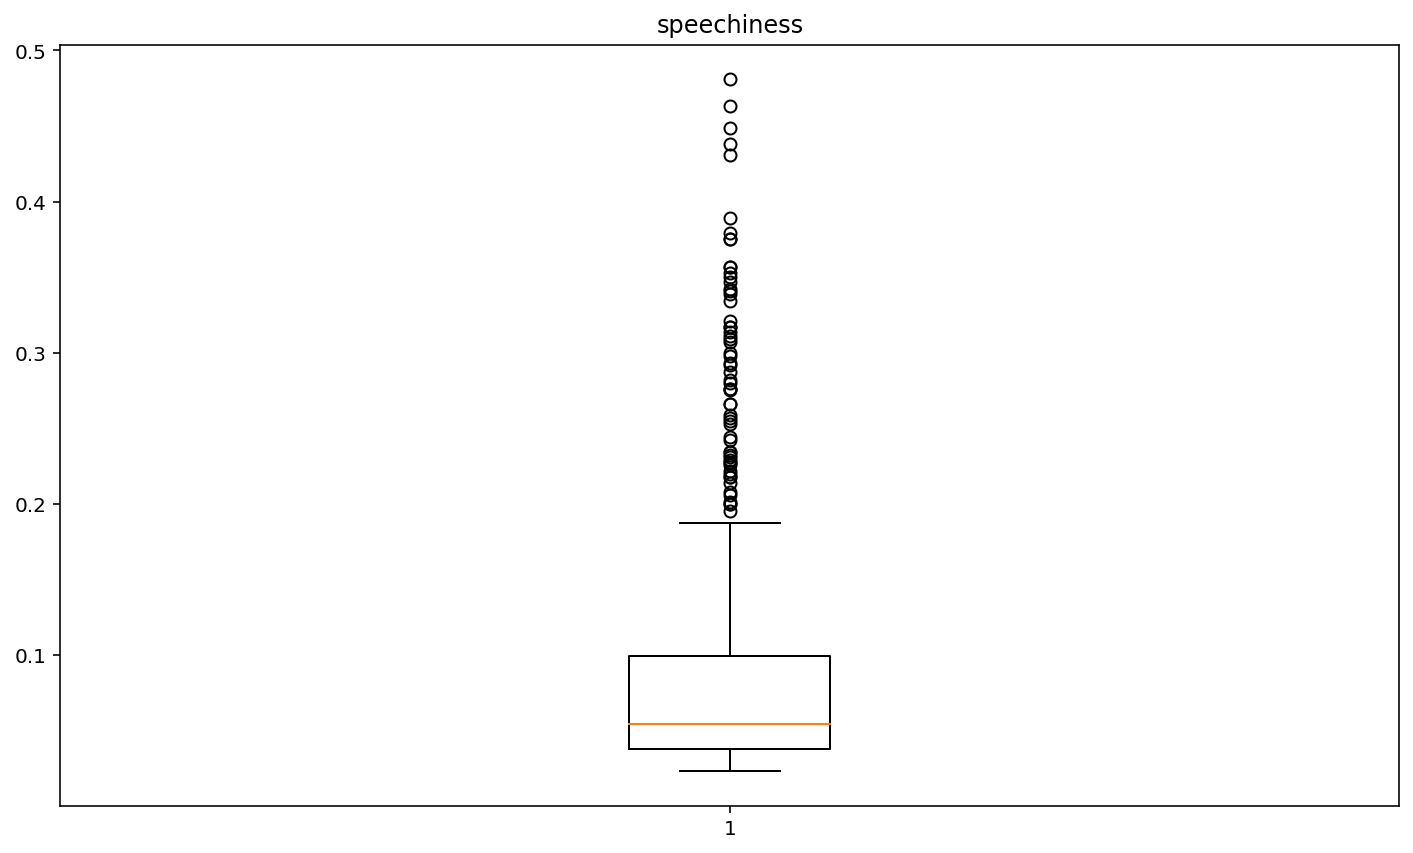

count    509.000000
mean       0.089898
std        0.086010
min        0.023200
25%        0.037700
50%        0.054200
75%        0.099300
max        0.481000
Name: speechiness, dtype: float64
3 Smallest Values:
0.023200000000000002,Perfect, by: Ed Sheeran
0.024300000000000002,The Scientist, by: Coldplay
0.024900000000000002,Set Fire to the Rain, by: Adele

3 Largest Values:
0.481,Life Is Good (feat. Drake), by: Future, Drake
0.463,Youngblood, by: 5 Seconds of Summer
0.449,Panda, by: Desiigner


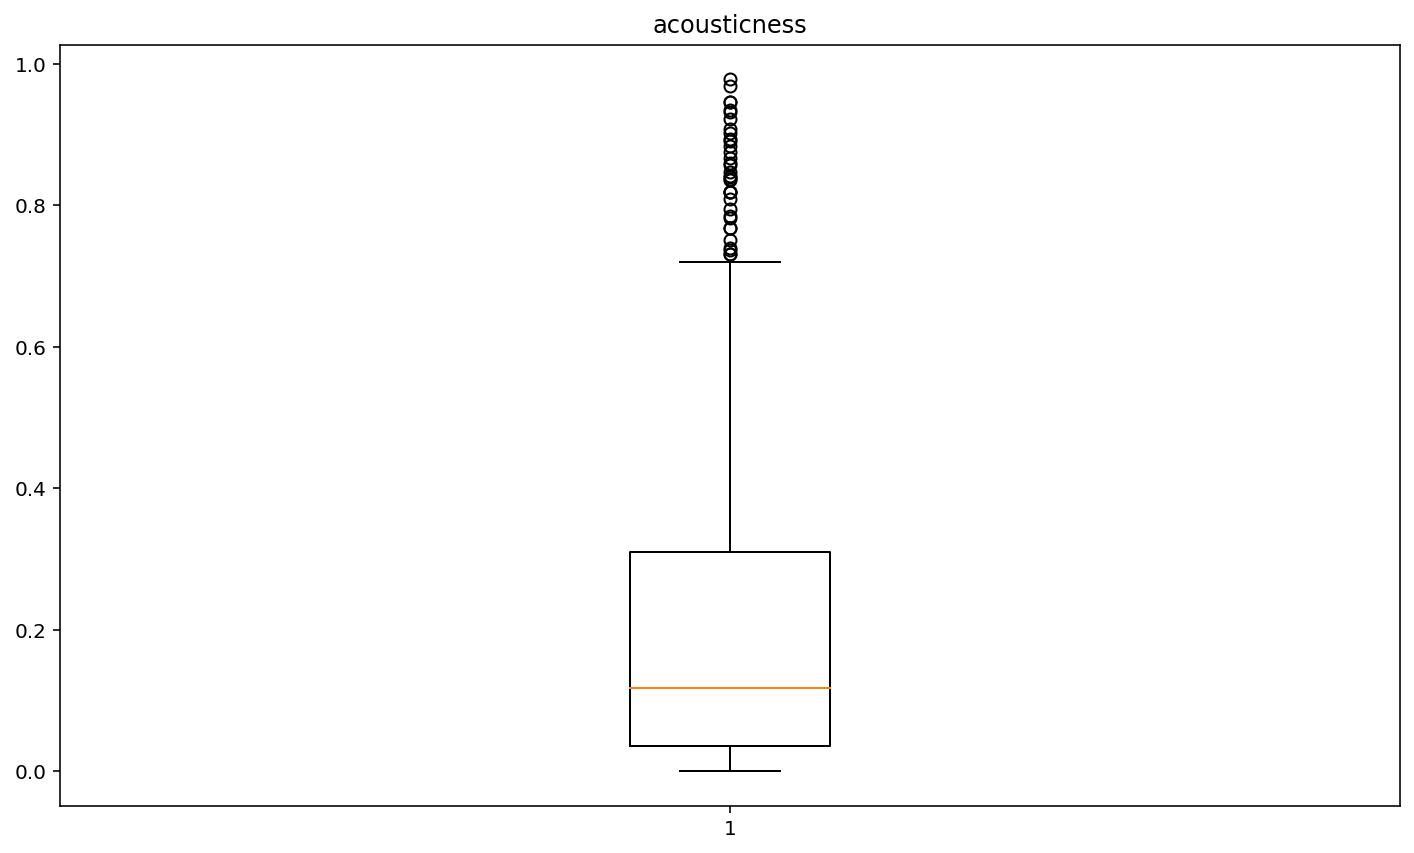

count    509.000000
mean       0.218767
std        0.246042
min        0.000025
25%        0.035400
50%        0.117000
75%        0.310000
max        0.978000
Name: acousticness, dtype: float64
3 Smallest Values:
2.55e-05,Smells Like Teen Spirit, by: Nirvana
0.000147,Thunderstruck, by: AC/DC
0.00016,Come As You Are, by: Nirvana

3 Largest Values:
0.978,when the party's over, by: Billie Eilish
0.969,The Night We Met, by: Lord Huron
0.9460000000000001,Bruises, by: Lewis Capaldi


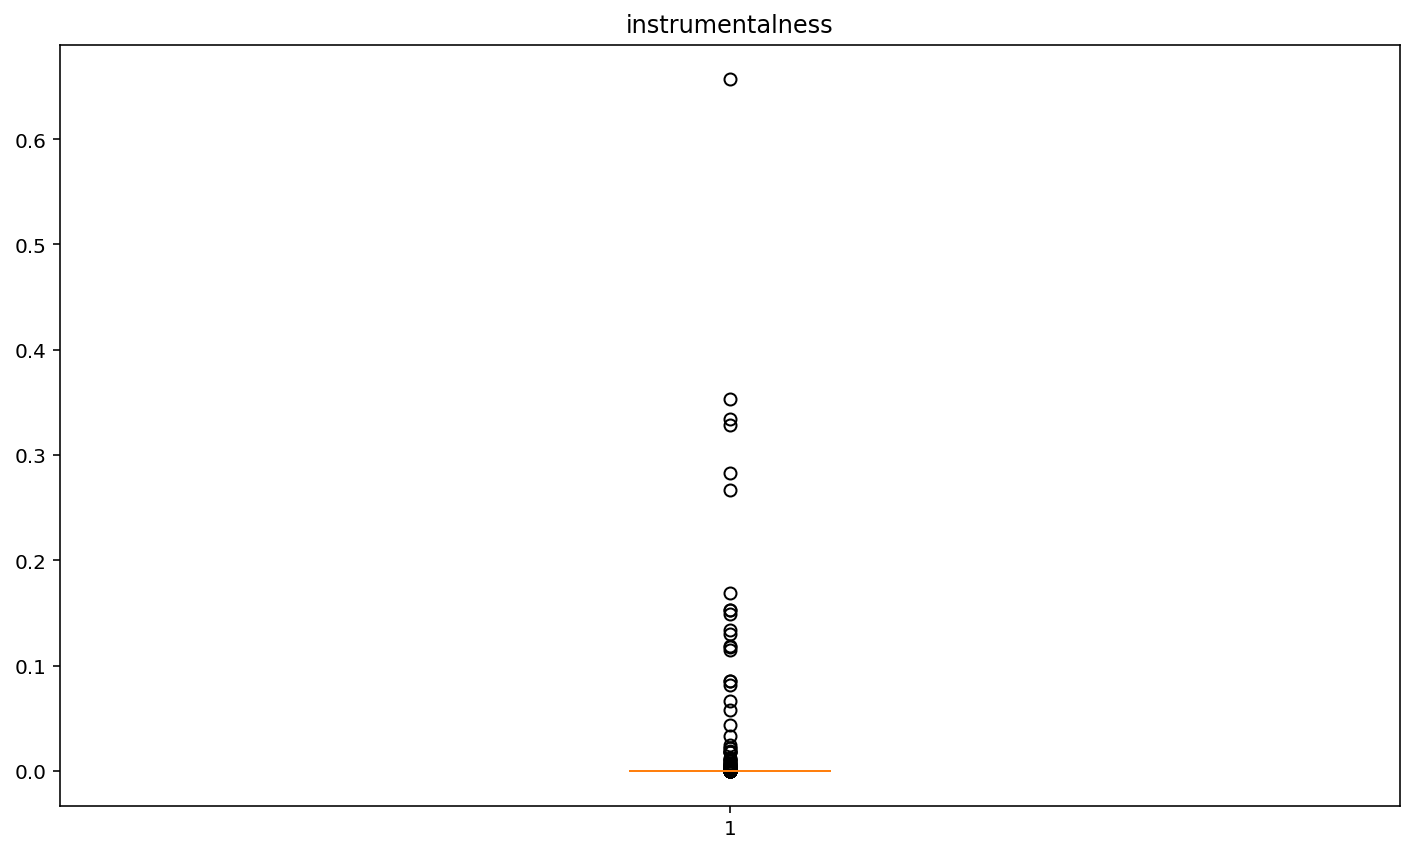

count    509.000000
mean       0.008361
std        0.046567
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000082
max        0.657000
Name: instrumentalness, dtype: float64
3 Smallest Values:
0.0,Payphone, by: Maroon 5, Wiz Khalifa
0.0,Side To Side, by: Ariana Grande, Nicki Minaj
0.0,Girls Like You (feat. Cardi B) - Cardi B Version, by: Maroon 5, Cardi B

3 Largest Values:
0.657,everything i wanted, by: Billie Eilish
0.353,White Christmas - 1947 Version, by: Bing Crosby, Ken Darby Singers, John Scott Trotter & His Orchestra
0.334,Better, by: Khalid


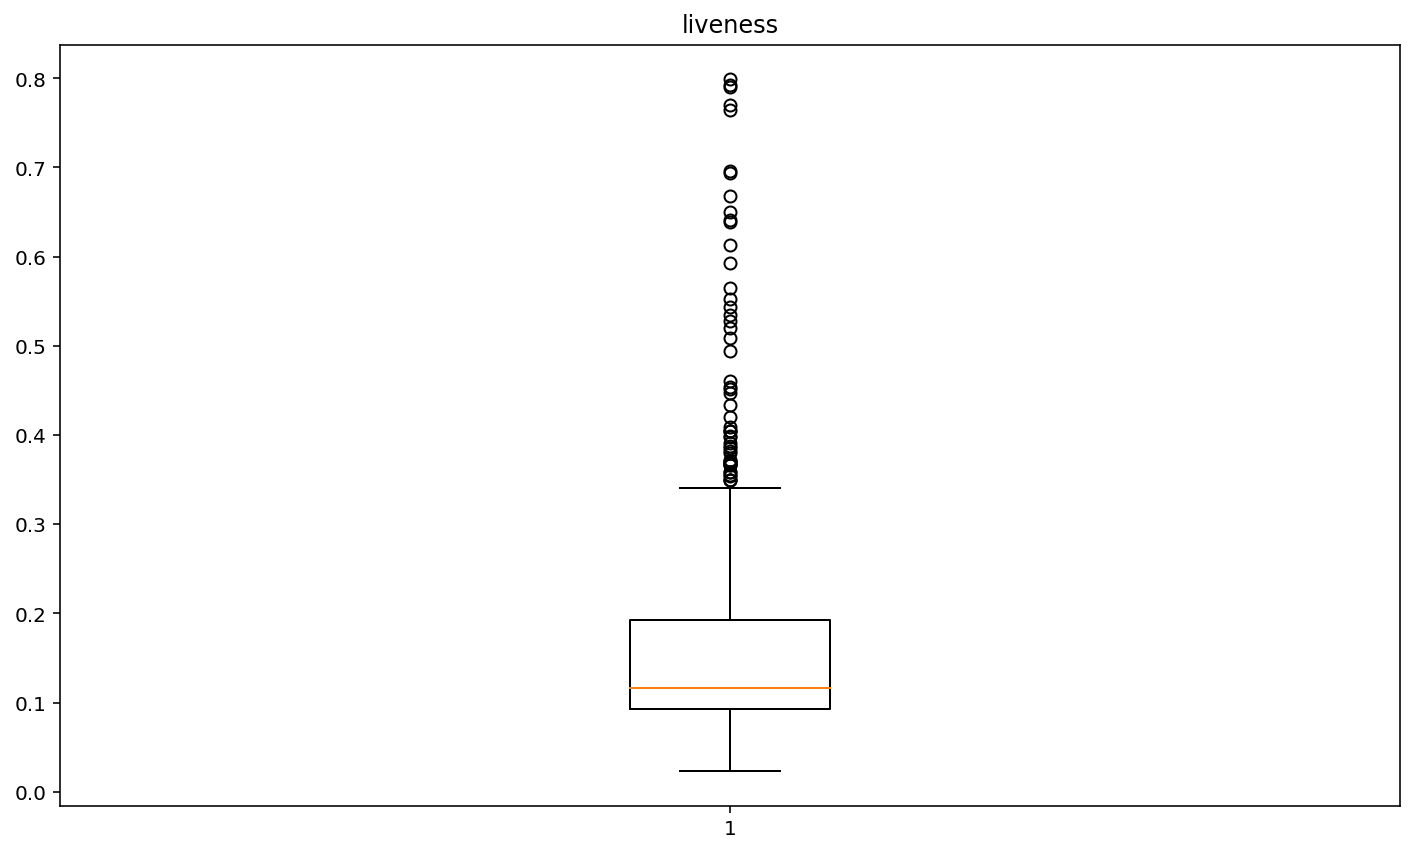

count    509.000000
mean       0.169004
std        0.133198
min        0.023200
25%        0.092700
50%        0.116000
75%        0.193000
max        0.799000
Name: liveness, dtype: float64
3 Smallest Values:
0.023200000000000002,Flowers, by: Miley Cyrus
0.0344,Uptown Funk (feat. Bruno Mars), by: Mark Ronson, Bruno Mars
0.0371,Cake By The Ocean, by: DNCE

3 Largest Values:
0.799,Rap God, by: Eminem
0.792,Dancing Queen, by: ABBA
0.79,The Box, by: Roddy Ricch


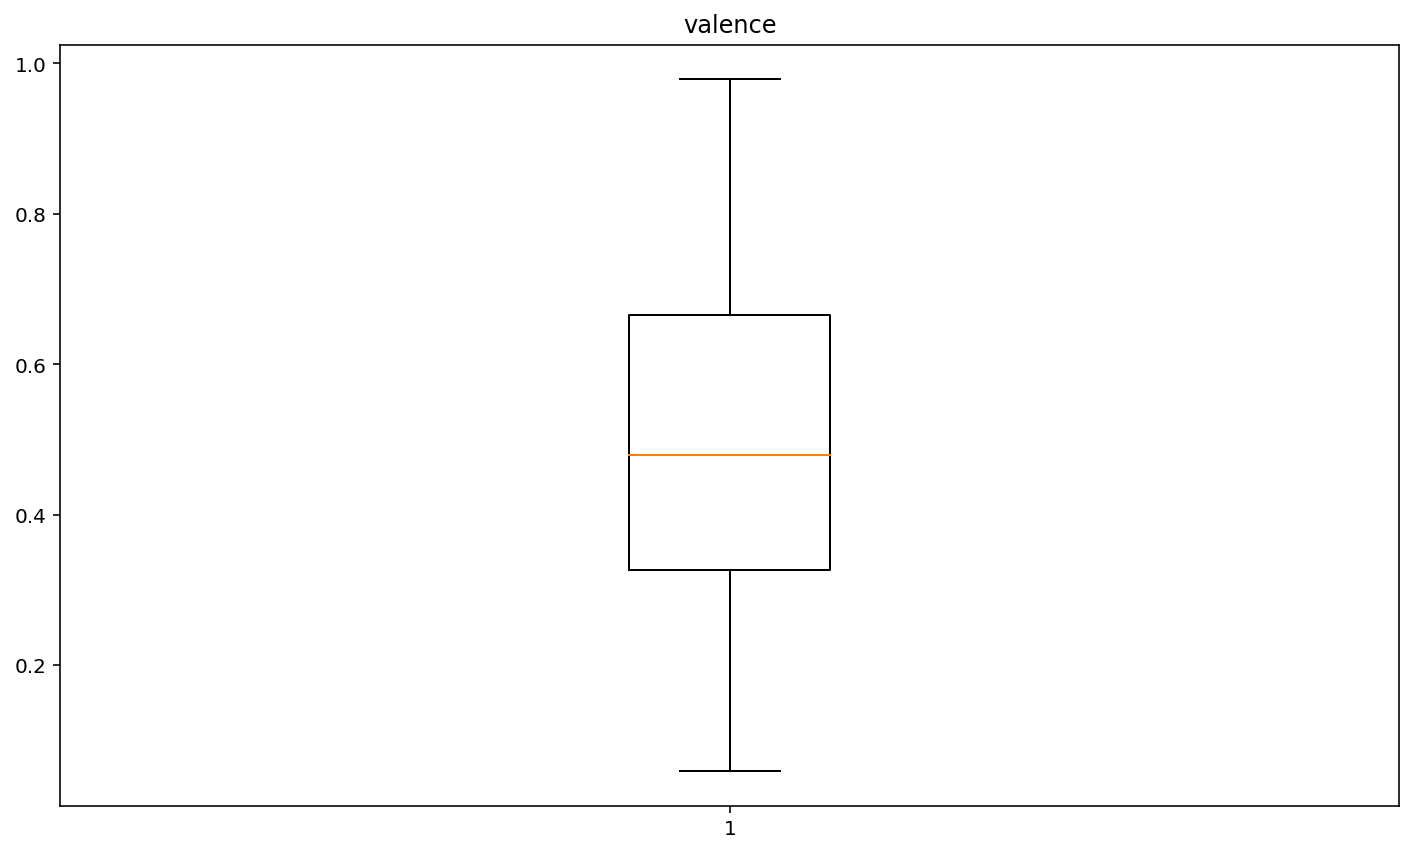

count    509.000000
mean       0.498612
std        0.226765
min        0.059200
25%        0.327000
50%        0.479000
75%        0.665000
max        0.979000
Name: valence, dtype: float64
3 Smallest Values:
0.0592,Falling, by: Harry Styles
0.060500000000000005,HIGHEST IN THE ROOM, by: Travis Scott
0.061200000000000004,Lose Yourself, by: Eminem

3 Largest Values:
0.979,September, by: Earth, Wind & Fire
0.969,There's Nothing Holdin' Me Back, by: Shawn Mendes
0.965,Pumped Up Kicks, by: Foster The People


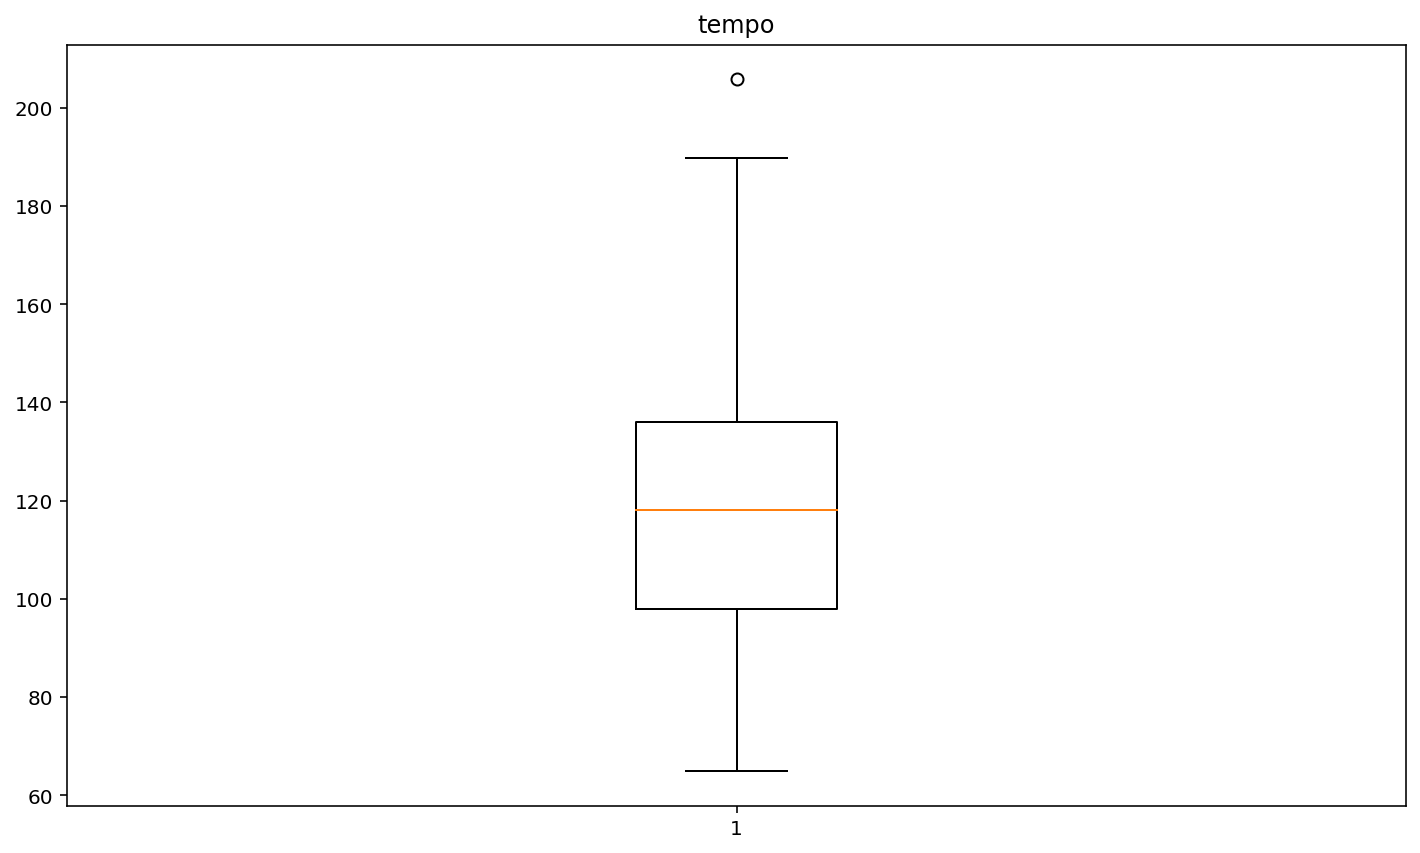

count    509.000000
mean     118.960558
std       26.905457
min       64.934000
25%       98.007000
50%      117.996000
75%      136.041000
max      205.846000
Name: tempo, dtype: float64
3 Smallest Values:
64.934,changes, by: XXXTENTACION
65.18,Make You Feel My Love, by: Adele
67.528,I Wanna Be Yours, by: Arctic Monkeys

3 Largest Values:
205.846,FourFiveSeconds, by: Rihanna, Kanye West, Paul McCartney
189.868,Animals, by: Maroon 5
188.386,Back In Black, by: AC/DC


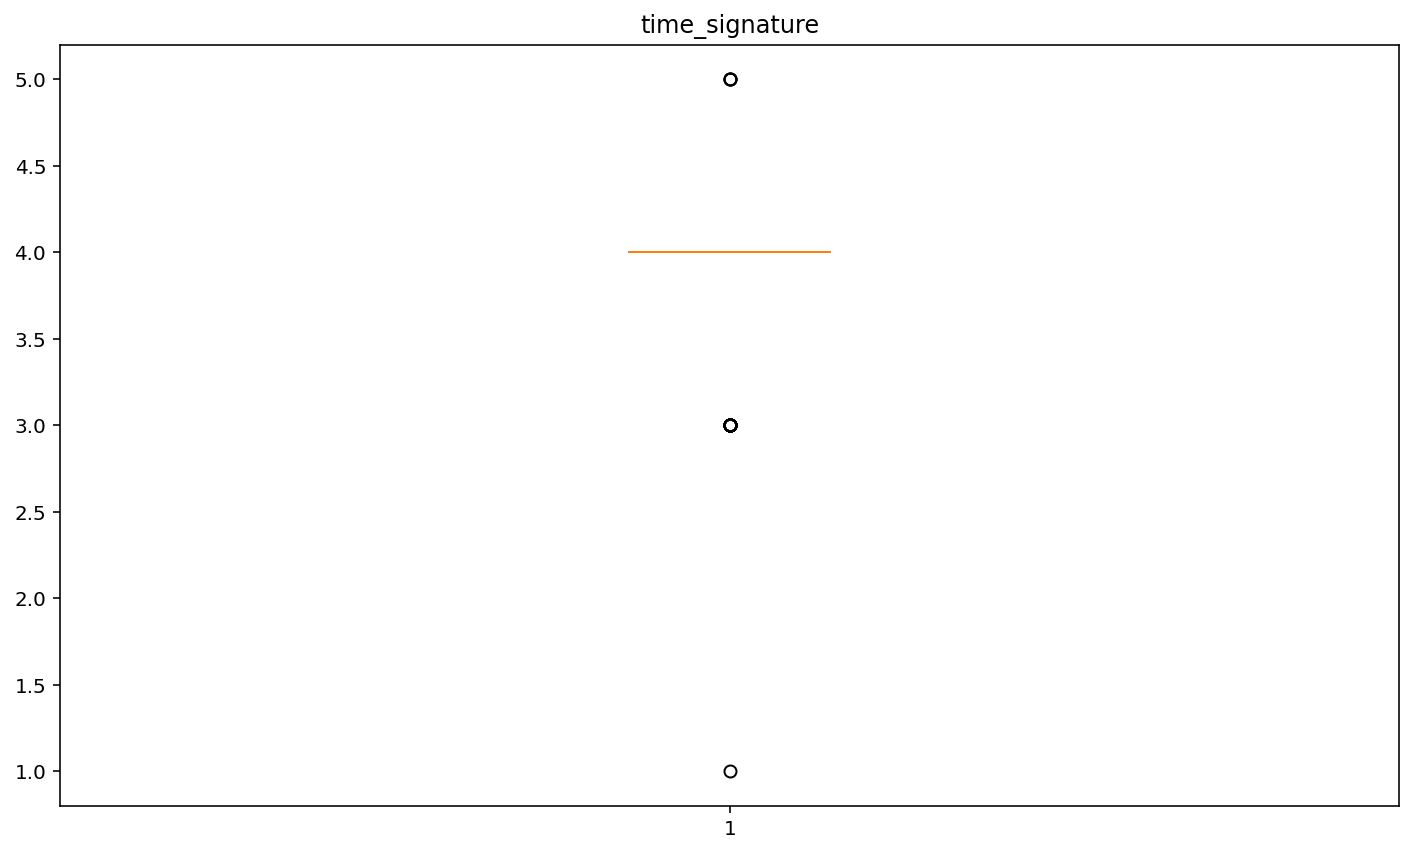

count    509.000000
mean       3.960707
std        0.247881
min        1.000000
25%        4.000000
50%        4.000000
75%        4.000000
max        5.000000
Name: time_signature, dtype: float64
3 Smallest Values:
1,hot girl bummer, by: blackbear
3,idontwannabeyouanymore, by: Billie Eilish
3,Say Something, by: A Great Big World, Christina Aguilera

3 Largest Values:
5,Chandelier, by: Sia
5,ROXANNE, by: Arizona Zervas
5,Safe And Sound, by: Capital Cities


In [42]:
import matplotlib.pyplot as plt

for col in df.columns:
    if col in numery:  
        plt.boxplot(df[col])
        plt.title(col)
        plt.show()

        description = df[col].describe()
        print(description)

        smallest_rows = df.nsmallest(3, col)

        print("3 Smallest Values:")
        for index, row in smallest_rows.iterrows():
            print(row[col], end=',')
            print(row['name'], end=', by: ')
            i = 0
            for artist in row['artists']:
                if i > 0:
                    print('', end=', ')
                i += 1
                print(artist['name'], end='')
            print()

        largest_rows = df.nlargest(3, col)

        print("\n3 Largest Values:")
        for index, row in largest_rows.iterrows():
            print(row[col], end=',')
            print(row['name'], end=', by: ')
            i = 0
            for artist in row['artists']:
                if i > 0:
                    print('', end=', ')
                i += 1
                print(artist['name'], end='')
            print()

In [43]:
##for i in range(len(numery)):
##    for j in range(i+1, len(numery)):
##        plt.plot(df[numery[i]], df[numery[j]], marker='o', linestyle='')
##        plt.xlabel(numery[i])
##        plt.ylabel(numery[j])
##        plt.show()

In [44]:
##df[['duration_ms', 'popularity', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']]

Most common words in song titles 


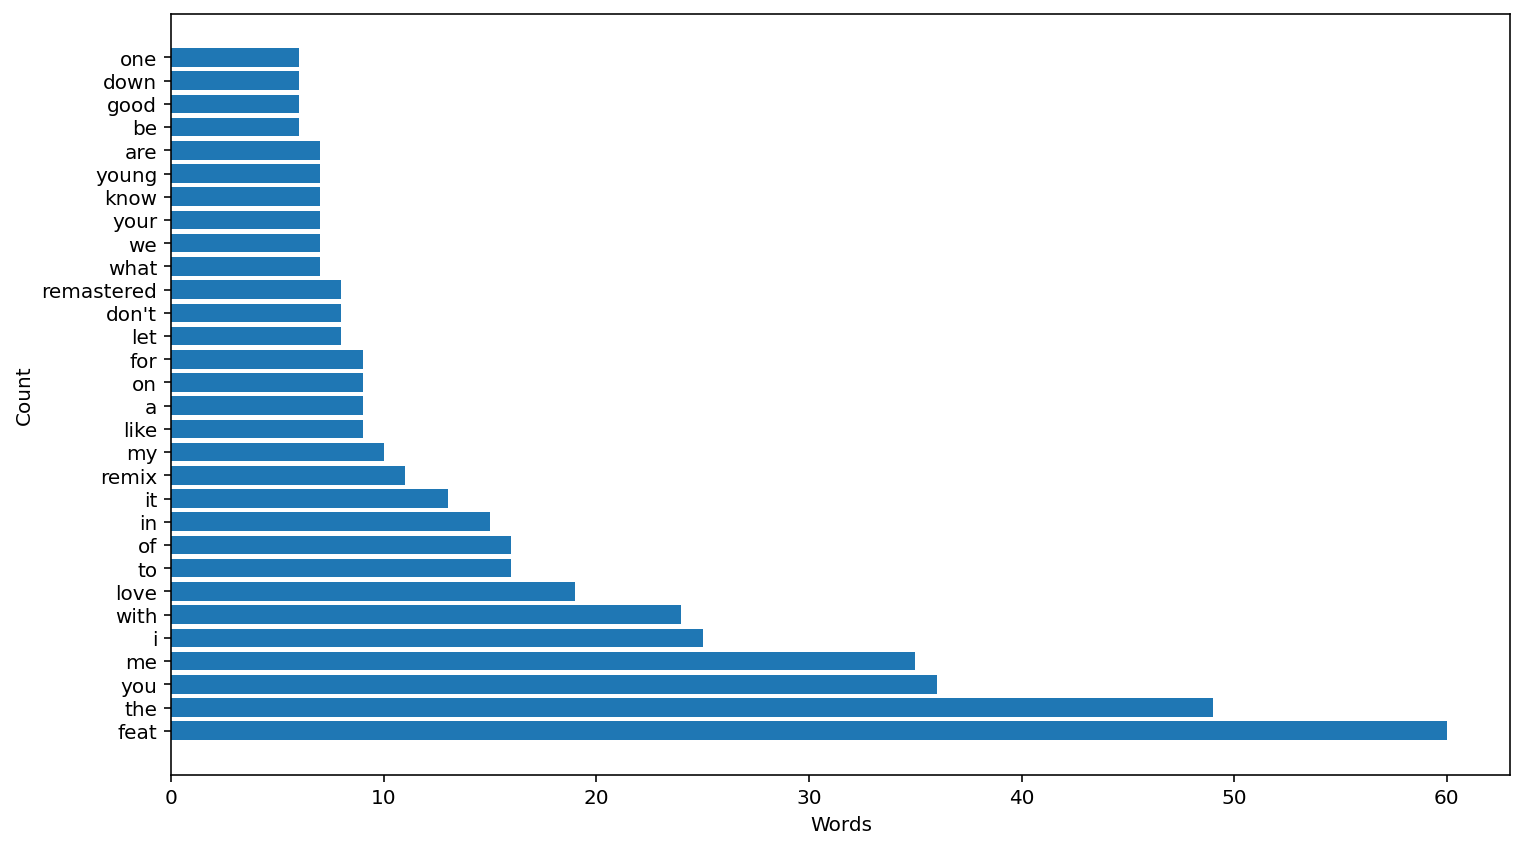

In [45]:
word_counts = Counter()

for text in df['name']:
    words = text.replace('(', '').replace(')', '').replace(',', '').replace('.', '').replace('-', '').replace('"', '').replace('?', '').replace('!', '').replace(':', '').replace('&', '').lower()
    words = words.split()
    word_counts.update(words)
top_30_words = dict(word_counts.most_common(30))
words = list(top_30_words.keys())
count = list(top_30_words.values())
plt.barh(words, count)
plt.ylabel('Count')
plt.xlabel('Words')
plt.savefig('WordsInTitles.png')
plt.show()

Differences between different seasons? 



In [46]:
df['album_release_date'] = pd.to_datetime(df['album_release_date'])

def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

df['season_release'] = df['album_release_date'].dt.month.apply(get_season)
df['season_added'] = df['added_at'].dt.month.apply(get_season)

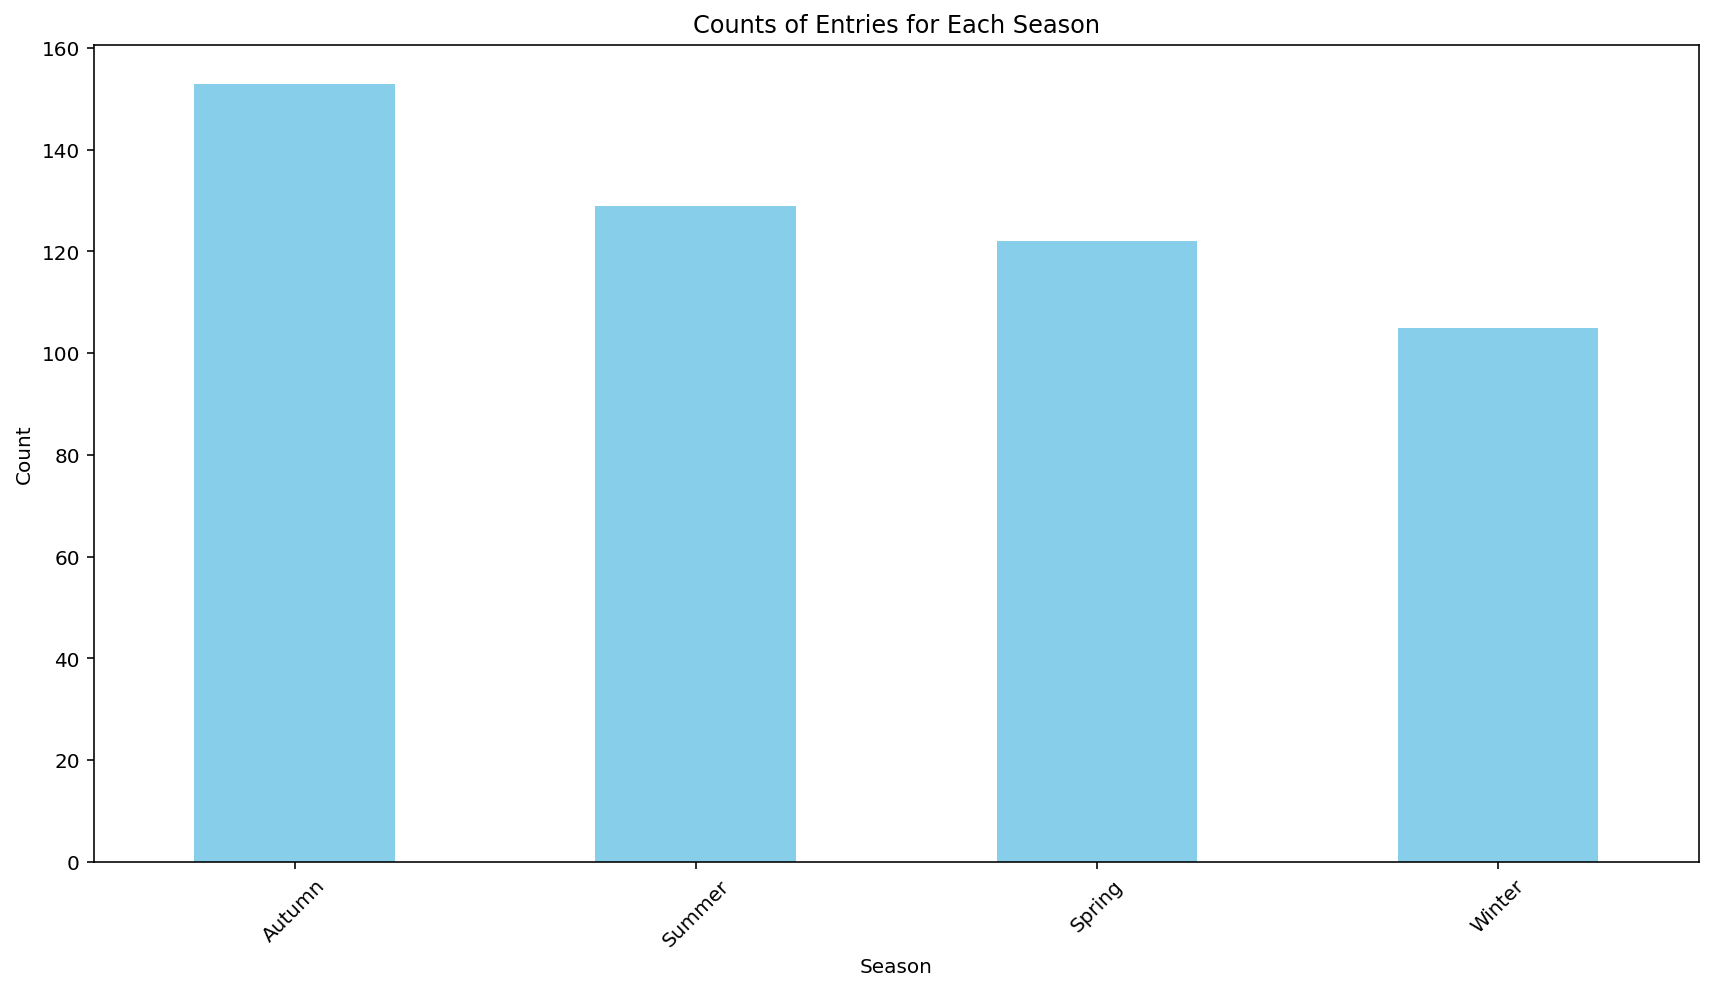

In [47]:
season_counts = df['season_release'].value_counts()
season_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Season')
plt.ylabel('Count')
plt.title('Counts of Entries for Each Season')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.savefig('ReleaseSeasons.png')
plt.show()

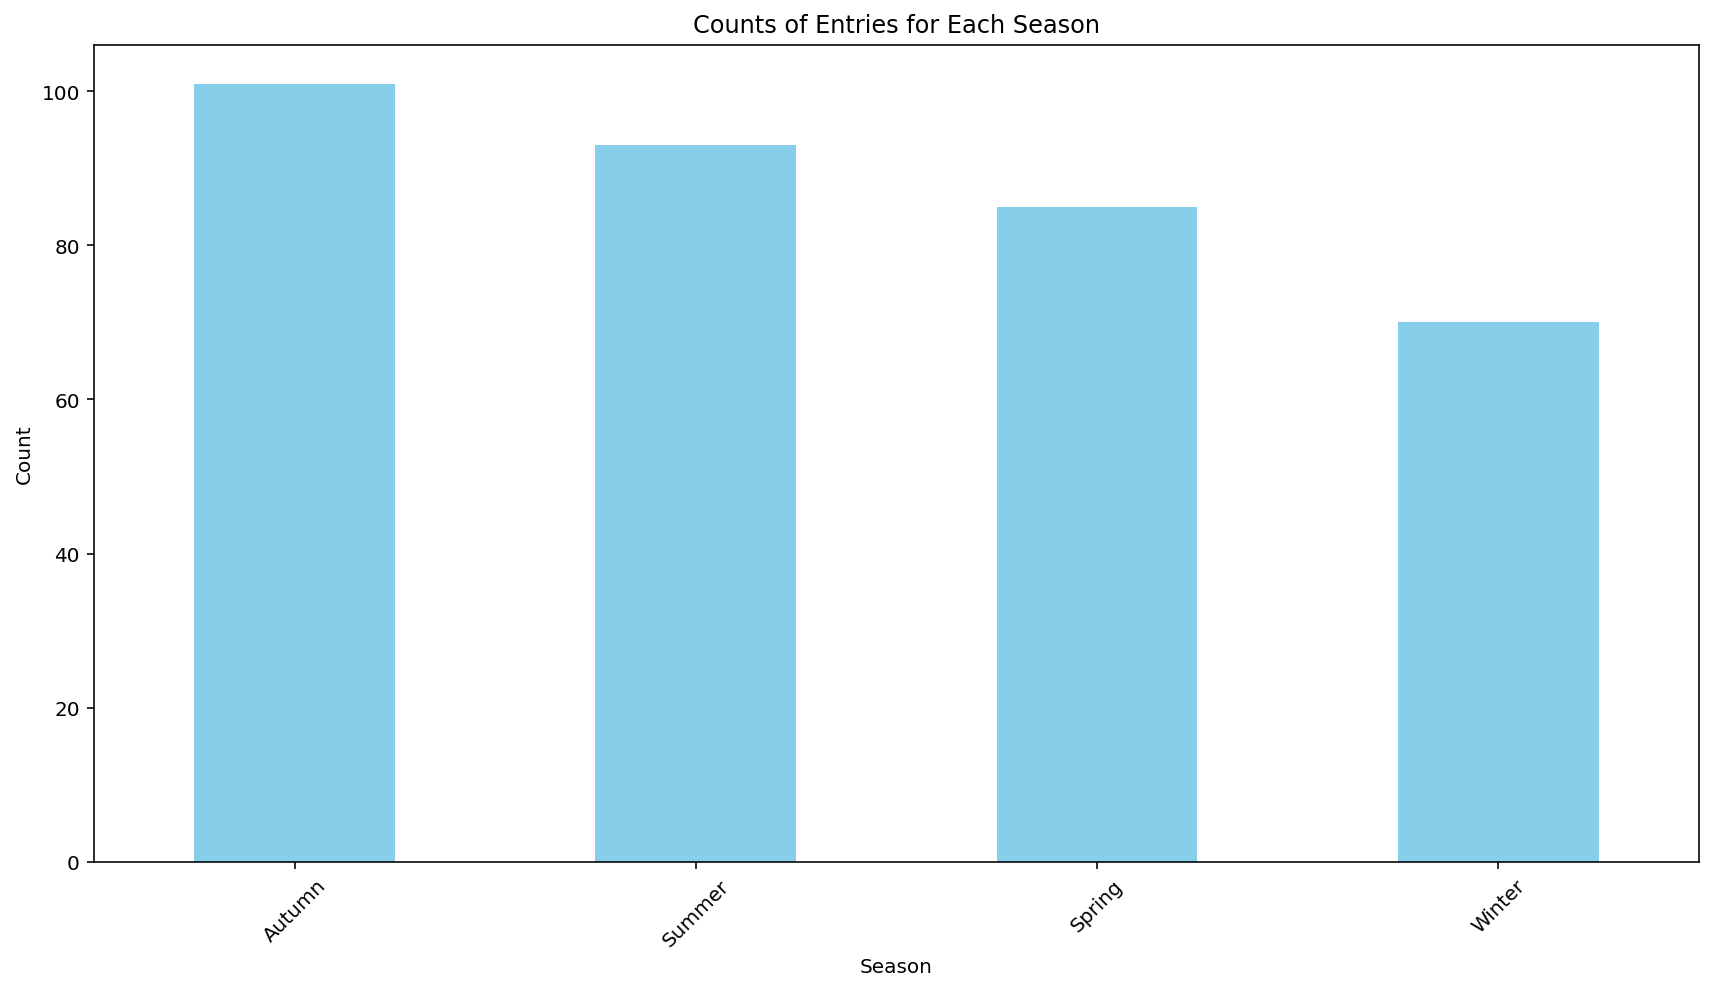

In [48]:
for_season_counts = df[df['added_at'].dt.date != pd.to_datetime('2021-07-21').date()]
season_counts = for_season_counts['season_added'].value_counts()
season_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Season')
plt.ylabel('Count')
plt.title('Counts of Entries for Each Season')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.savefig('AddedAtSeasons.png')
plt.show()

In [49]:
df['year'] = pd.to_datetime(df['album_release_date']).dt.year

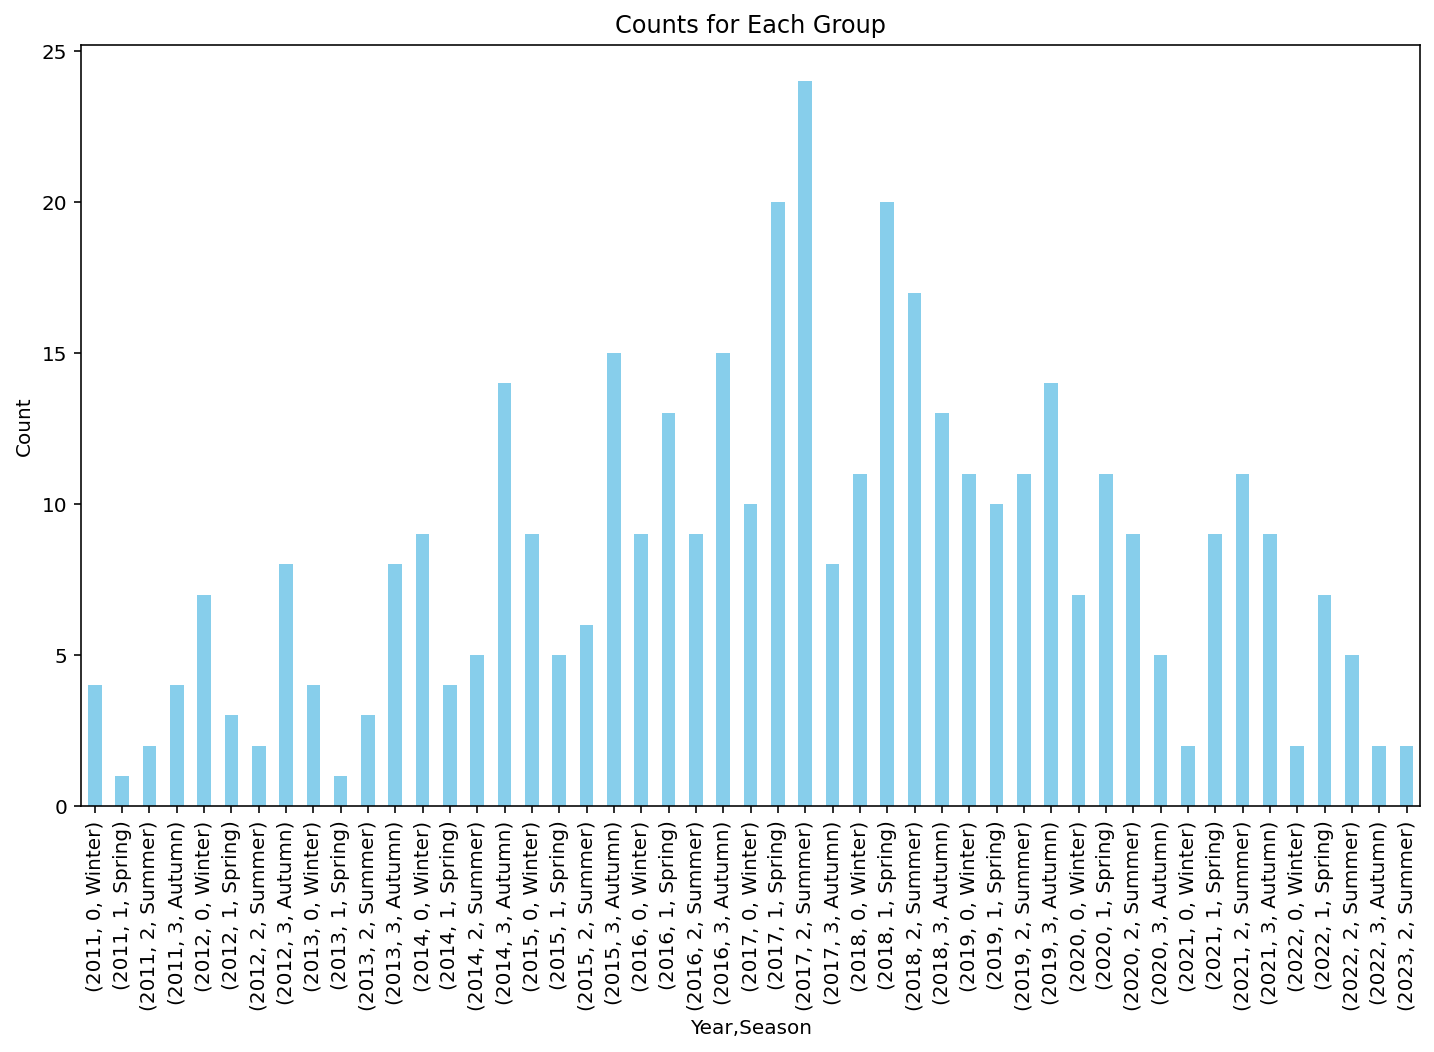

In [50]:
for_grouped = df.copy()
season_order = {'Winter': 0, 'Spring': 1, 'Summer': 2, 'Autumn': 3}
for_grouped['season_order'] = for_grouped['season_release'].map(season_order)

grouped_release = for_grouped[for_grouped['year'] > 2010].groupby(['year', 'season_order', 'season_release'])
counts = grouped_release.size()

counts.plot(kind='bar', color='skyblue')
plt.xlabel('Year,Season')
plt.ylabel('Count')
plt.title('Counts for Each Group')
plt.xticks(rotation=90)  # Rotating x-axis labels for better readability if needed
plt.tight_layout
plt.savefig('ReleaseYearsSeasons.png')
plt.show()

In [51]:
bangers_2017_summer = df[(df['year'] == 2017) & (df['season_release'] == 'Summer')]
for index, row in bangers_2017_summer.iterrows():
    print(row['name'], end = ', by: ')
    i = 0
    for artist in row['artists']:
        if i > 0:
            print('', end = ', ')
        i+=1
        print(artist['name'], end = '')
    print()

See You Again (feat. Kali Uchis), by: Tyler, The Creator, Kali Uchis
Believer, by: Imagine Dragons
Thunder, by: Imagine Dragons
Revenge, by: XXXTENTACION
Meant to Be (feat. Florida Georgia Line), by: Bebe Rexha, Florida Georgia Line
Mi Gente, by: J Balvin, Willy William
Wild Thoughts (feat. Rihanna & Bryson Tiller), by: DJ Khaled, Rihanna, Bryson Tiller
I'm the One (feat. Justin Bieber, Quavo, Chance the Rapper & Lil Wayne), by: DJ Khaled, Justin Bieber, Quavo, Chance the Rapper, Lil Wayne
Bank Account, by: 21 Savage
Issues, by: Julia Michaels
Feels (feat. Pharrell Williams, Katy Perry & Big Sean), by: Calvin Harris, Pharrell Williams, Katy Perry, Big Sean, Funk Wav
Unforgettable, by: French Montana, Swae Lee
Best Part (feat. H.E.R.), by: Daniel Caesar, H.E.R.
Everybody Dies In Their Nightmares, by: XXXTENTACION
Jocelyn Flores, by: XXXTENTACION
Whatever It Takes, by: Imagine Dragons
Fuck Love, by: XXXTENTACION, Trippie Redd
Feel It Still, by: Portugal. The Man
Silence, by: Marshmello, 

In [52]:
latest_bangers = df[(df['year'] == 2023) & (df['season_release'] == 'Summer')]
for index, row in latest_bangers.iterrows():
    print(row['name'], end = ', by: ')
    i = 0
    for artist in row['artists']:
        if i > 0:
            print('', end = ', ')
        i+=1
        print(artist['name'], end = '')
    print()

Seven (feat. Latto) (Explicit Ver.), by: Jung Kook, Latto
Flowers, by: Miley Cyrus


In [53]:
##column_names = df.columns.tolist()  # Convert column names to a list
##column_names



duration_ms





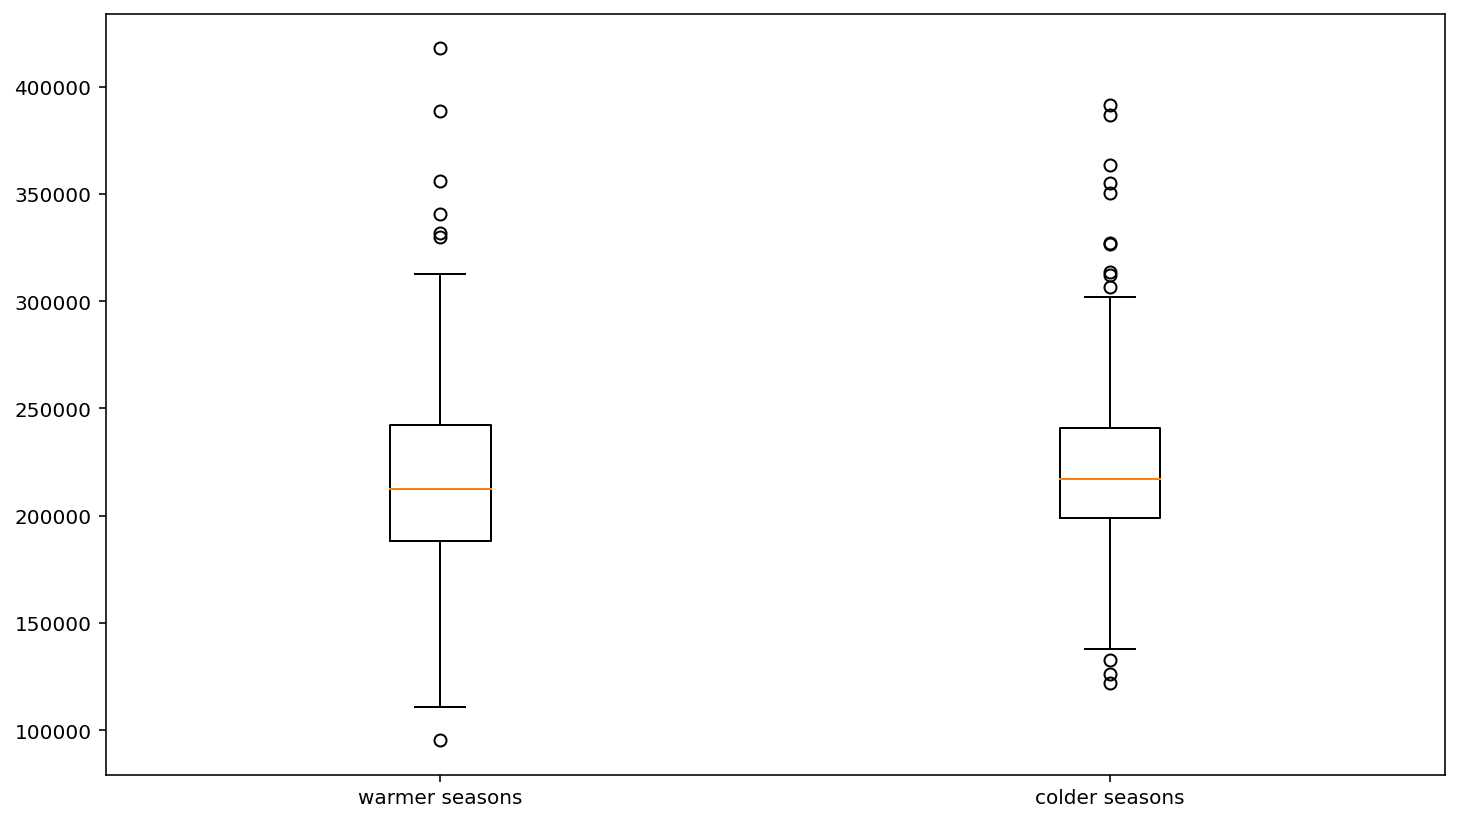

Summer
count       251.000000
mean     216838.000000
std       46242.972266
min       95466.000000
25%      188158.000000
50%      212459.000000
75%      242313.000000
max      417920.000000
Name: duration_ms, dtype: float64
Autumn
count       258.000000
mean     221782.612403
std       41852.614094
min      122066.000000
25%      199156.500000
50%      216906.500000
75%      240702.750000
max      391376.000000
Name: duration_ms, dtype: float64


popularity





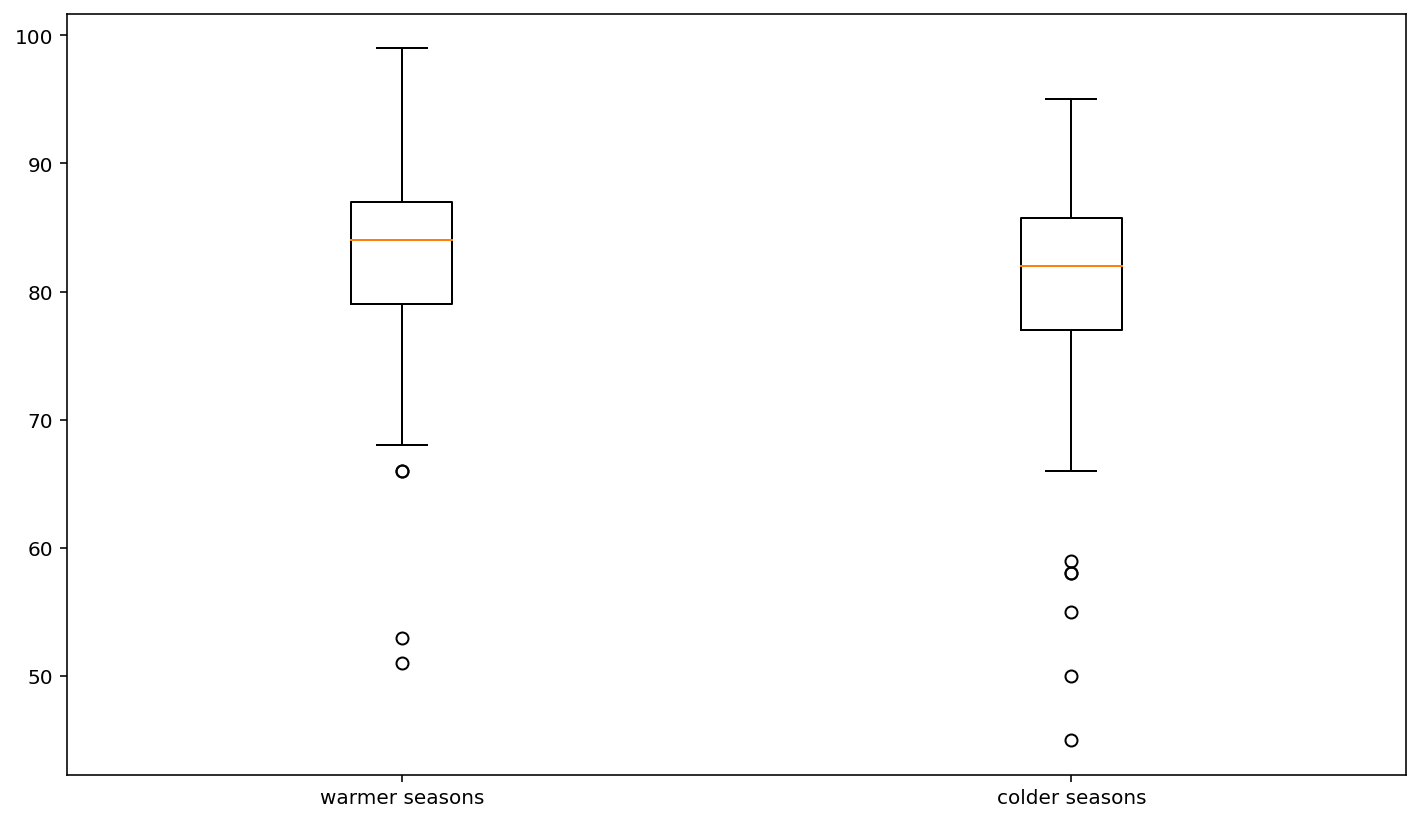

Summer
count    251.000000
mean      82.641434
std        6.302929
min       51.000000
25%       79.000000
50%       84.000000
75%       87.000000
max       99.000000
Name: popularity, dtype: float64
Autumn
count    258.000000
mean      80.945736
std        6.852317
min       45.000000
25%       77.000000
50%       82.000000
75%       85.750000
max       95.000000
Name: popularity, dtype: float64


danceability





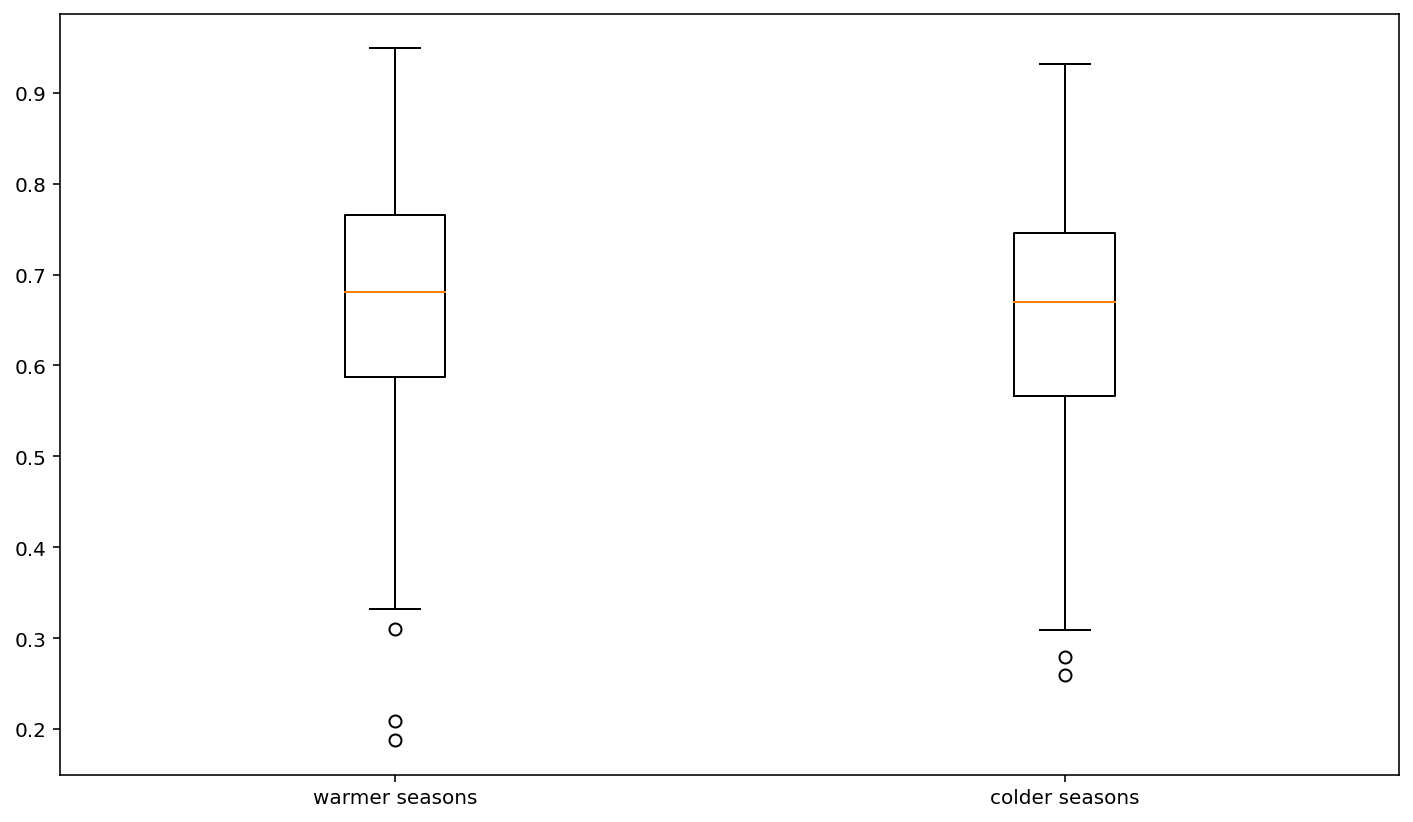

Summer
count    251.000000
mean       0.670116
std        0.139223
min        0.188000
25%        0.587000
50%        0.681000
75%        0.766000
max        0.949000
Name: danceability, dtype: float64
Autumn
count    258.000000
mean       0.650058
std        0.135082
min        0.259000
25%        0.566000
50%        0.670000
75%        0.746000
max        0.932000
Name: danceability, dtype: float64


energy





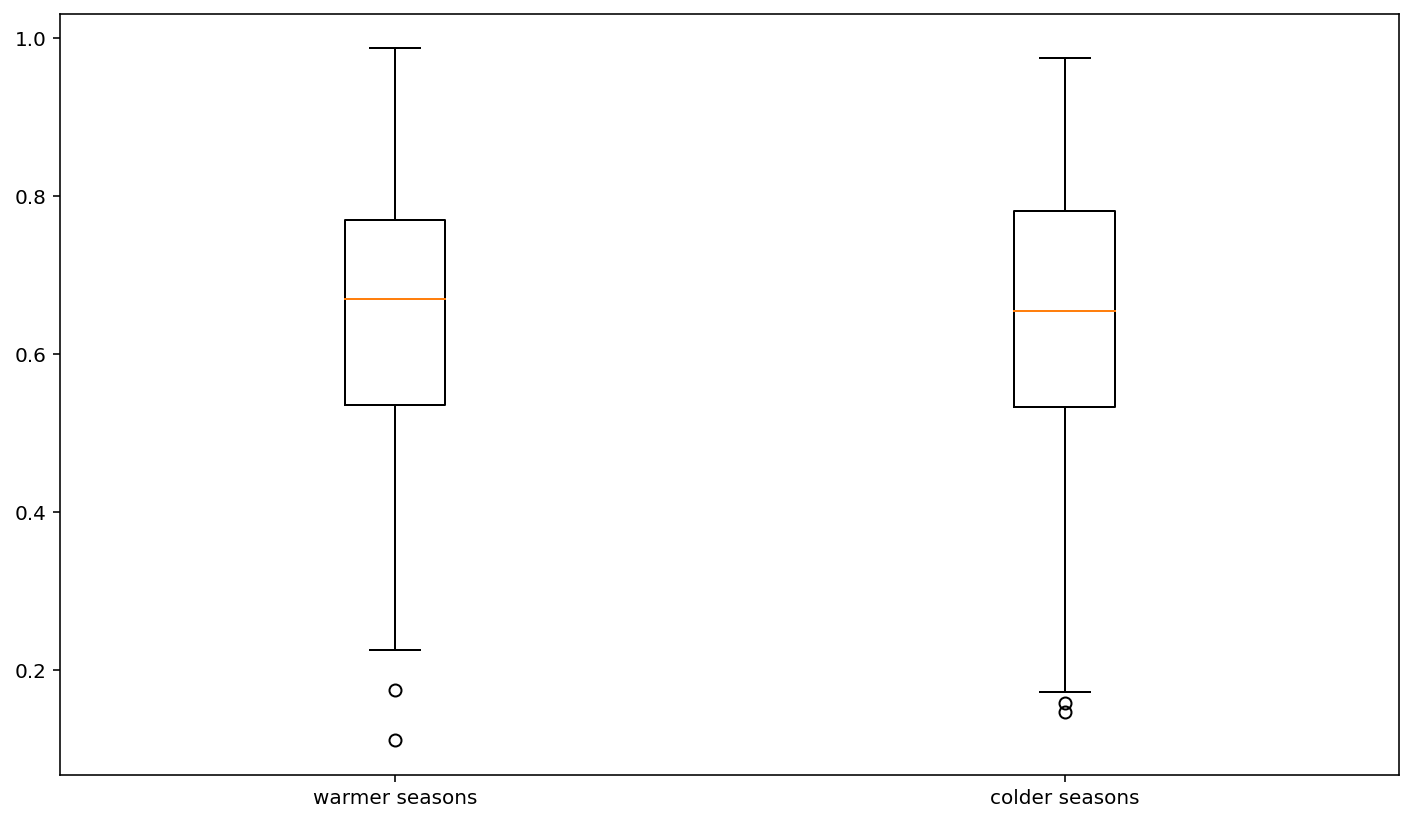

Summer
count    251.000000
mean       0.642339
std        0.170299
min        0.111000
25%        0.535000
50%        0.669000
75%        0.769000
max        0.987000
Name: energy, dtype: float64
Autumn
count    258.000000
mean       0.641589
std        0.168661
min        0.147000
25%        0.532250
50%        0.654000
75%        0.780500
max        0.974000
Name: energy, dtype: float64


key





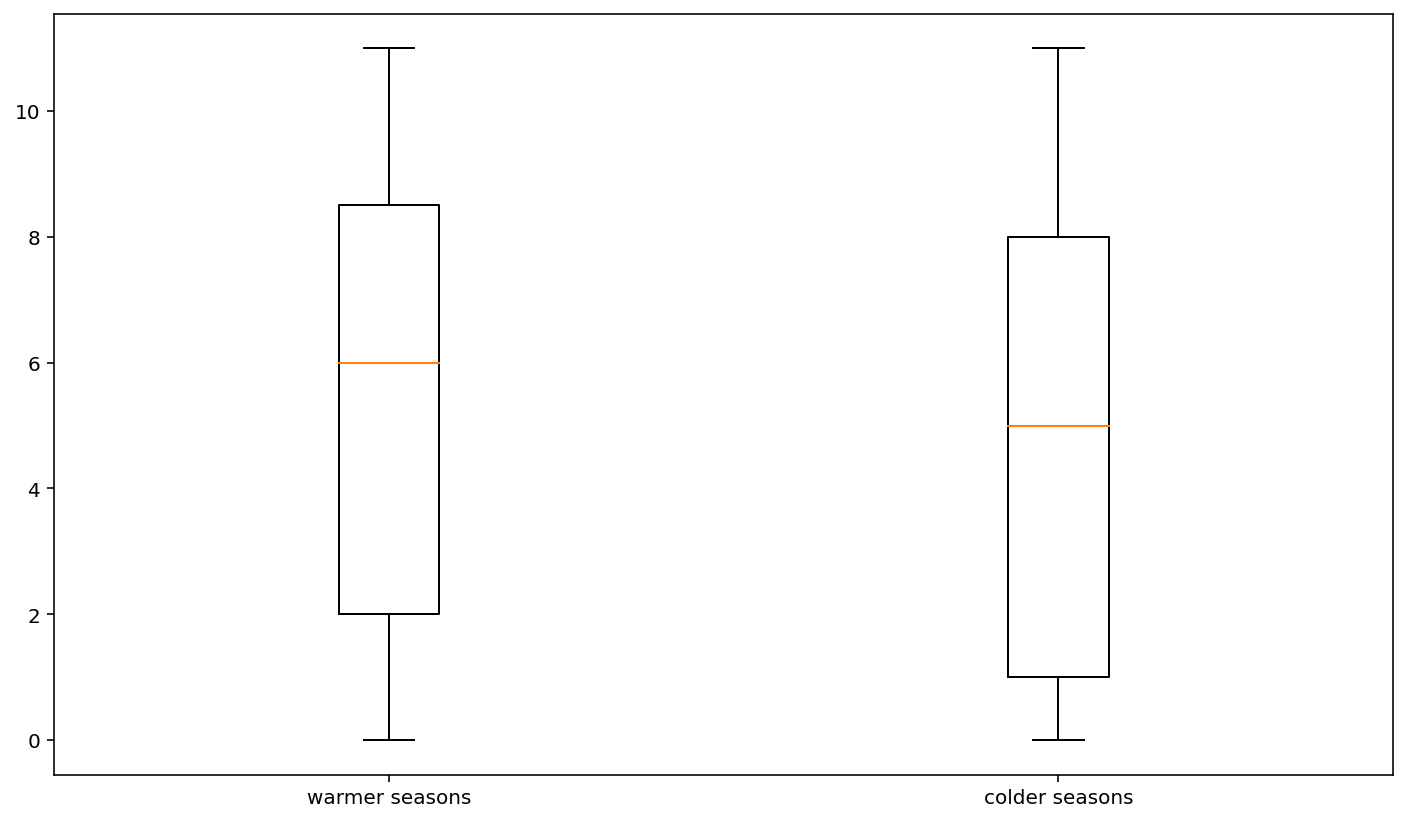

Summer
count    251.000000
mean       5.509960
std        3.566917
min        0.000000
25%        2.000000
50%        6.000000
75%        8.500000
max       11.000000
Name: key, dtype: float64
Autumn
count    258.000000
mean       5.031008
std        3.685998
min        0.000000
25%        1.000000
50%        5.000000
75%        8.000000
max       11.000000
Name: key, dtype: float64


loudness





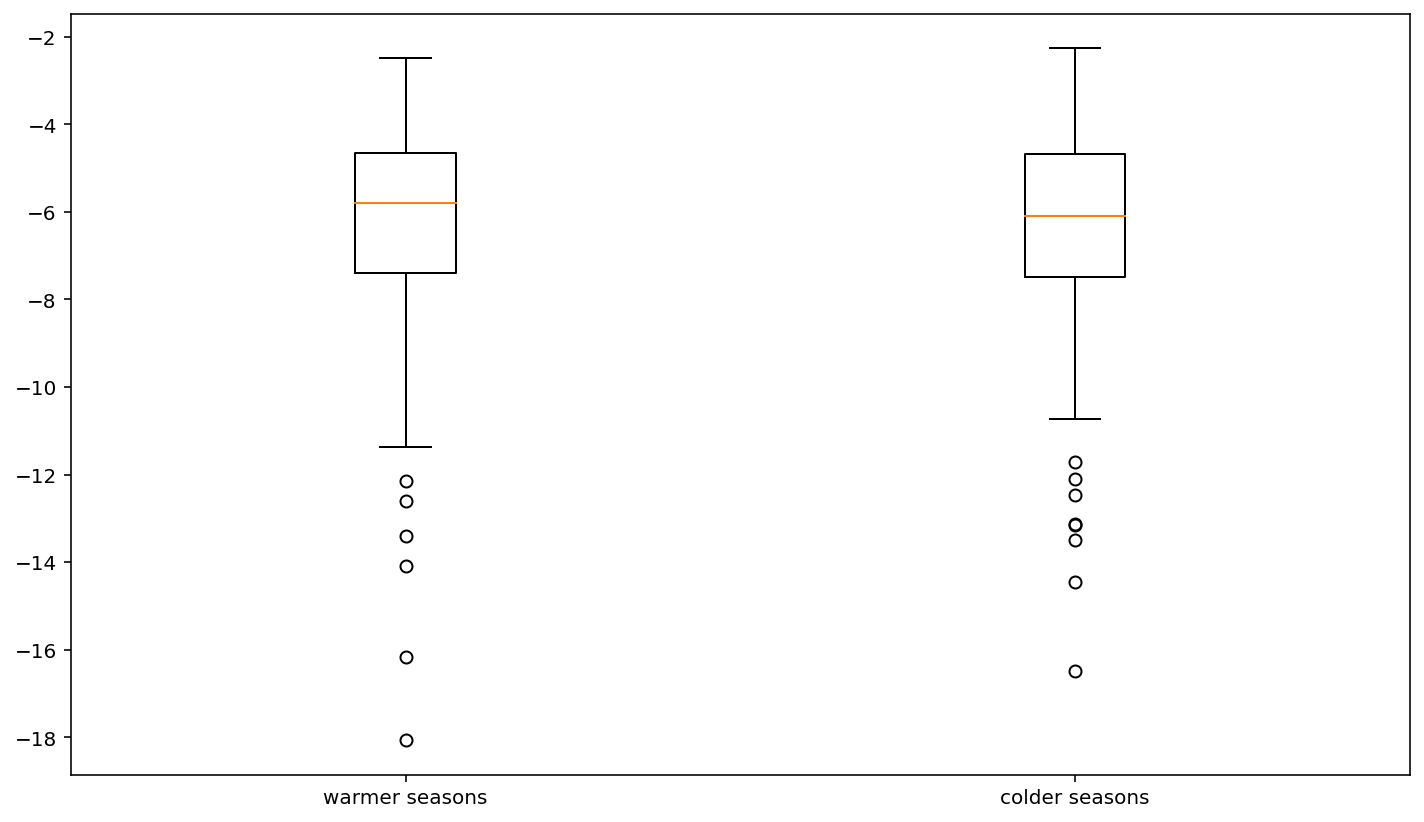

Summer
count    251.000000
mean      -6.202120
std        2.340977
min      -18.064000
25%       -7.391500
50%       -5.795000
75%       -4.653500
max       -2.494000
Name: loudness, dtype: float64
Autumn
count    258.000000
mean      -6.361500
std        2.300015
min      -16.485000
25%       -7.489250
50%       -6.089500
75%       -4.680000
max       -2.261000
Name: loudness, dtype: float64


mode





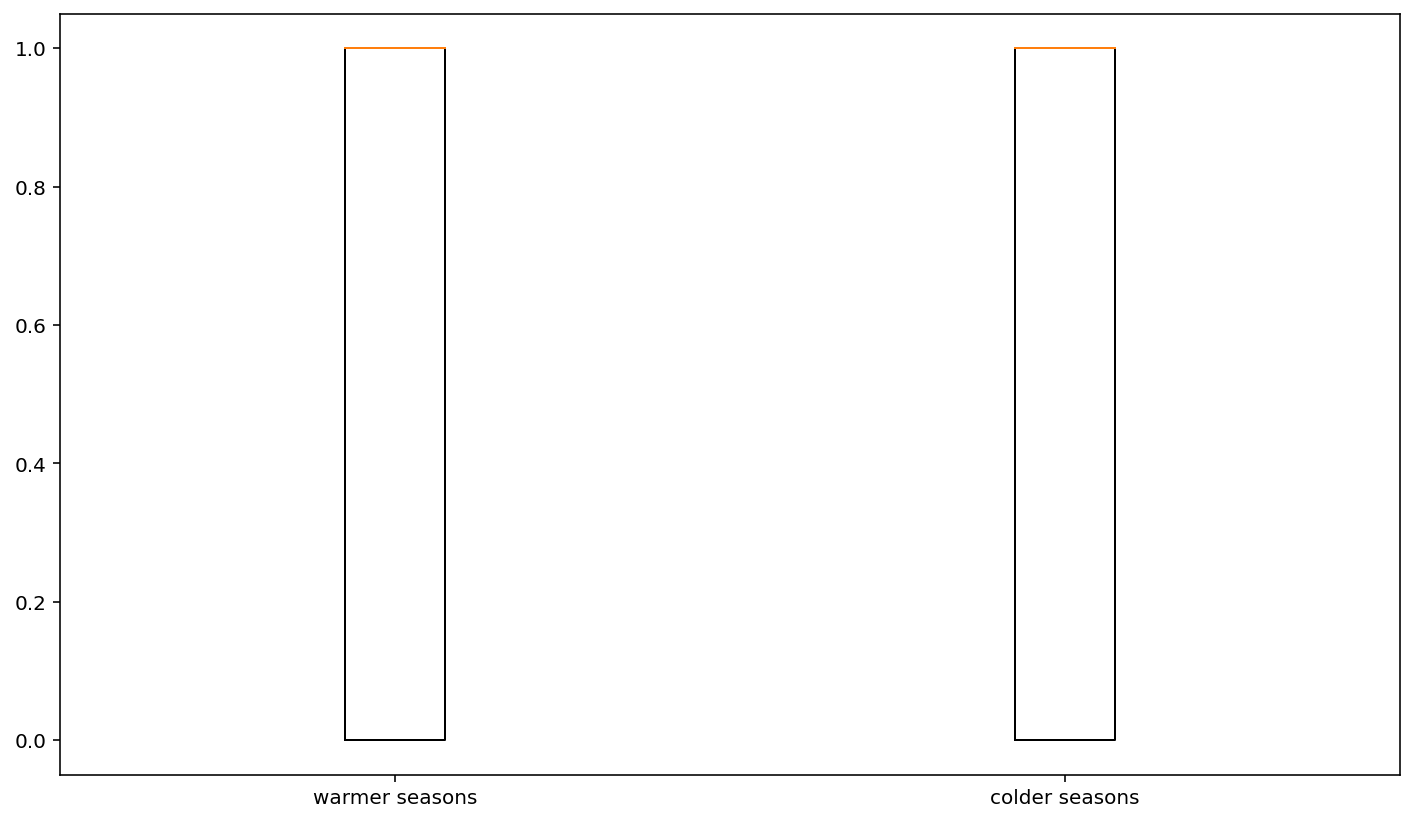

Summer
count    251.000000
mean       0.601594
std        0.490548
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: mode, dtype: float64
Autumn
count    258.000000
mean       0.585271
std        0.493633
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: mode, dtype: float64


speechiness





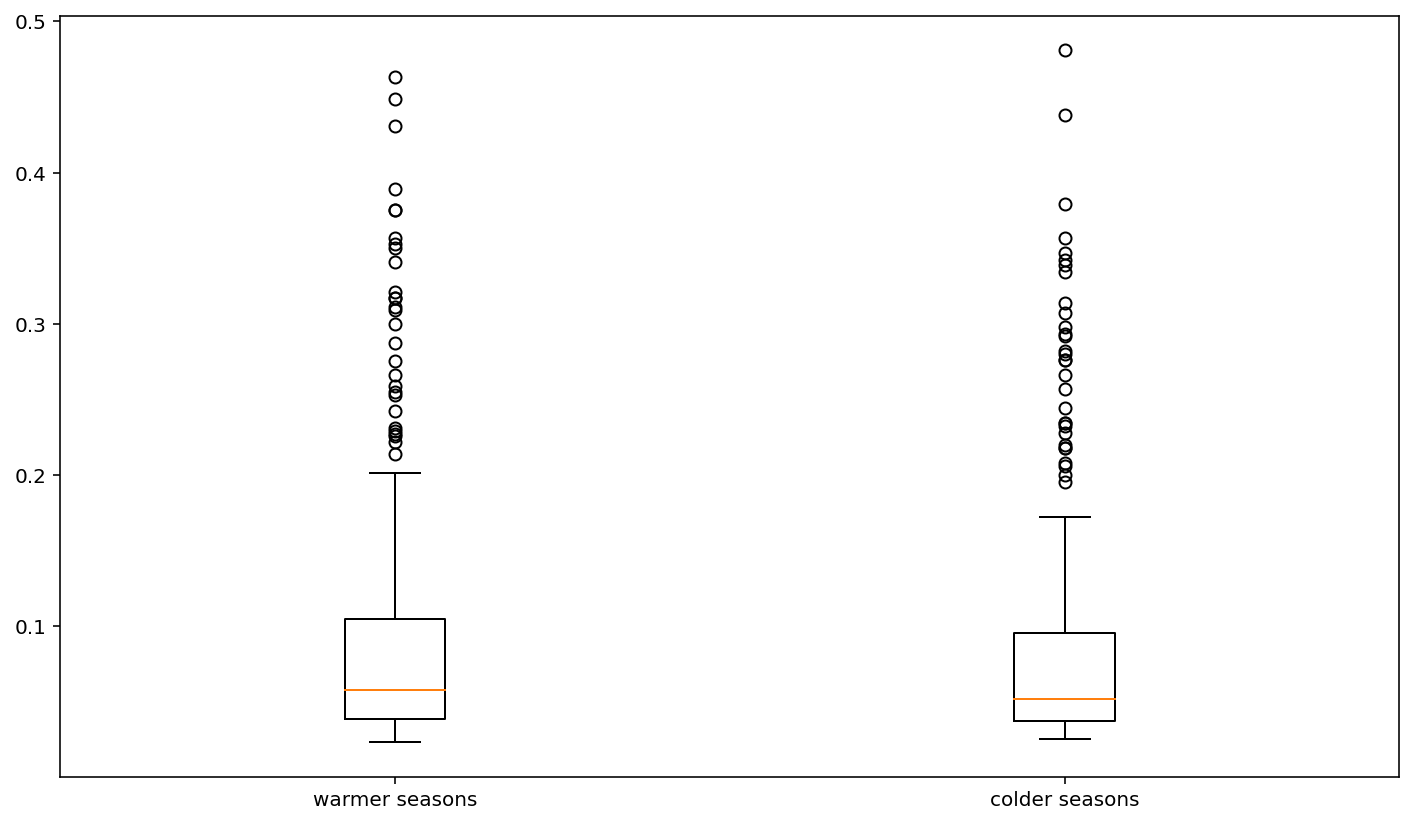

Summer
count    251.000000
mean       0.094139
std        0.089014
min        0.023200
25%        0.038200
50%        0.057800
75%        0.104500
max        0.463000
Name: speechiness, dtype: float64
Autumn
count    258.000000
mean       0.085772
std        0.082948
min        0.024900
25%        0.037050
50%        0.051500
75%        0.095350
max        0.481000
Name: speechiness, dtype: float64


acousticness





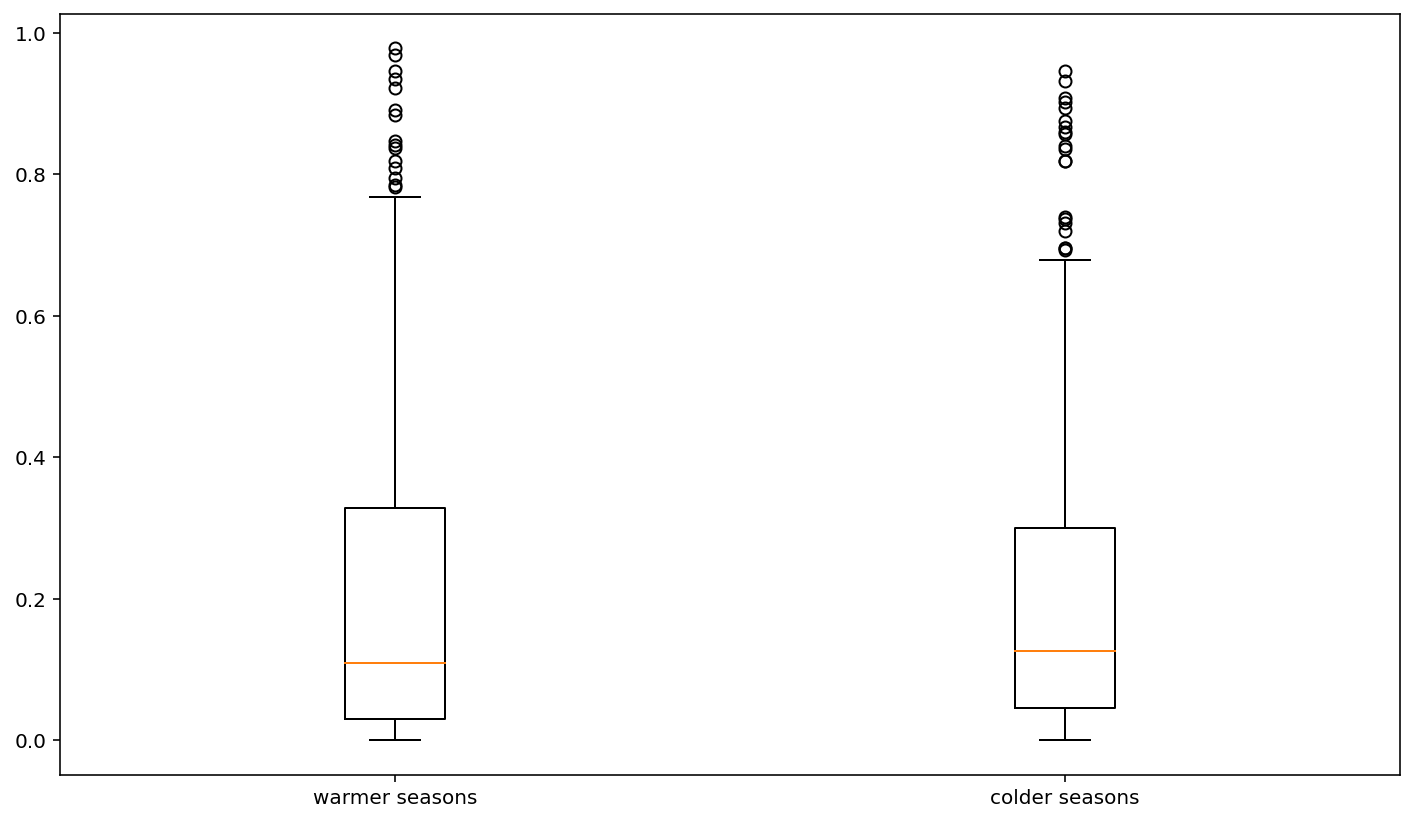

Summer
count    251.000000
mean       0.220921
std        0.254126
min        0.000176
25%        0.029750
50%        0.109000
75%        0.328000
max        0.978000
Name: acousticness, dtype: float64
Autumn
count    258.000000
mean       0.216671
std        0.238390
min        0.000025
25%        0.045625
50%        0.125500
75%        0.299750
max        0.945000
Name: acousticness, dtype: float64


instrumentalness





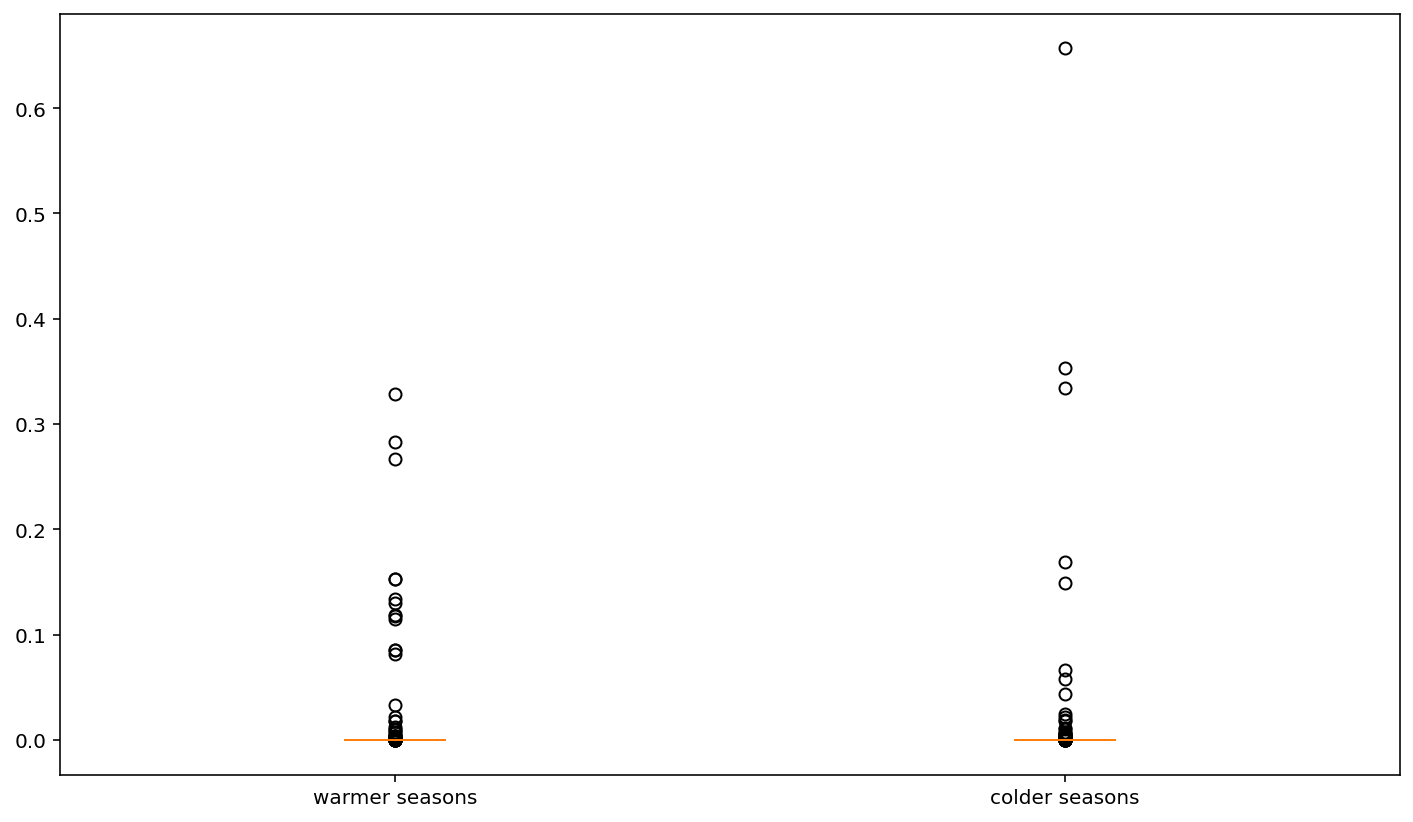

Summer
count    251.000000
mean       0.008934
std        0.039324
min        0.000000
25%        0.000000
50%        0.000002
75%        0.000075
max        0.329000
Name: instrumentalness, dtype: float64
Autumn
count    258.000000
mean       0.007805
std        0.052739
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000086
max        0.657000
Name: instrumentalness, dtype: float64


liveness





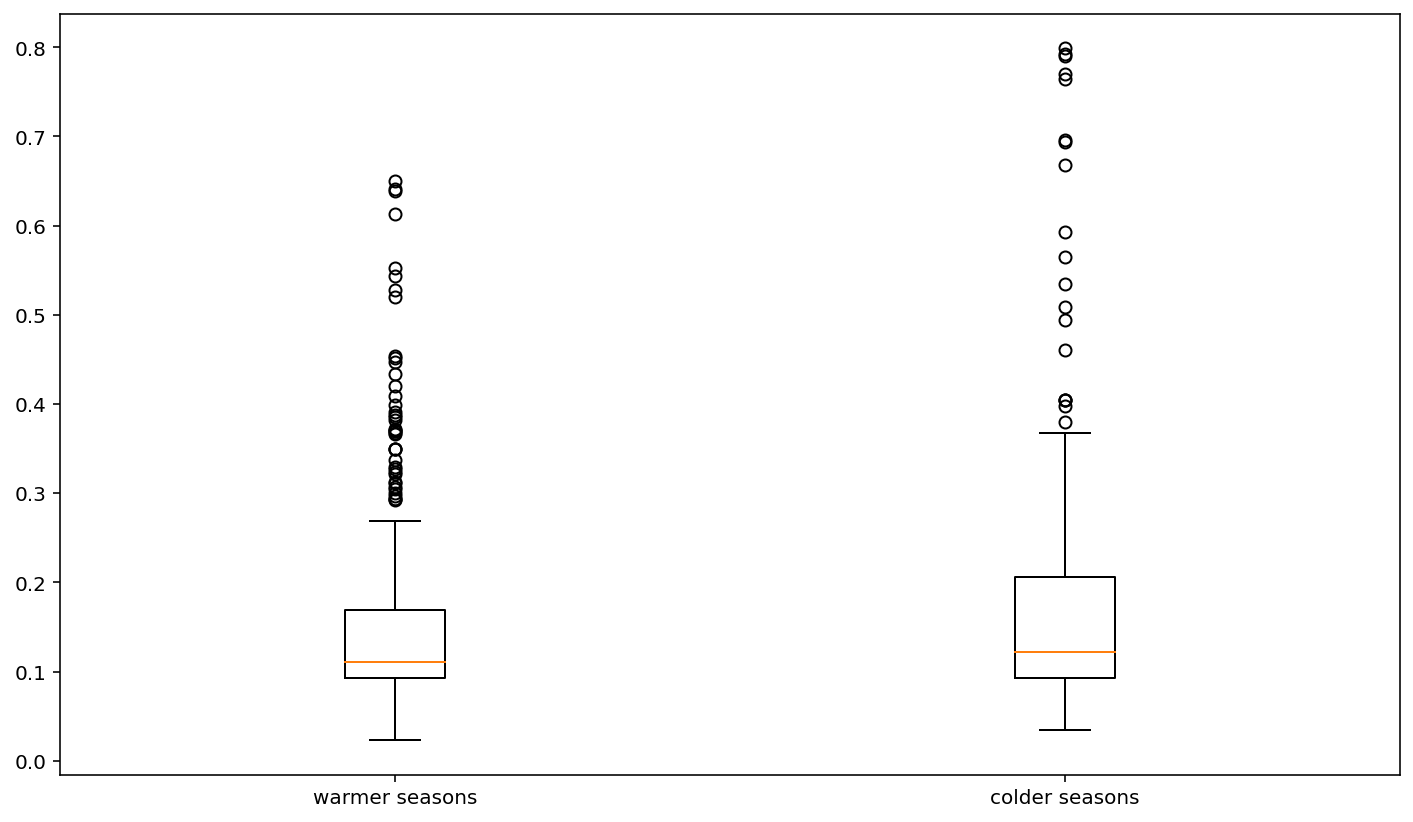

Summer
count    251.000000
mean       0.162406
std        0.121805
min        0.023200
25%        0.092750
50%        0.111000
75%        0.168500
max        0.650000
Name: liveness, dtype: float64
Autumn
count    258.000000
mean       0.175422
std        0.143364
min        0.034400
25%        0.092800
50%        0.122000
75%        0.206250
max        0.799000
Name: liveness, dtype: float64


valence





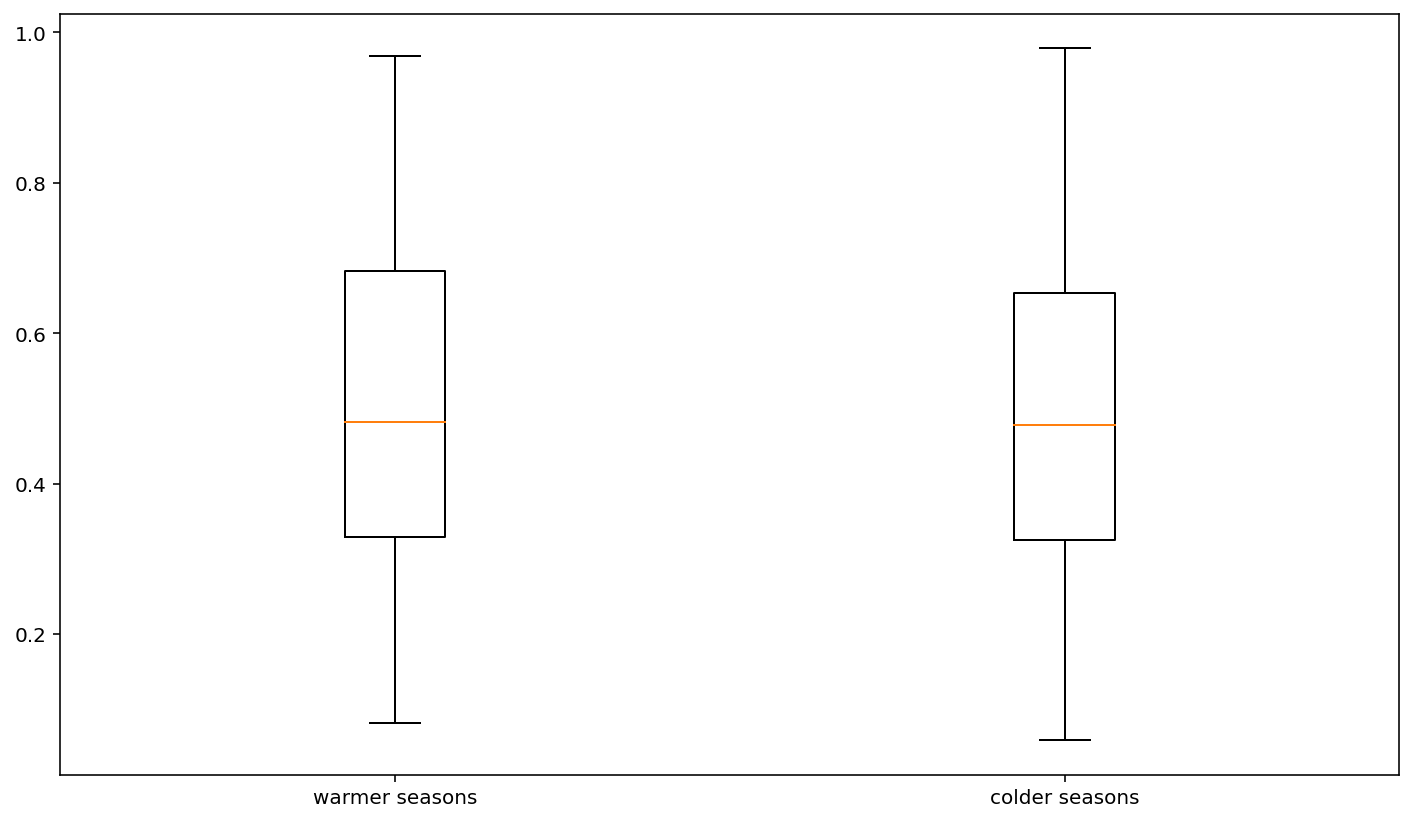

Summer
count    251.000000
mean       0.503682
std        0.226026
min        0.082300
25%        0.328500
50%        0.482000
75%        0.683000
max        0.969000
Name: valence, dtype: float64
Autumn
count    258.000000
mean       0.493679
std        0.227813
min        0.059200
25%        0.324750
50%        0.478000
75%        0.654000
max        0.979000
Name: valence, dtype: float64


tempo





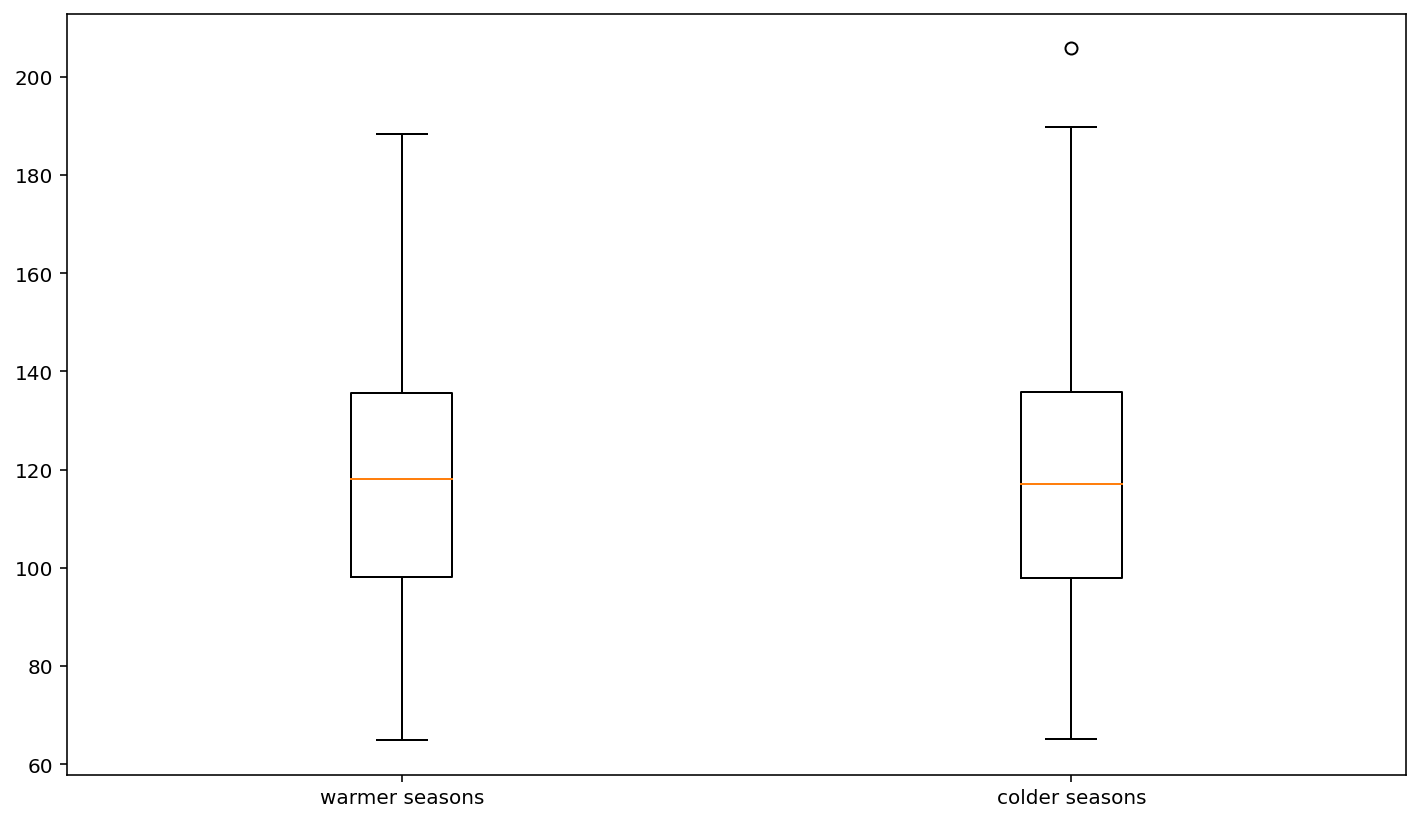

Summer
count    251.000000
mean     118.935689
std       27.217875
min       64.934000
25%       98.035000
50%      118.051000
75%      135.584500
max      188.386000
Name: tempo, dtype: float64
Autumn
count    258.000000
mean     118.984752
std       26.650902
min       65.180000
25%       97.964250
50%      116.997000
75%      135.827500
max      205.846000
Name: tempo, dtype: float64


time_signature





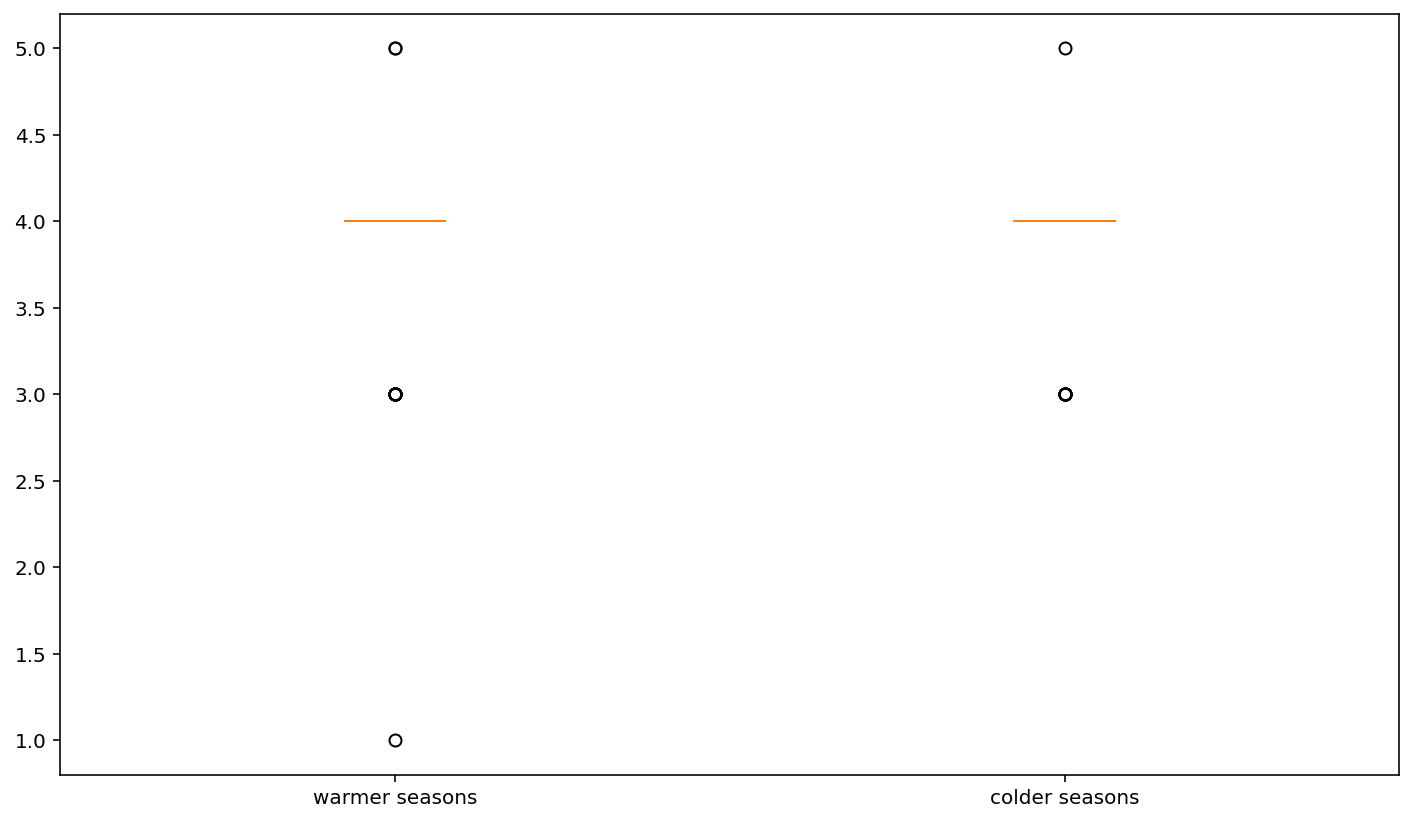

Summer
count    251.000000
mean       3.948207
std        0.298842
min        1.000000
25%        4.000000
50%        4.000000
75%        4.000000
max        5.000000
Name: time_signature, dtype: float64
Autumn
count    258.000000
mean       3.972868
std        0.185150
min        3.000000
25%        4.000000
50%        4.000000
75%        4.000000
max        5.000000
Name: time_signature, dtype: float64


In [54]:
df_warmer = df[(df['season_release'] == 'Summer') | (df['season_release'] == 'Spring')]
df_colder = df[(df['season_release'] == 'Winter') | (df['season_release'] == 'Autumn')]

for i in range(len(numery)):
    print('\n\n' + numery[i] + '\n\n\n')
    plt.boxplot([df_warmer[numery[i]], df_colder[numery[i]]], labels=['warmer seasons', 'colder seasons'])
    plt.show()

    print('Summer')
    print(df_warmer[numery[i]].describe())
    print('Autumn')
    print(df_colder[numery[i]].describe())